# SMDM project
## Statistical & Probabilistic Analysis of Store Sales, University Survey & Manufacturing data.

# Problem 1- Statistical & Probabilistic Analysis of Store Sales:

## A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data (Wholesale Customer.csv) consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel/Restaurant/Café HoReCa, Retail).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
import statsmodels.api as sm
sns.set()

In [2]:
## Data Ingestion:# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

## Data Ingestion:

In [5]:
wholesale = pd.read_csv('Wholesale Customer.csv')

In [6]:
printmd('**Information about the Dataset:**')
wholesale.info()

**Information about the Dataset:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


## Inferences:
- There are no null values and 440 rows of data with default index.
- There are 9 variables:
    - 2 are object type
    - 7 are integer type(int64)

In [252]:
wholesale.sample(5)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
18,19,Retail,Other,18601,6327,10099,2205,2767,3181
349,350,Retail,Other,5981,14641,20521,2005,12218,445
439,440,Hotel,Other,2787,1698,2510,65,477,52
289,290,Hotel,Other,42786,286,471,1388,32,22
435,436,Hotel,Other,29703,12051,16027,13135,182,2204


In [253]:
wholesale.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [254]:
wholesale.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


# Dataset understanding
- It is a dataset of a wholesale distributer's customer base of 440 large retailers and their corresponding annual spendings on  six different varities of products through a particular channel in a particular region.   
- Each row in the dataset gives information about a particular retailer via 9 different attributes:
    - Buyer/Spender : The id of the Retailer.
    - Channel : The channel through which a particular retailer makes the spend, it is either through 'Retail' or 'Hotel' channel.
    - Region: The region where the spend has been made by the retailer, it can be in either  of the three regions'Lisbon', 'Oporto' or 'Other' region.
    - The other 6  attributes give information about the amount of spendings made by the retailer in the six different product categories: 'Fresh', 'Grocery', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicatessen'.

## Describing the Object Type  Variables:

In [255]:
printmd('**Decription of the Object type Variables:**')
wholesale.describe(include = np.object).T

**Decription of the Object type Variables:**

,count,unique,top,freq
Channel,440,2,Hotel,298
Region,440,3,Other,316


In [256]:
print('The Channel categories: ',wholesale.Channel.unique())
print('The Region categories: ',wholesale.Region.unique())

The Channel categories:  ['Retail' 'Hotel']
The Region categories:  ['Other' 'Lisbon' 'Oporto']


In [257]:
printmd('**The count of retailers who do business through Hotel and Retail channels :**')
wholesale.Channel.value_counts()

**The count of retailers who do business through Hotel and Retail channels :**

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [258]:
printmd('**The count of retailers who do business in Lisbon, Oporto and Other regions :**')
wholesale.Region.value_counts()

**The count of retailers who do business in Lisbon, Oporto and Other regions :**

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [259]:
printmd('**Percentage of Retailers in each region for a particular channel :**')
wholesale.groupby(['Region','Channel']).count()['Fresh'].unstack().apply(lambda x: x*100/x.sum())

**Percentage of Retailers in each region for a particular channel :**

Channel,Hotel,Retail
Region,,
Lisbon,19.798658,12.676056
Oporto,9.395973,13.380282
Other,70.805369,73.943662


In [260]:
printmd('**Percentage of Retailers in each channel for a particular region :**')
wholesale.groupby(['Region','Channel']).count()['Fresh'].unstack().T.apply(lambda x: x*100/x.sum())

**Percentage of Retailers in each channel for a particular region :**

Region,Lisbon,Oporto,Other
Channel,,,
Hotel,76.623377,59.574468,66.772152
Retail,23.376623,40.425532,33.227848


## Inferences:
- More number of retailers do business through 'Hotel' channel than 'Retail' channel.
- The highest number of retailers do business in 'Other' region folllowed by 'Lisbon' region and  least in 'Oporto' region.
- Approximately out of the total Retailers' doing their business through 'Hotel', 19.8% are from 'Lisbon' region, 9.4% are from 'Oporto' and 70.8% are from 'Other' region. 
- Approximately out of the total Retailers' doing their business through 'Retail', 12.7% are from 'Lisbon' region, 13.4% are from 'Oporto' and 74% are from 'Other' region. 
- Approximately out of the total Retailers' from 'Lisbon' region 76.6% are doing their business through 'Hotel' and 23.4% are doing their business through 'Retail'.
- Approximately out of the total Retailers' from 'Oporto' region 59.6% are doing their business through 'Hotel' and 40.4% are doing their business through 'Retail'.
- Approximately out of the total Retailers' from 'Other' region 66.8% are doing their business through 'Hotel' and 33.2% are doing their business through 'Retail'.

## Describing the Numerical Type Variables:

In [261]:
printmd('**Description of all the Numerical Variables in the Dataset:**')
wholesale.describe().T

**Description of all the Numerical Variables in the Dataset:**

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [262]:
# Removing the 'Buyer/Spender' variable as it serves only as an ID for the Retailers.
printmd('**Description of all the product categories:**')
wholesale_description = wholesale.describe().drop('Buyer/Spender', axis=1).T.sort_values('mean', ascending =False)
wholesale_description

**Description of all the product categories:**

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


## Inferences
- All spendings of the category of products look right skewed since mean > median, thus indicating there are certain retailers whose spendings are much more than the average ones.
- The highest mean and standard deviation is observed for 'Fresh' product Category.
- The lowest mean and standard deviation is observed for 'Delicatessen' product Category.
- The maximum value is obsereved in 'Fresh' product category.
- The minimum value is observed in 'Detergents_Paper' product category.
- The highest median is observed for 'Fresh' product category.
- The lowest median is observed for 'Detergents_Paper' product category.
- The highest range is observed for 'Fresh' product category and the lowest range is observed for 'Detergents_Paper' product category.
- The highest Inter Quartile Range is observed for 'Fresh' product category and the lowest Inter Quartile Range is observed for 'Delicatessen' product category.

## Region wise and Channel Wise Analysis:

In [263]:
printmd('**Description of all the product categories Region wise:**')
wholesale.drop('Buyer/Spender', axis = 1).groupby('Region').describe().T

**Description of all the product categories Region wise:**

Region                        Lisbon        Oporto          Other
Fresh            count     77.000000     47.000000     316.000000
                 mean   11101.727273   9887.680851   12533.471519
                 std    11557.438575   8387.899211   13389.213115
                 min       18.000000      3.000000       3.000000
                 25%     2806.000000   2751.500000    3350.750000
                 50%     7363.000000   8090.000000    8752.500000
                 75%    15218.000000  14925.500000   17406.500000
                 max    56083.000000  32717.000000  112151.000000
Milk             count     77.000000     47.000000     316.000000
                 mean    5486.415584   5088.170213    5977.085443
                 std     5704.856079   5826.343145    7935.463443
                 min      258.000000    333.000000      55.000000
                 25%     1372.000000   1430.500000    1634.000000
                 50%     3748.000000   2374.000000    3684.500000
                 75%     7503.000000   5772.500000    7198.750000
                 max    28326.000000  25071.000000   73498.000000
Grocery          count     77.000000     47.000000     316.000000
                 mean    7403.077922   9218.595745    7896.363924
                 std     8496.287728  10842.745314    9537.287778
                 min      489.000000   1330.000000       3.000000
                 25%     2046.000000   2792.500000    2141.500000
                 50%     3838.000000   6114.000000    4732.000000
                 75%     9490.000000  11758.500000   10559.750000
                 max    39694.000000  67298.000000   92780.000000
Frozen           count     77.000000     47.000000     316.000000
                 mean    3000.337662   4045.361702    2944.594937
                 std     3092.143894   9151.784954    4260.126243
                 min       61.000000    131.000000      25.000000
                 25%      950.000000    811.500000     664.750000
                 50%     1801.000000   1455.000000    1498.000000
                 75%     4324.000000   3272.000000    3354.750000
                 max    18711.000000  60869.000000   36534.000000
Detergents_Paper count     77.000000     47.000000     316.000000
                 mean    2651.116883   3687.468085    2817.753165
                 std     4208.462708   6514.717668    4593.051613
                 min        5.000000     15.000000       3.000000
                 25%      284.000000    282.500000     251.250000
                 50%      737.000000    811.000000     856.000000
                 75%     3593.000000   4324.500000    3875.750000
                 max    19410.000000  38102.000000   40827.000000
Delicatessen     count     77.000000     47.000000     316.000000
                 mean    1354.896104   1159.702128    1620.601266
                 std     1345.423340   1050.739841    3232.581660
                 min        7.000000     51.000000       3.000000
                 25%      548.000000    540.500000     402.000000
                 50%      806.000000    898.000000     994.000000
                 75%     1775.000000   1538.500000    1832.750000
                 max     6854.000000   5609.000000   47943.000000

In [264]:
printmd('**Description of all the product categories Channel wise:**')
wholesale.drop('Buyer/Spender', axis = 1).groupby('Channel').describe().T

**Description of all the product categories Channel wise:**

Channel                         Hotel        Retail
Fresh            count     298.000000    142.000000
                 mean    13475.560403   8904.323944
                 std     13831.687502   8987.714750
                 min         3.000000     18.000000
                 25%      4070.250000   2347.750000
                 50%      9581.500000   5993.500000
                 75%     18274.750000  12229.750000
                 max    112151.000000  44466.000000
Milk             count     298.000000    142.000000
                 mean     3451.724832  10716.500000
                 std      4352.165571   9679.631351
                 min        55.000000    928.000000
                 25%      1164.500000   5938.000000
                 50%      2157.000000   7812.000000
                 75%      4029.500000  12162.750000
                 max     43950.000000  73498.000000
Grocery          count     298.000000    142.000000
                 mean     3962.137584  16322.852113
                 std      3545.513391  12267.318094
                 min         3.000000   2743.000000
                 25%      1703.750000   9245.250000
                 50%      2684.000000  12390.000000
                 75%      5076.750000  20183.500000
                 max     21042.000000  92780.000000
Frozen           count     298.000000    142.000000
                 mean     3748.251678   1652.612676
                 std      5643.912500   1812.803662
                 min        25.000000     33.000000
                 25%       830.000000    534.250000
                 50%      2057.500000   1081.000000
                 75%      4558.750000   2146.750000
                 max     60869.000000  11559.000000
Detergents_Paper count     298.000000    142.000000
                 mean      790.560403   7269.507042
                 std      1104.093673   6291.089697
                 min         3.000000    332.000000
                 25%       183.250000   3683.500000
                 50%       385.500000   5614.500000
                 75%       899.500000   8662.500000
                 max      6907.000000  40827.000000
Delicatessen     count     298.000000    142.000000
                 mean     1415.956376   1753.436620
                 std      3147.426922   1953.797047
                 min         3.000000      3.000000
                 25%       379.000000    566.750000
                 50%       821.000000   1350.000000
                 75%      1548.000000   2156.000000
                 max     47943.000000  16523.000000

## Total spendings Region wise

In [265]:
printmd('**Total Spendings of all product categories combined in each Region :**')
wholesale.drop('Buyer/Spender', axis = 1).groupby('Region').sum().T.sum().sort_values(ascending = False)

**Total Spendings of all product categories combined in each Region :**

Region
Other     10677599
Lisbon     2386813
Oporto     1555088
dtype: int64

**Total Spendings of all product categories combined in each Region :**

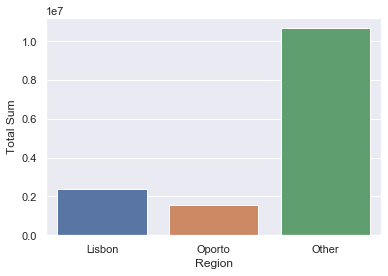

In [266]:
temp = wholesale.drop('Buyer/Spender', axis = 1).groupby('Region').sum().T.sum().reset_index().rename(columns={0: "Total Sum"})
sns.barplot(x = temp['Region'], y = temp['Total Sum'] )
printmd('**Total Spendings of all product categories combined in each Region :**')

## Mean Spendings Region wise

In [267]:
printmd('**Mean spendings per product category in each region :**')
wholesale.drop('Buyer/Spender', axis = 1).groupby('Region').mean().T.mean().sort_values(ascending = False)

**Mean spendings per product category in each region :**

Region
Other     5631.645042
Oporto    5514.496454
Lisbon    5166.261905
dtype: float64

**Mean spendings per product category in each region :**

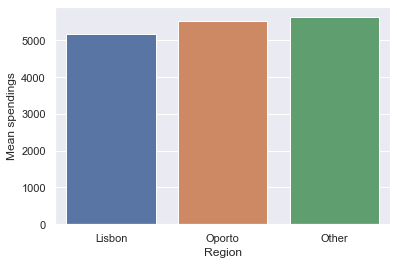

In [268]:
temp = wholesale.drop('Buyer/Spender', axis = 1).groupby('Region').mean().T.mean().reset_index().rename(columns={0: "Mean spendings"})
sns.barplot(x = temp['Region'], y = temp['Mean spendings'] )
printmd('**Mean spendings per product category in each region :**')

## Total spendings Channel wise

In [269]:
printmd('**Total Spendings of all product categories combined through each Channel :**')
wholesale.drop('Buyer/Spender', axis = 1).groupby('Channel').sum().T.sum().sort_values(ascending = False)

**Total Spendings of all product categories combined through each Channel :**

Channel
Hotel     7999569
Retail    6619931
dtype: int64

**Total Spendings of all product categories combined through each Channel :**

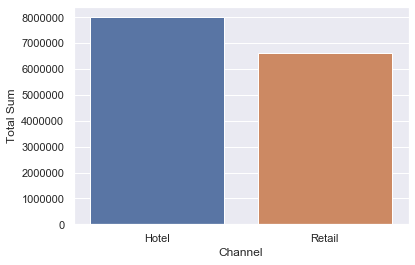

In [270]:
temp = wholesale.drop('Buyer/Spender', axis = 1).groupby('Channel').sum().T.sum().sort_values(ascending = False).reset_index().rename(columns={0: "Total Sum"})
sns.barplot(x = temp['Channel'], y = temp['Total Sum'] )
printmd('**Total Spendings of all product categories combined through each Channel :**')

## Mean spendings Channel wise

In [271]:
printmd('**Mean spendings per product category through each channel :**')
wholesale.drop('Buyer/Spender', axis = 1).groupby('Channel').mean().T.mean().sort_values(ascending = False)

**Mean spendings per product category through each channel :**

Channel
Retail    7769.872066
Hotel     4474.031879
dtype: float64

**Mean spendings per product category through each channel :**

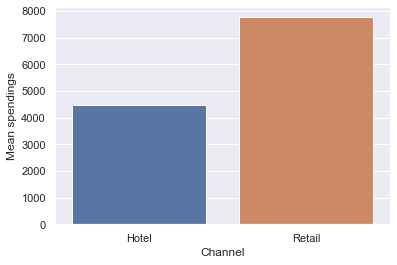

In [272]:
temp = wholesale.drop('Buyer/Spender', axis = 1).groupby('Channel').mean().T.mean().reset_index().rename(columns={0: "Mean spendings"})
sns.barplot(x = temp['Channel'], y = temp['Mean spendings'] )
printmd('**Mean spendings per product category through each channel :**')

## Mean and Total Spendings Region and Column wise:

In [273]:
printmd('**Total Spendings of all product categories for a particular Region and Channel :**')
wholesale.drop('Buyer/Spender', axis = 1).groupby(['Channel','Region']).sum().T.sum().sort_values(ascending = False).reset_index().rename(columns={0: "Total Sum"})

**Total Spendings of all product categories for a particular Region and Channel :**

,Channel,Region,Total Sum
0,Hotel,Other,5742077
1,Retail,Other,4935522
2,Hotel,Lisbon,1538342
3,Retail,Lisbon,848471
4,Retail,Oporto,835938
5,Hotel,Oporto,719150


**Total Spendings of all product categories for a particular Region and Channel :**

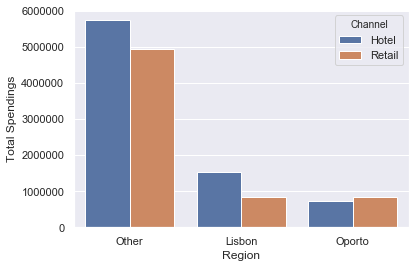

In [274]:
temp = wholesale.drop('Buyer/Spender', axis = 1).groupby(['Channel','Region']).sum().T.sum().sort_values(ascending = False).reset_index().rename(columns={0: "Total Spendings"})
sns.barplot(x = temp['Region'], y = temp['Total Spendings'], hue = temp['Channel']  )
printmd('**Total Spendings of all product categories for a particular Region and Channel :**')

In [275]:
printmd('**Mean Spendings of all product categories for a particular Region and Channel :**')
wholesale.drop('Buyer/Spender', axis = 1).groupby(['Channel','Region']).mean().T.mean().sort_values(ascending = False).reset_index().rename(columns={0: "Mean Spendings"})

**Mean Spendings of all product categories for a particular Region and Channel :**

,Channel,Region,Mean Spendings
0,Retail,Lisbon,7856.212963
1,Retail,Other,7834.161905
2,Retail,Oporto,7332.789474
3,Hotel,Other,4535.605845
4,Hotel,Lisbon,4345.598870
5,Hotel,Oporto,4280.654762


**Mean Spendings of all product categories for a particular Region and Channel :**

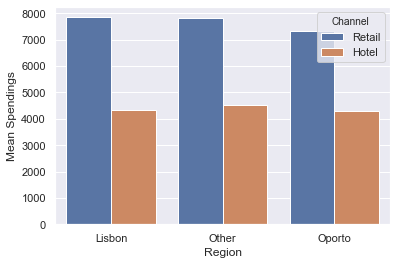

In [276]:
temp_mean = wholesale.drop('Buyer/Spender', axis = 1).groupby(['Channel','Region']).mean().T.mean().sort_values(ascending = False).reset_index().rename(columns={0: "Mean Spendings"})
sns.barplot(x = temp_mean['Region'], y = temp_mean['Mean Spendings'], hue = temp_mean['Channel']  )
printmd('**Mean Spendings of all product categories for a particular Region and Channel :**')

## Inferences:
- The Total spendings is maximum in 'Other' region as well as the mean spendings is maximum in 'Other' region.
- The Total spendings is maximum through 'Hotel' channel but the mean spendings is maximum through 'Retail' channel.
- Total Spendings is maximum for 'Hotel' channel in 'Other' Region. Mean Spendings is maximum for 'Retail' channel in 'Lisbon' Region.
- The Total spendings is minimum in 'Oporto' region but the mean spendings is minimum in 'Lisbon' Region.
- The Total spendings is minimum through  'Retail' channel but the mean spendings is minimum through 'Hotel' channel.
- Total Spendings is minimum for 'Hotel' channel in 'Oporto' Region. Mean Spendings is minimum for 'Hotel' channel in 'Oporto' Region.
- Although there are higher number of Retailers doing business through 'Hotel' channel nearly 67.8% of the total retailers, but the mean spendings in 'Retail' business is 173.67% higher than that of mean spendings in 'Hotel' business.
- The trend of spendings is not the same for total and mean spendings region wise as well as channel wise.

# Statistical Analysis Region and Channel wise:

## Analysing the Spendings by Region for all varities of products

### Total Spendings Region Wise:

In [277]:
printmd('**Observing the  Total Spendings across the product varities in different Regions :**')
wholesale.drop('Buyer/Spender', axis = 1).groupby('Region').sum().T

**Observing the  Total Spendings across the product varities in different Regions :**

Region,Lisbon,Oporto,Other
Fresh,854833,464721,3960577
Milk,422454,239144,1888759
Grocery,570037,433274,2495251
Frozen,231026,190132,930492
Detergents_Paper,204136,173311,890410
Delicatessen,104327,54506,512110


### Mean Spendings Region Wise:

In [278]:
printmd('**Observing the mean Spendings across the product varities in different Regions:**')
round(wholesale.drop('Buyer/Spender', axis = 1).groupby('Region').mean(),2).T

**Observing the mean Spendings across the product varities in different Regions:**

Region,Lisbon,Oporto,Other
Fresh,11101.73,9887.68,12533.47
Milk,5486.42,5088.17,5977.09
Grocery,7403.08,9218.60,7896.36
Frozen,3000.34,4045.36,2944.59
Detergents_Paper,2651.12,3687.47,2817.75
Delicatessen,1354.90,1159.70,1620.60


### Standard Deviation of spendings Region Wise:

In [279]:
printmd('**Observing the Standard Deviation of Spendings across the product varities in different Regions:**')
round(wholesale.drop('Buyer/Spender', axis = 1).groupby('Region').std(),2).T

**Observing the Standard Deviation of Spendings across the product varities in different Regions:**

Region,Lisbon,Oporto,Other
Fresh,11557.44,8387.90,13389.21
Milk,5704.86,5826.34,7935.46
Grocery,8496.29,10842.75,9537.29
Frozen,3092.14,9151.78,4260.13
Detergents_Paper,4208.46,6514.72,4593.05
Delicatessen,1345.42,1050.74,3232.58


### Coefficient Variation of spendings Region Wise:

In [280]:
printmd('**Observing the Coefficient of Variation of Spendings across the product varities in different Regions:**')
temp1 = wholesale.drop('Buyer/Spender', axis = 1).groupby('Region').mean()
temp2 = wholesale.drop('Buyer/Spender', axis = 1).groupby('Region').std()
temp3 = temp2/temp1
temp3.T

**Observing the Coefficient of Variation of Spendings across the product varities in different Regions:**

Region,Lisbon,Oporto,Other
Fresh,1.041049,0.848318,1.068277
Milk,1.039815,1.145076,1.327648
Grocery,1.147670,1.176182,1.207808
Frozen,1.030599,2.262291,1.446761
Detergents_Paper,1.587430,1.766718,1.630040
Delicatessen,0.993008,0.906043,1.994680


## Inferences:
- For all the three regions it is observed that the **total and mean spendings** is maximum for 'Fresh' product category and minimum for 'Delicatessen' product category.
- The **standard deviation** on spendings for different regions are:
    1. 'Lisbon' : It is observed that the standard deviation on spendings is maximum for 'Fresh' product category and minimum for 'Delicatessen' product category.
    2. 'Oporto': It is observed that the standard deviation on spendings is maximum for 'Grocery' product category and minimum for 'Delicatessen' product category.
    3. 'Other': It is observed that the standard deviation on spendings is maximum for 'Fresh' product category and minimum for 'Delicatessen' product category.
- **The Coefficient of Variation is calculated for each product category for all the regions and it is observed:**
    1. For 'Lisbon' Region the maximum variation is observed for the 'Detergents_Paper' product type and minimum variation is observed for the product type 'Delicatessen'. 
    2. For 'Oporto' Region the maximum variation is observed for the 'Frozen' product type and minimum variation is observed for the product type 'Fresh'.
    3. For 'Other' Regions category the maximum variation is observed for the 'Delicatessen' product type and minimum variation is observed for the product type 'Fresh'.
- **Thus we can conclude from the above numerical analysis that region wise the trend of total and mean spendings for different product categories is same. Although the trend of variability of spendings of each product category measured region wise using the metrics Standard Deviation and Coefficient of Variation is not the same.**

## Analysing the Spendings by Channel for all varities of products:

### Total Spendings Channel Wise:

In [281]:
printmd('**Observing the Total Spendings across the product varities through different Channels:**')
wholesale.drop('Buyer/Spender', axis = 1).groupby('Channel').sum().T

**Observing the Total Spendings across the product varities through different Channels:**

Channel,Hotel,Retail
Fresh,4015717,1264414
Milk,1028614,1521743
Grocery,1180717,2317845
Frozen,1116979,234671
Detergents_Paper,235587,1032270
Delicatessen,421955,248988


### Mean Spendings Channel Wise:

In [282]:
printmd('**Observing the mean Spendings across the product varities through different Channels:**')
wholesale.drop('Buyer/Spender', axis = 1).groupby('Channel').mean().T

**Observing the mean Spendings across the product varities through different Channels:**

Channel,Hotel,Retail
Fresh,13475.560403,8904.323944
Milk,3451.724832,10716.500000
Grocery,3962.137584,16322.852113
Frozen,3748.251678,1652.612676
Detergents_Paper,790.560403,7269.507042
Delicatessen,1415.956376,1753.436620


### Standard Deviation of Spendings Channel Wise:

In [283]:
printmd('**Observing the Standard Deviation of Spendings across the product varities through different Channels:**')
wholesale.drop('Buyer/Spender', axis = 1).groupby('Channel').std().T

**Observing the Standard Deviation of Spendings across the product varities through different Channels:**

Channel,Hotel,Retail
Fresh,13831.687502,8987.714750
Milk,4352.165571,9679.631351
Grocery,3545.513391,12267.318094
Frozen,5643.912500,1812.803662
Detergents_Paper,1104.093673,6291.089697
Delicatessen,3147.426922,1953.797047


### Coefficient of Variation of  Spendings Channel Wise:

In [284]:
printmd('**Observing the Coefficient of Variation of Spendings across the product varities through different Channels:**')
temp1 = wholesale.drop('Buyer/Spender', axis = 1).groupby('Channel').mean()
temp2 = wholesale.drop('Buyer/Spender', axis = 1).groupby('Channel').std()
temp3 = temp2/temp1
temp3.T

**Observing the Coefficient of Variation of Spendings across the product varities through different Channels:**

Channel,Hotel,Retail
Fresh,1.026428,1.009365
Milk,1.260867,0.903246
Grocery,0.894849,0.751543
Frozen,1.505745,1.096932
Detergents_Paper,1.396596,0.865408
Delicatessen,2.222828,1.114267


## Inferences:
- The **Total spendings** and **mean spendings** for different channels are:
    1. 'Hotel':  It is observed that the total spendings is maximum for 'Fresh' product category and minimum for 'Detergents_Paper' product category.
    2. 'Retail': It is observed that the total spendings is maximum for 'Grocery' product category and minimum for 'Frozen' product category.
- The **standard deviation** on spendings for different channels are:
    - 1. 'Hotel':  It is observed that the standard deviation on spendings is maximum for 'Fresh' product category and minimum for 'Detergents_Paper' product category.
    - 2. 'Retail': It is observed that the standard deviation on spendings is maximum for 'Grocery' product category and minimum for 'Frozen' product category.
- **The Coefficient of Variation is calculated for each product type for all the channels and it is observed:**
    - 1. For 'Hotel' Channel the maximum variation is observed for the 'Delicatessen' product type and minimum variation is observed for the product type 'Grocery'.
    - 2. For 'Retail' Channel the maximum variation is observed for the 'Delicatessen' product type and minimum variation is observed for the product type 'Grocery'.
- **We can conclude from the above numerical analysis that channel wise the trend of total and mean spendings for different product categories is not the same. The trend of variability of spendings of each product category measured channel wise using the metrics Standard Deviation and Coefficient of Variation is also not same.**


## Coefficient of Variation in product categories in each region through different channels:

In [285]:
printmd('**Observing the Coefficient of Variation of Spendings for different product categories in each region through a particular channel :**')
temp1 = wholesale.drop('Buyer/Spender', axis = 1).groupby(['Region', 'Channel']).mean()
temp2 = wholesale.drop('Buyer/Spender', axis = 1).groupby(['Region', 'Channel']).std()
temp3 = temp2/temp1
temp3

**Observing the Coefficient of Variation of Spendings for different product categories in each region through a particular channel :**

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Region Channel                                                             
Lisbon Hotel    0.956578  1.110619  0.901521  1.047689          1.373880   
       Retail   1.041446  0.612873  0.563811  0.938340          0.670601   
Oporto Hotel    0.769867  1.288328  0.693504  1.993805          0.881081   
       Retail   0.942131  0.719346  0.859683  1.605414          0.985314   
Other  Hotel    1.062582  1.292954  0.924557  1.355408          1.398240   
       Retail   0.980053  0.963010  0.770909  0.994250          0.872863   

                Delicatessen  
Region Channel                
Lisbon Hotel        1.019039  
       Retail       0.868876  
Oporto Hotel        0.955589  
       Retail       0.859918  
Other  Hotel        2.412712  
       Retail       1.160355

## Inferences:
1. For 'Fresh' product category the maximum inconsistency is observed in 'Other' region through 'Hotel' channel and the minimum inconsistency is observed in 'Oporto' region  through 'Hotel' channel.

2. For 'Milk' product category the maximum inconsistency is observed in 'Other' region through 'Hotel' channel and the minimum inconsistency is observed in 'Lisbon' region  through 'Retail' channel.

3. For 'Grocery' product category the maximum inconsistency is observed in 'Other' region through 'Hotel' channel and the minimum inconsistency is observed in 'Lisbon' region  through 'Retail' channel.

4. For 'Frozen' product category the maximum inconsistency is observed in 'Oporto' region through 'Hotel' channel and the minimum inconsistency is observed in 'Lisbon' region  through 'Retail' channel.

5. For 'Detergents_Paper' product category the maximum inconsistency is observed in 'Other' region through 'Hotel' channel and the minimum inconsistency is observed in 'Lisbon' region  through 'Retail' channel.

6. For 'Delicatessen' product category the maximum inconsistency is observed in 'Other' region through 'Hotel' channel and the minimum inconsistency is observed in 'Oporto' region  through 'Retail' channel.

7. The most inconsistent product category is 'Delicatessen' in 'Other' Region through 'Hotel' channel.

8. The least inconsistent product category is 'Grocery' in 'Lisbon' region through 'Retail' channel.

## Visual Analysis Region and Channel wise:

## Analysis on trend of spendings  for the product categories across the channels and regions:

In [286]:
wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).sum()

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region                                                        
Hotel   Lisbon   761233   228342   237542  184512             56081   
        Oporto   326215    64519   123074  160861             13516   
        Other   2928269   735753   820101  771606            165990   
Retail  Lisbon    93600   194112   332495   46514            148055   
        Oporto   138506   174625   310200   29271            159795   
        Other   1032308  1153006  1675150  158886            724420   

                Delicatessen  
Channel Region                
Hotel   Lisbon         70632  
        Oporto         30965  
        Other         320358  
Retail  Lisbon         33695  
        Oporto         23541  
        Other         191752

In [287]:
temp = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).sum().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Total Spendings'})
temp.head(10)

,Product Category,Region,Channel,Total Spendings
0,Fresh,Lisbon,Hotel,761233
1,Fresh,Lisbon,Retail,93600
2,Fresh,Oporto,Hotel,326215
3,Fresh,Oporto,Retail,138506
4,Fresh,Other,Hotel,2928269
5,Fresh,Other,Retail,1032308
6,Milk,Lisbon,Hotel,228342
7,Milk,Lisbon,Retail,194112
8,Milk,Oporto,Hotel,64519
9,Milk,Oporto,Retail,174625


In [288]:
temp_mean = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).mean().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Mean Spendings'})
temp_mean.head(10)

,Product Category,Region,Channel,Mean Spendings
0,Fresh,Lisbon,Hotel,12902.254237
1,Fresh,Lisbon,Retail,5200.000000
2,Fresh,Oporto,Hotel,11650.535714
3,Fresh,Oporto,Retail,7289.789474
4,Fresh,Other,Hotel,13878.052133
5,Fresh,Other,Retail,9831.504762
6,Milk,Lisbon,Hotel,3870.203390
7,Milk,Lisbon,Retail,10784.000000
8,Milk,Oporto,Hotel,2304.250000
9,Milk,Oporto,Retail,9190.789474


**Region Wise Total spendings for each product category through a particular channel :**

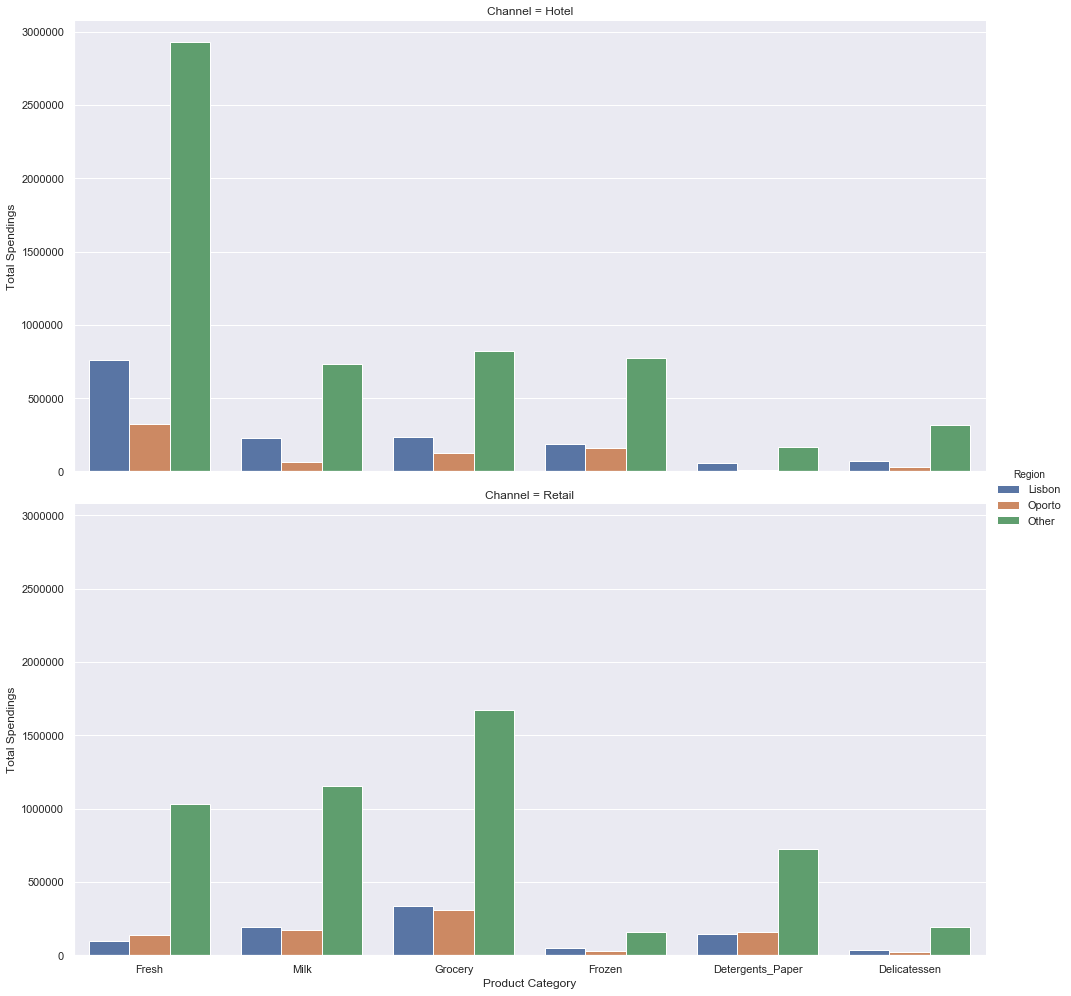

In [289]:
# hue = region, x =product, row = channel
temp = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).sum().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Total Spendings'})
printmd('**Region Wise Total spendings for each product category through a particular channel :**')
sns.catplot(data = temp, y = 'Total Spendings', x = 'Product Category' , hue ='Region', row = 'Channel', kind ='bar',aspect=2, height=7)

## Inferences:
1. In the total spendings through 'Hotel' Channel, for all varities of product the highest spendings is in 'Other' region, followed by 'Lisbon' region and then the lowest spendings is in 'Oporto' region.

2. Through 'Hotel' Channel among all the regions and product varities, the highest total spendings is for 'Fresh' product category in 'Other' region. And the lowest total spendings is for 'Detergents_Paper' product category in 'Oporto' region.

3. In the total spendings through 'Retail' Channel, for all varities of product the highest spendings is in 'Other' region. For the product categories 'Milk', 'Grocery', 'Frozen' and 'Delicatessen' the total spendings through 'Retail' Channel is more in 'Lisbon' region than 'Oporto' region and for the other two product categories, 'Fresh' and 'Detergents_Paper' it is more in 'Oporto' region.

4. Through 'Retail' Channel among all the regions and product varities, the highest total spendings is for 'Grocery' product category in 'Other' region. And the lowest total spendings is for 'Delicatessen' product category in 'Oporto' region.

5. Considering both the channels and all the three regions, the highest total spendings is for 'Fresh' product category through 'Hotel' Channel in 'Other' region.

6. Considering both the channels and all the three regions, the lowest total spendings is for 'Detergents_Paper' product category through 'Hotel' Channel in 'Oporto' region.

**Region Wise Mean spendings for each product category through a particular channel :**

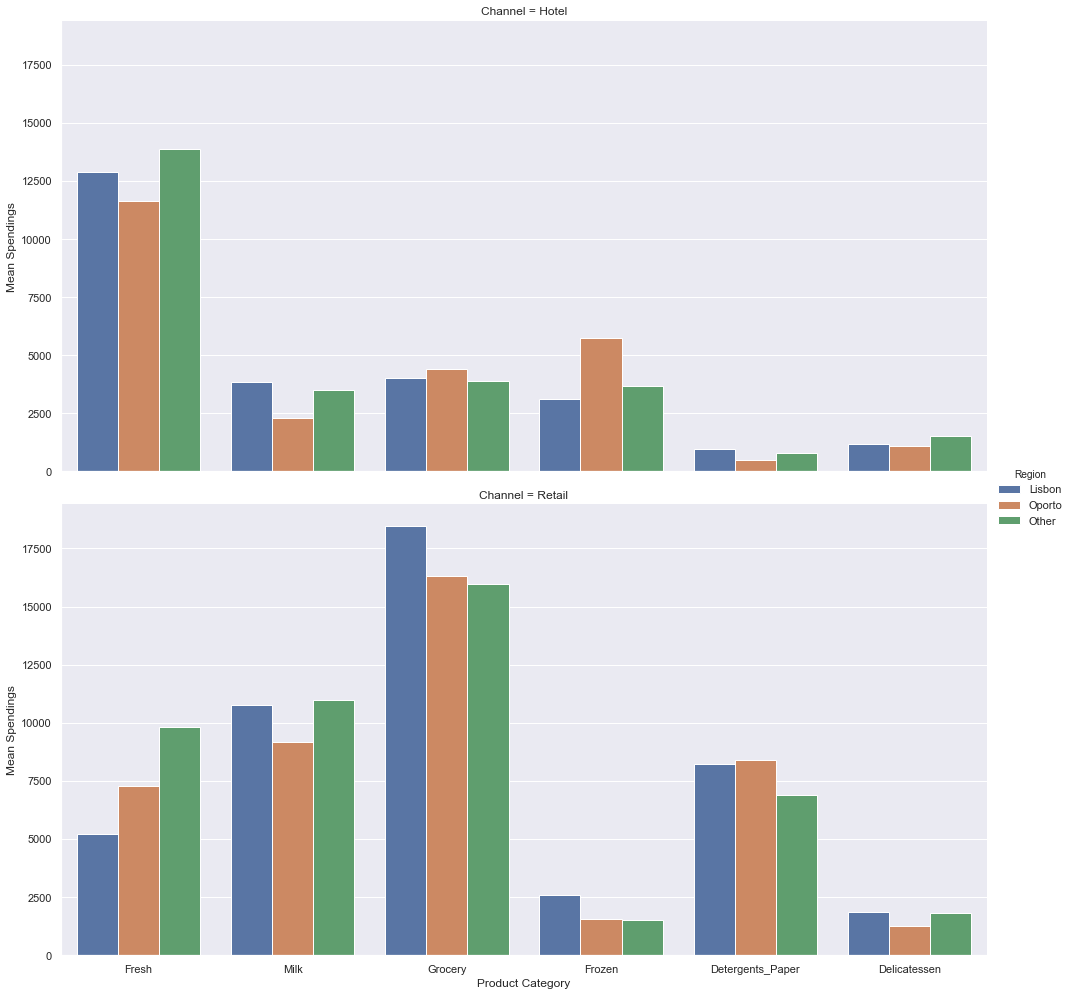

In [290]:
temp_mean = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).mean().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Mean Spendings'})
printmd('**Region Wise Mean spendings for each product category through a particular channel :**')
sns.catplot(data = temp_mean, y = 'Mean Spendings', x = 'Product Category' , hue ='Region', row = 'Channel', kind ='bar',aspect=2, height=7)

## Inferences:
- For 'Hotel' channel, the mean spendings for 'Fresh' product is considerably higher for all the regions as compared to other products.

**Region Wise Total spendings through each channel for a particular product category :**

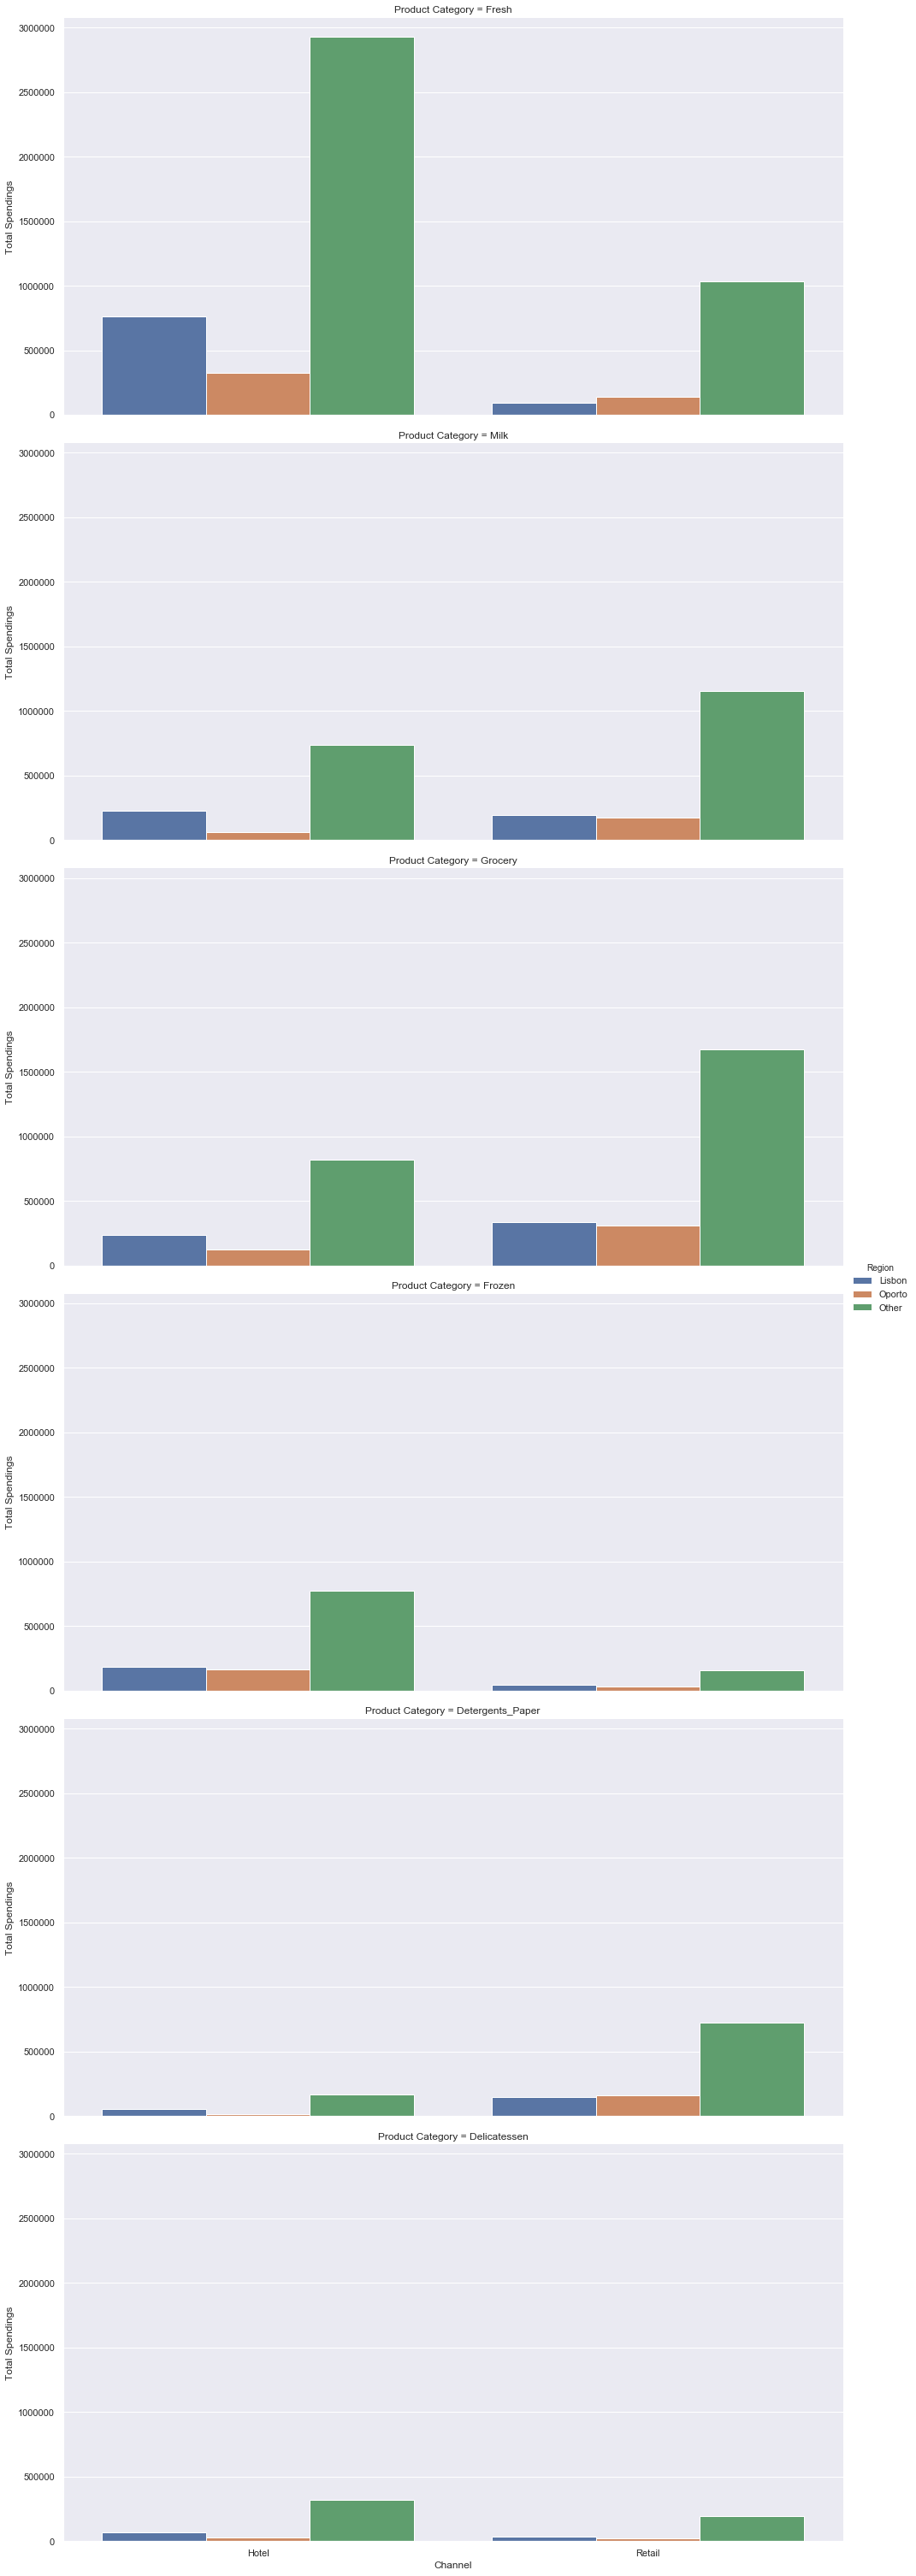

In [291]:
# hue = region, x = channel, row = product
temp = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).sum().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Total Spendings'})
printmd('**Region Wise Total spendings through each channel for a particular product category :**')
sns.catplot(data = temp, y = 'Total Spendings', x = 'Channel' , hue ='Region', row = 'Product Category', kind ='bar',aspect=2, height =7);

## Inferences:
1. For 'Fresh' product category the highest total spendings is through 'Hotel' channel in 'Other' region and the minimum total spendings is through 'Retail' Channel in 'Lisbon' region.
2. For 'Milk' product category the highest total spendings is through 'Retail' channel in 'Other' region and the minimum total spendings is through 'Hotel' Channel in 'Oporto' region.
3. For 'Grocery' product category the highest total spendings is through 'Retail' channel in 'Other' region and the minimum total spendings is through 'Hotel' Channel in 'Oporto' region.
4. For 'Frozen' product category the highest total spendings is through 'Hotel' channel in 'Other' region and the minimum total spendings is through 'Retail' Channel in 'Oporto' region.
5. For 'Detergents_Paper' product category the highest total spendings is through 'Retail' channel in 'Other' region and the minimum total spendings is through 'Hotel' Channel in 'Oporto' region.
6. For 'Delicatessen' product category the highest total spendings is through 'Hotel' channel in 'Other' region and the minimum total spendings is through 'Retail' Channel in 'Oporto' region.

**Mean Spendings for all the product categories across the three regions individually through each of the channels :**

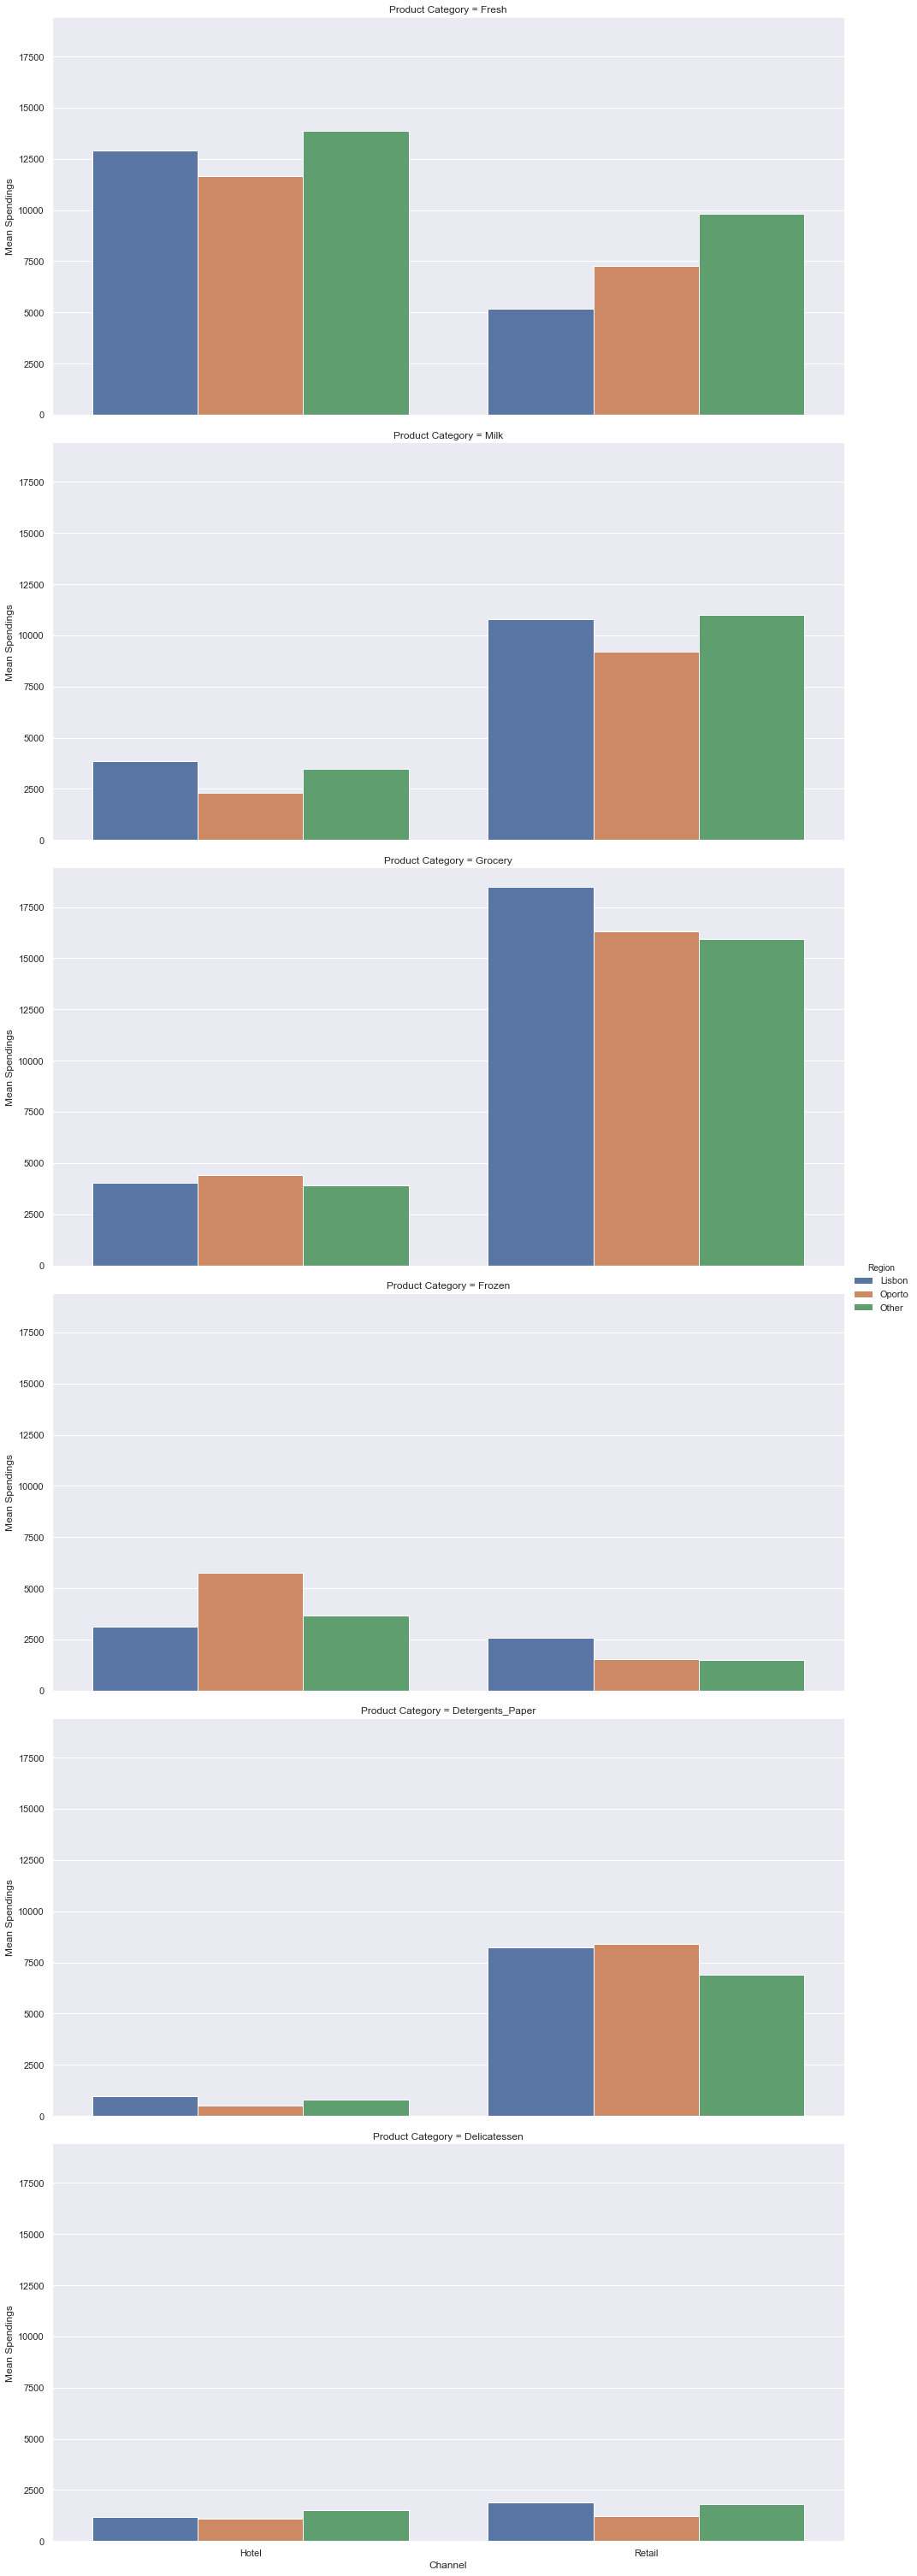

In [292]:
# hue = region, x = channel, row = product
temp_mean = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).mean().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Mean Spendings'})
sns.catplot(data = temp_mean, y = 'Mean Spendings', x = 'Channel' , hue ='Region', row = 'Product Category', kind ='bar',aspect=2, height =7)
printmd('**Mean Spendings for all the product categories across the three regions individually through each of the channels :**')

## Inferences:
- Mean spendings for 'Milk', 'Grocery' and 'Detergents_Paper' products are considerably higher for 'Retail' Channel as compared to 'Hotel' Channel in all the regions.

**Channel Wise Total spendings for each product category in a particular Region :**

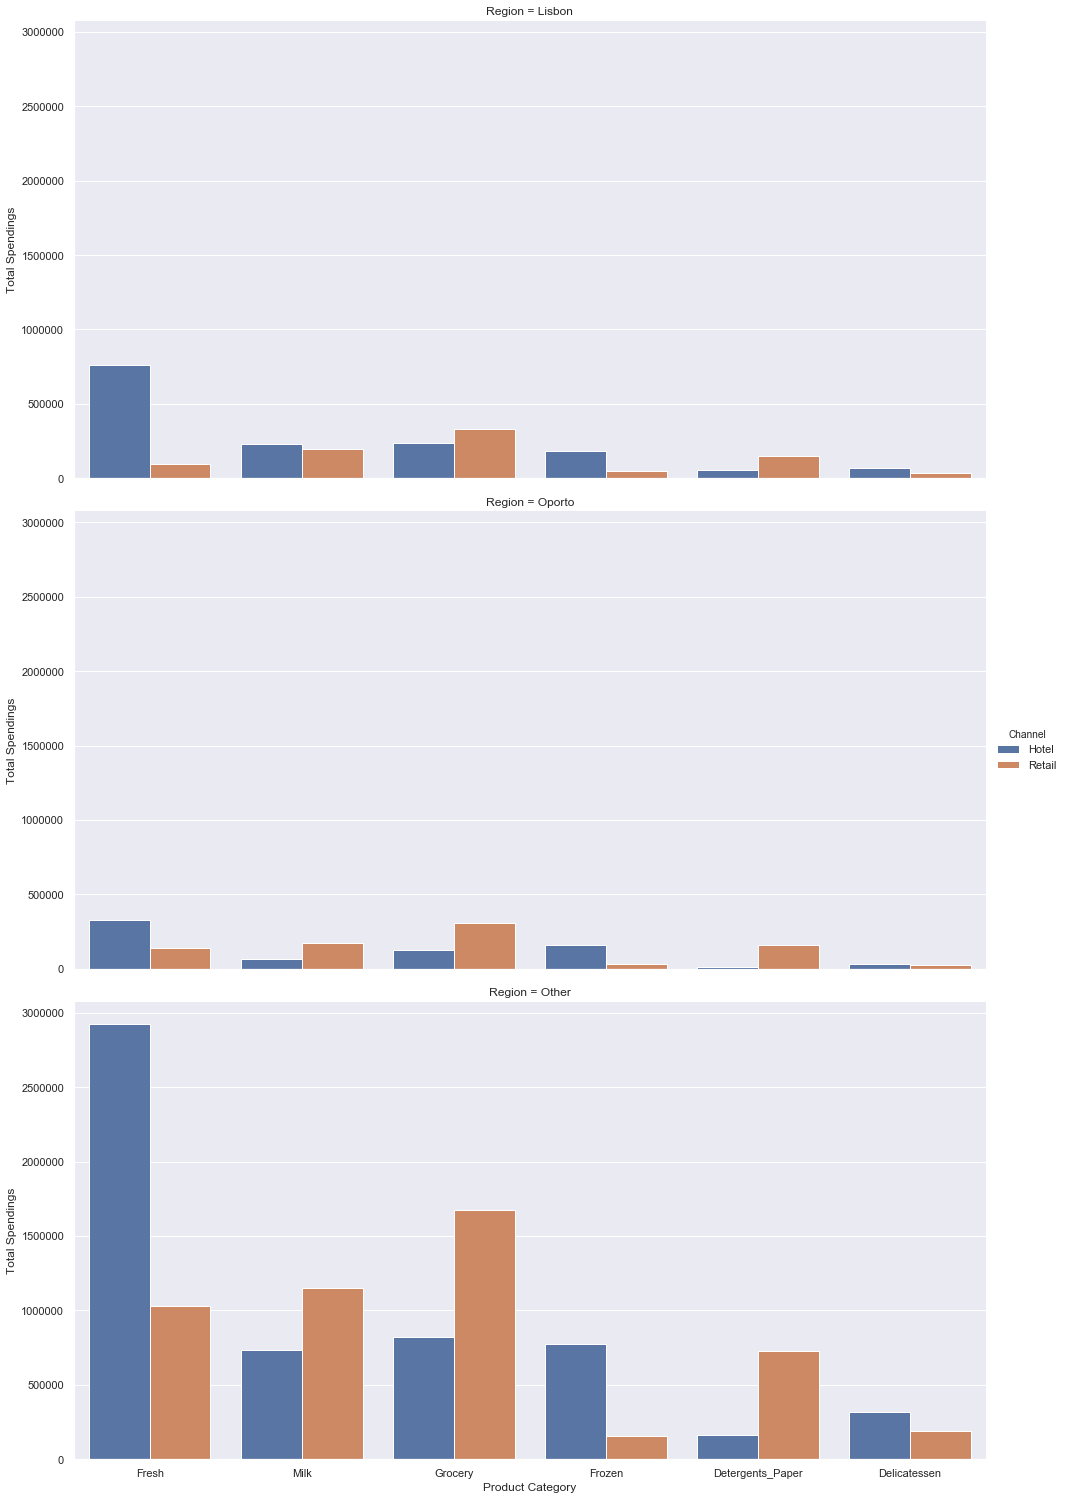

In [293]:
# hue = channel, x = product, row = region
temp = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).sum().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Total Spendings'})
printmd('**Channel Wise Total spendings for each product category in a particular Region :**')
sns.catplot(data = temp, y = 'Total Spendings', x = 'Product Category' , hue ='Channel', row = 'Region', kind ='bar',aspect=2, height =7)

## Inferences:
1. In the total spendings in  'Lisbon' region, for 'Fresh', 'Milk', 'Frozen' and 'Delicatessen' product category the total spendings is higher through 'Hotel' channel and for 'Grocery' and 'Detergents_paper' the total spendings is higher through 'Retail' channel.
2. In 'Lisbon' region among all the channels and product varities, the highest total spendings is for 'Fresh' product category through 'Hotel' channel. And the lowest total spendings is for 'Delicatessen' product category through 'Retail' channel.

3. In the total spendings in  'Oporto' region, for 'Fresh', 'Frozen' and 'Delicatessen' product category the total spendings is higher through 'Hotel' channel and for 'Milk', 'Grocery' and 'Detergents_paper' the total spendings is higher through 'Retail' channel.

4. In 'Oporto' region among all the channels and product varities, the highest total spendings is for 'Fresh' product category through 'Hotel' channel. And the lowest total spendings is for ''Detergents_paper' product category through 'Hotel' channel.

5. In the total spendings in  'Other' region, for 'Fresh', 'Frozen' and 'Delicatessen' product category the total spendings is higher through 'Hotel' channel and for 'Milk', 'Grocery' and 'Detergents_paper' the total spendings is higher through 'Retail' channel.

6. In 'Other' region among all the channels and product varities, the highest total spendings is for 'Fresh' product category through 'Hotel' channel. And the lowest total spendings is for 'Frozen' product category through 'Retail' channel.


5. Considering both the channels and all the three regions, the highest total spendings is for 'Fresh' product category through 'Hotel' Channel in 'Other' region.

6. Considering both the channels and all the three regions, the lowest total spendings is for 'Detergents_Paper' product category through 'Hotel' Channel in 'Oporto' region.

**Channel Wise Mean spendings for each product category in a particular Region :**

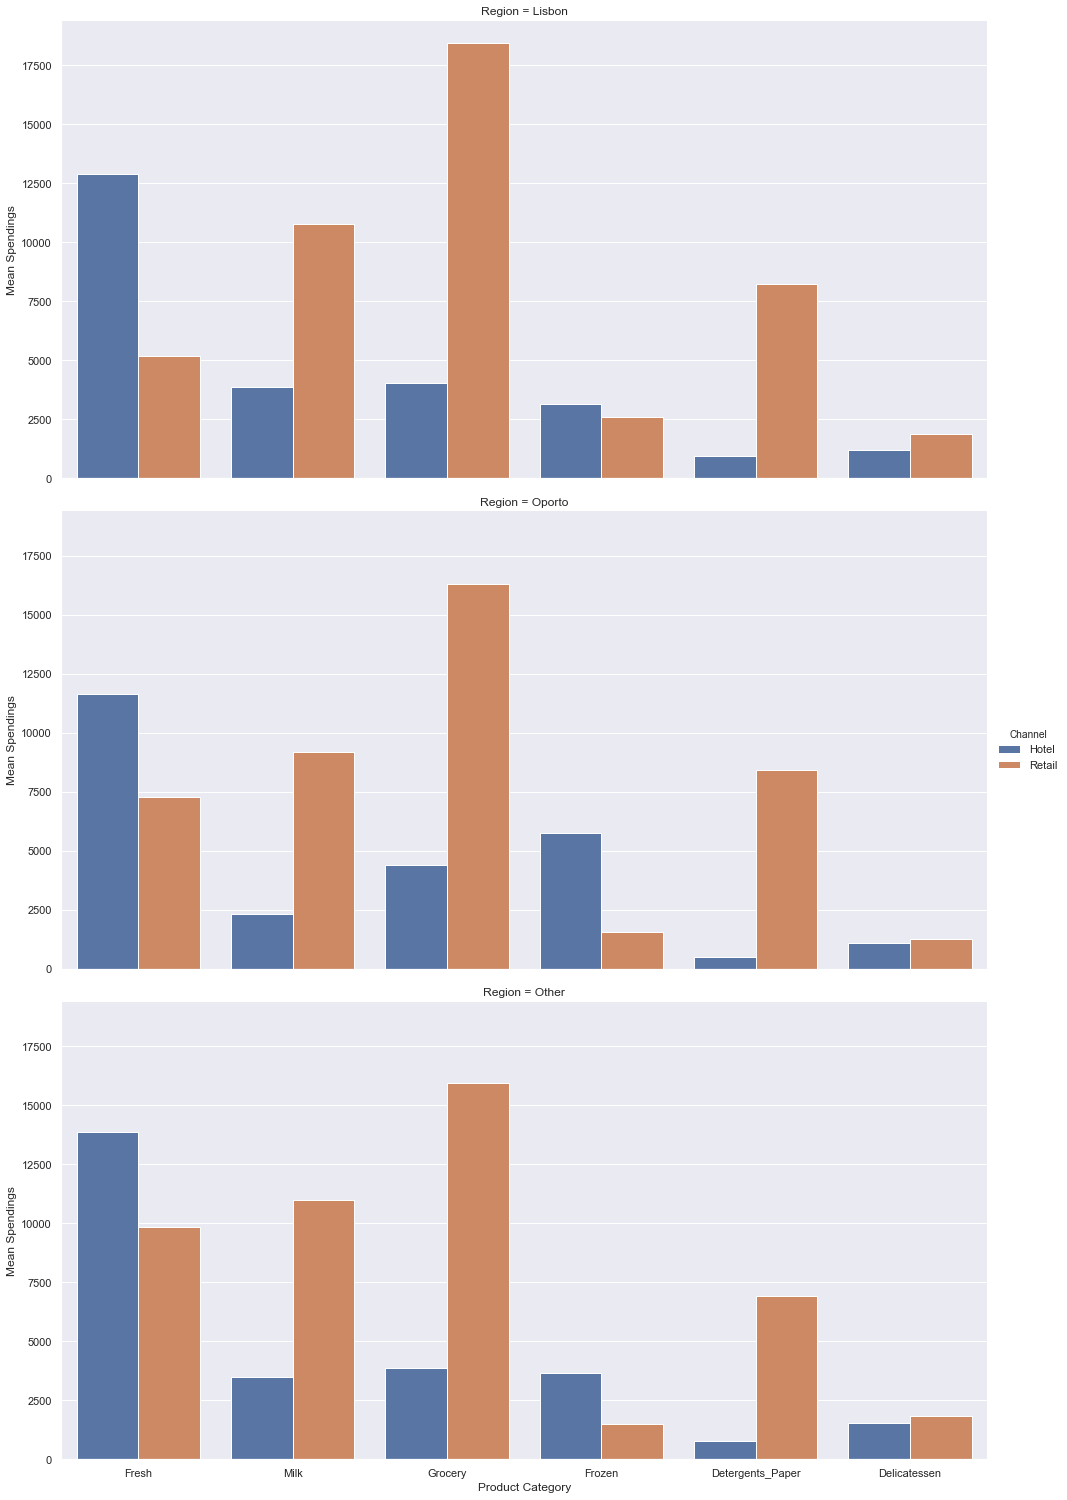

In [294]:
# hue = channel, x = product, row = region
temp_mean = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).mean().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Mean Spendings'})
printmd('**Channel Wise Mean spendings for each product category in a particular Region :**')
sns.catplot(data = temp_mean, y = 'Mean Spendings', x = 'Product Category' , hue ='Channel', row = 'Region', kind ='bar',aspect=2, height =7)

## Inferences:
- For 'Retail' Channel, 'Milk', 'Grocery' and 'Detergents_Paper' have considerably high mean spendings in all the three regions as compared to 'Hotel' Channel.

**Channel Wise Total spendings in each Region for a particular product category :**

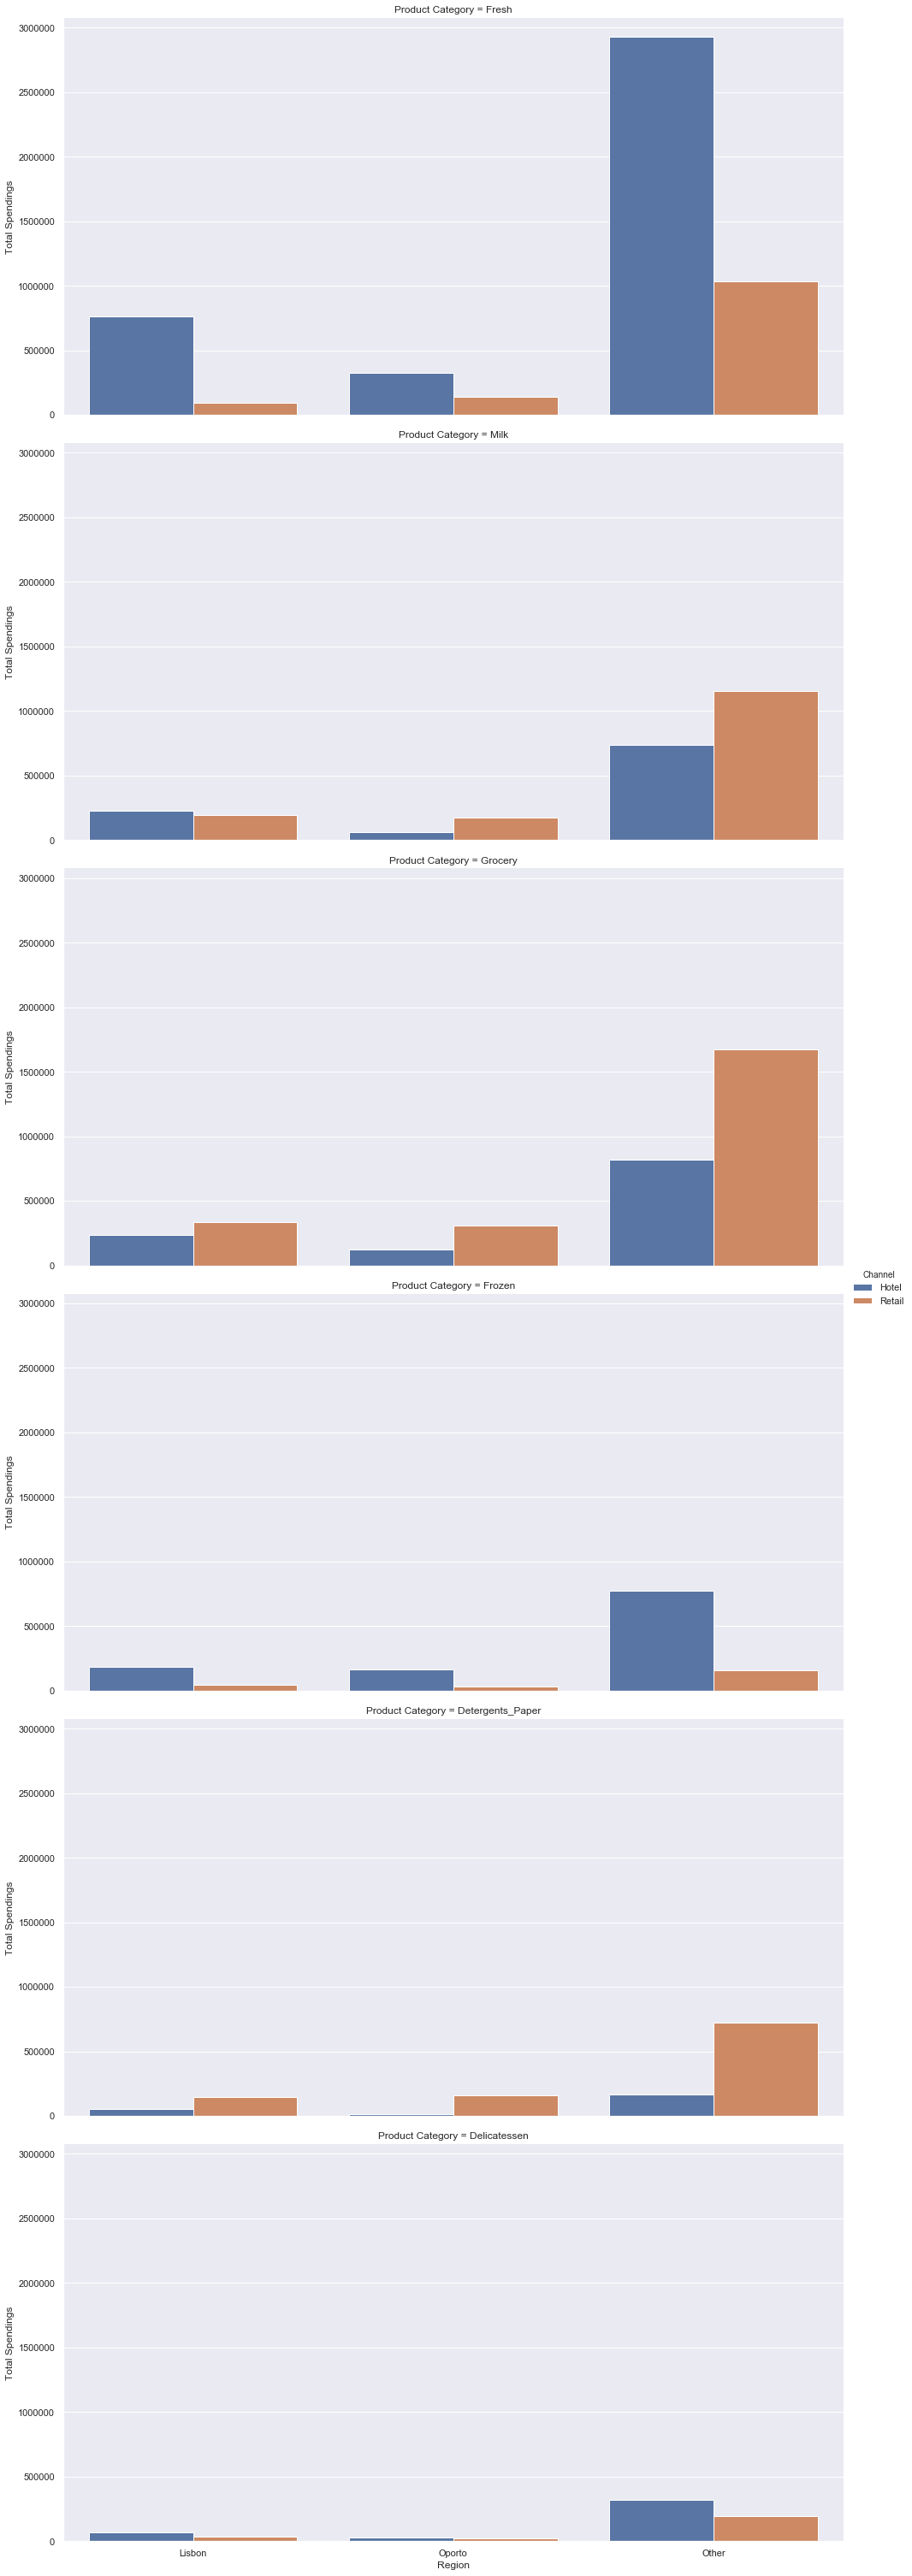

In [295]:
# hue = channel, x = region, row = product
temp = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).sum().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Total Spendings'})
printmd('**Channel Wise Total spendings in each Region for a particular product category :**')
sns.catplot(data = temp, y = 'Total Spendings', x = 'Region' , hue ='Channel', row = 'Product Category', kind ='bar',aspect=2, height =7)

## Inferences:
1. For 'Fresh' product category the highest total spendings is through 'Hotel' channel in 'Other' region and the minimum total spendings is through 'Retail' Channel in 'Lisbon' region.

2. For 'Milk' product category the highest total spendings is through 'Retail' channel in 'Other' region and the minimum total spendings is through 'Hotel' Channel in 'Oporto' region.

3. For 'Grocery' product category the highest total spendings is through 'Retail' channel in 'Other' region and the minimum total spendings is through 'Hotel' Channel in 'Oporto' region.

4. For 'Frozen' product category the highest total spendings is through 'Hotel' channel in 'Other' region and the minimum total spendings is through 'Retail' Channel in 'Oporto' region.

5. For 'Detergents_Paper' product category the highest total spendings is through 'Retail' channel in 'Other' region and the minimum total spendings is through 'Hotel' Channel in 'Oporto' region.

6. For 'Delicatessan' product category the highest total spendings is through 'Hotel' channel in 'Other' region and the minimum total spendings is through 'Retail' Channel in 'Oporto' region.

**Channel Wise Mean spendings in each Region for a particular product category :**

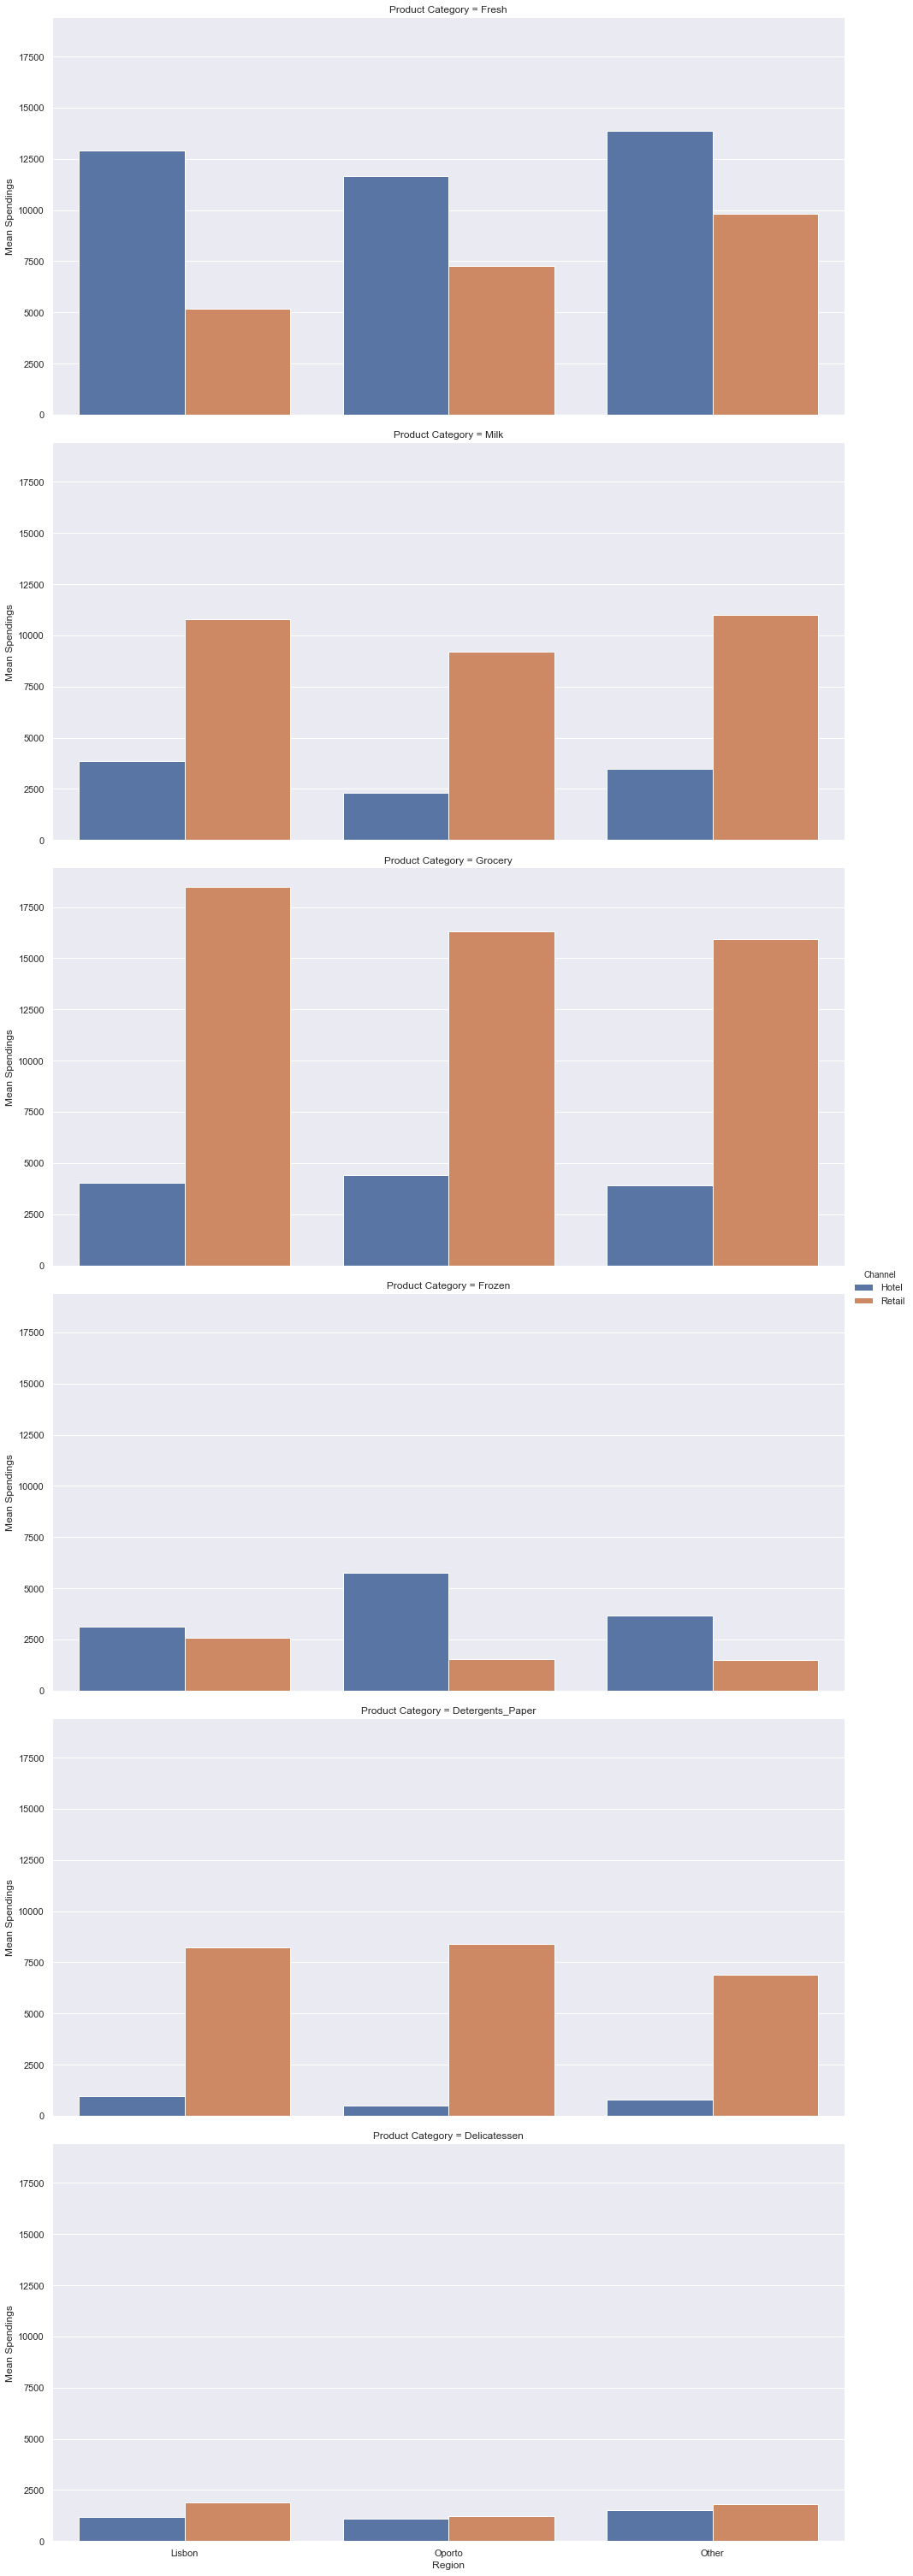

In [296]:
# hue = channel, x = region, row = product
temp_mean = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).mean().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Mean Spendings'})
printmd('**Channel Wise Mean spendings in each Region for a particular product category :**')
sns.catplot(data = temp_mean, y = 'Mean Spendings', x = 'Region' , hue ='Channel', row = 'Product Category', kind ='bar',aspect=2, height =7)

## Inferences:
- Mean spendings for 'Milk', 'Grocery' and 'Detergents_Paper' products are considerably higher for 'Retail' Channel as compared to 'Hotel' Channel in all the regions.

## Observing all varieties show similar behaviour across Region and Channel:
- **We observe the behaviour of the six different product varities across the regions and channels in four ways :**
    1. We observe the behaviour of the six different product varities according to total and mean spendings in the three regions 'Lisbon', 'Oporto' and 'Other'.
    2. We observe the behaviour of the six different product varities according to the total and mean spendings in the two channels 'Hotel' and 'Retail'.
    3. We observe the behaviour of the six different product varities according to the total and mean spendings across the three regions 'Lisbon', 'Oporto' and 'Other' through each of the channels 'Hotel' and 'Retail'.
    4. We observe the behaviour of the six different product varities according to the total and mean spendings through the two channels 'Hotel' and 'Retail' in each of the three regions 'Lisbon', 'Oporto' and 'Other'.
- **These are discussed below with the graphical representations:**

## Note:
- In barplots we will compare the product patterns in each region or channel. 
- In the linecharts we will observe if there is any cross section of lines while moving from one region to other or from one channel to other.

## Total Spendings for all the product categories in the regions:

**Total Spendings for all the product categories in the regions :**

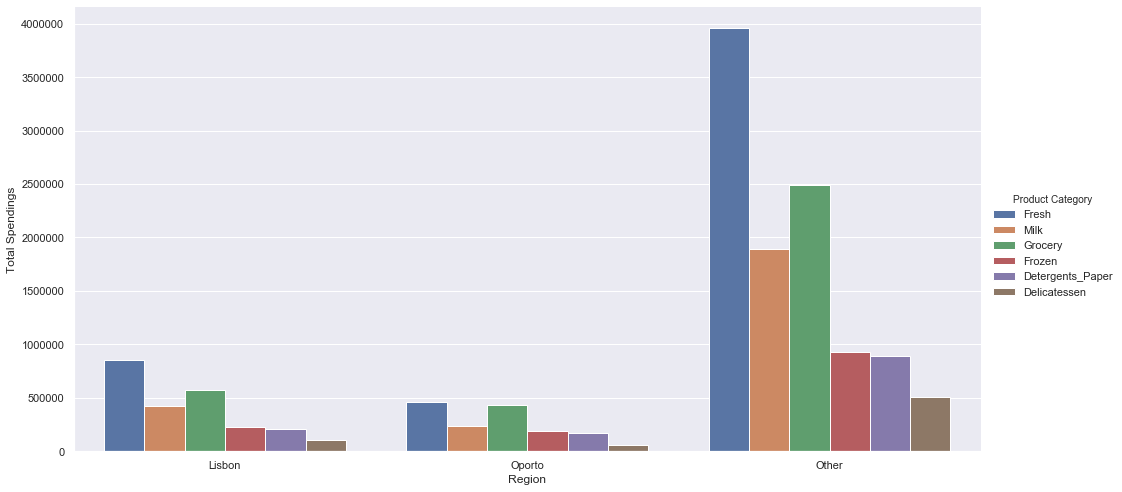

In [297]:
# hue = product, x = region, row = channel
temp = wholesale.drop('Buyer/Spender', axis =1).groupby('Region').sum().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Total Spendings'})
sns.catplot(data = temp, y = 'Total Spendings', x = 'Region' , hue ='Product Category', kind ='bar',aspect=2, height =7)
printmd('**Total Spendings for all the product categories in the regions :**')

**Total Spendings for all the product categories in the regions :**

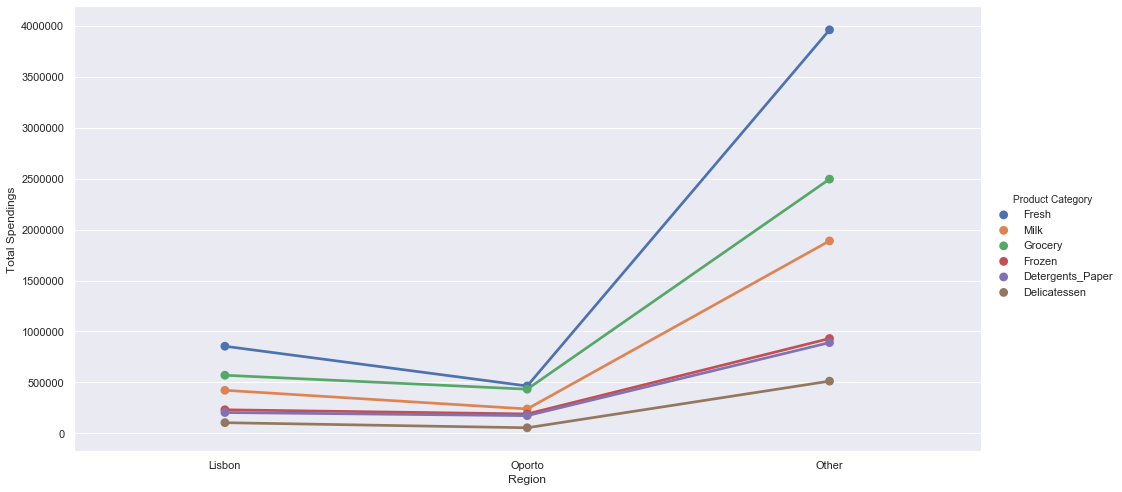

In [298]:
# hue = product, x = region, row = channel
temp = wholesale.drop('Buyer/Spender', axis =1).groupby('Region').sum().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Total Spendings'})
sns.catplot(data = temp, y = 'Total Spendings', x = 'Region' , hue ='Product Category', kind ='point',aspect=2, height =7)
printmd('**Total Spendings for all the product categories in the regions :**')

## Inferences:
- Across all the three regions it could be observed that the total spendings of the product categories are same with the highest total spendings for 'Fresh' product category, followed by 'Grocery', then 'Milk', then 'Frozen', then 'Detergents_Paper' and finally 'Delicatessen' product category.

## Mean Spendings for all the product categories in the regions

**Mean Spendings for all the product categories in the regions :**

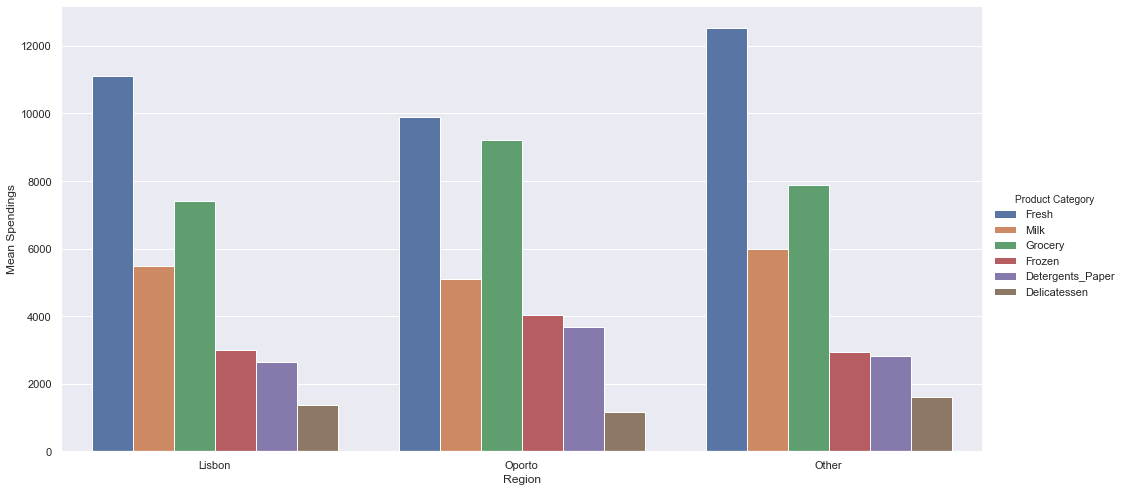

In [299]:
# hue = product, x = region, row = channel
temp_mean = wholesale.drop('Buyer/Spender', axis =1).groupby('Region').mean().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Mean Spendings'})
sns.catplot(data = temp_mean, y = 'Mean Spendings', x = 'Region' , hue ='Product Category', kind ='bar',aspect=2, height =7)
printmd('**Mean Spendings for all the product categories in the regions :**')

**Mean Spendings for all the product categories in the regions :**

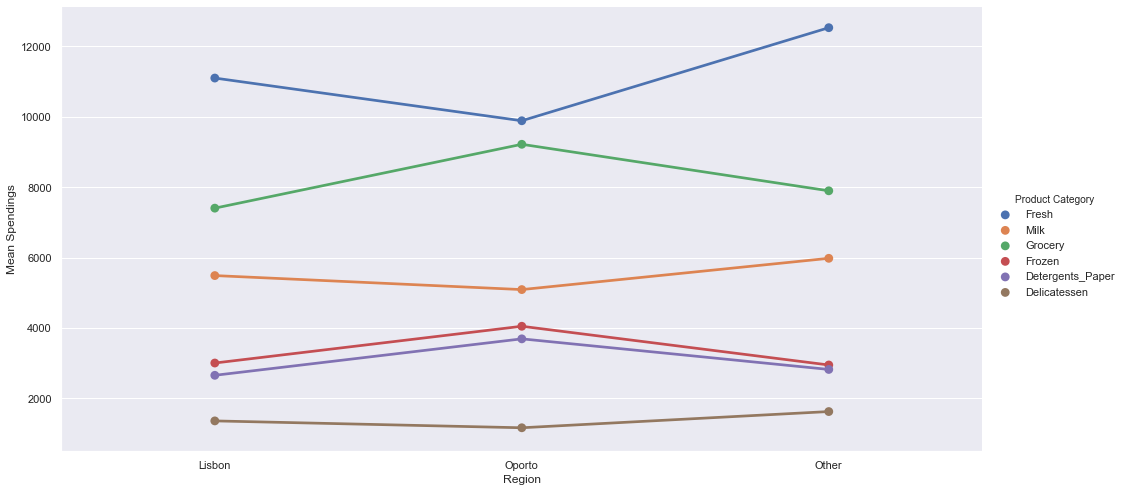

In [300]:
# hue = product, x = region, row = channel
temp_mean = wholesale.drop('Buyer/Spender', axis =1).groupby('Region').mean().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Mean Spendings'})
printmd('**Mean Spendings for all the product categories in the regions :**')
sns.catplot(data = temp_mean, y = 'Mean Spendings', x = 'Region' , hue ='Product Category', kind ='point',aspect=2, height =7)

## Inferences:
- Across all the three regions it could be observed that the mean spendings of the product categories are same with the highest mean spendings for 'Fresh' product category, followed by 'Grocery', then 'Milk', then 'Frozen', then 'Detergents_Paper' and finally 'Delicatessen' product category.

## Total Spendings for all the product categories through the channels:

**Total Spendings for all the product categories through the channels :**

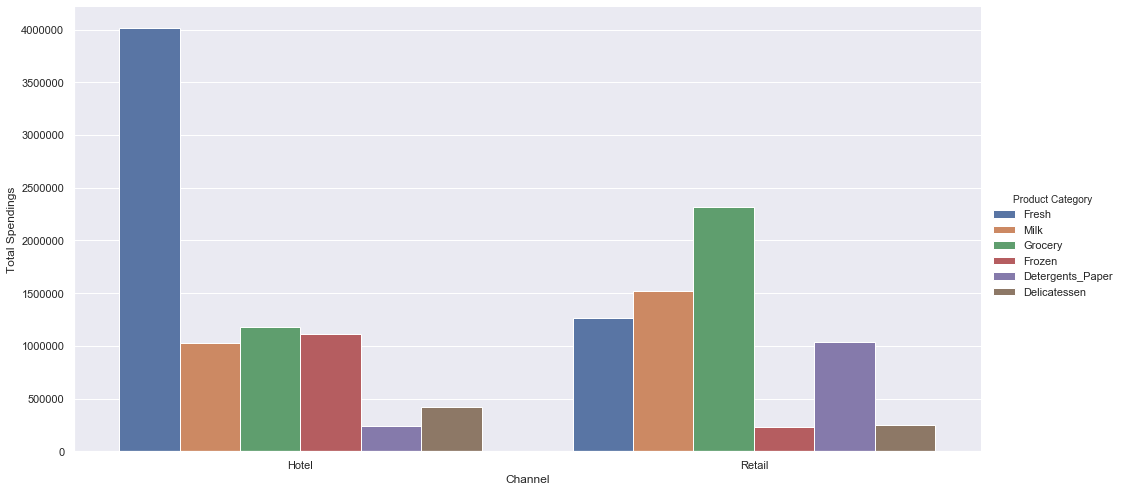

In [301]:
# hue = product, x = region, row = channel
temp = wholesale.drop('Buyer/Spender', axis =1).groupby('Channel').sum().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Total Spendings'})
sns.catplot(data = temp, y = 'Total Spendings', x = 'Channel' , hue ='Product Category', kind ='bar',aspect=2, height =7)
printmd('**Total Spendings for all the product categories through the channels :**') 

**Total Spendings for all the product categories through the channels :**

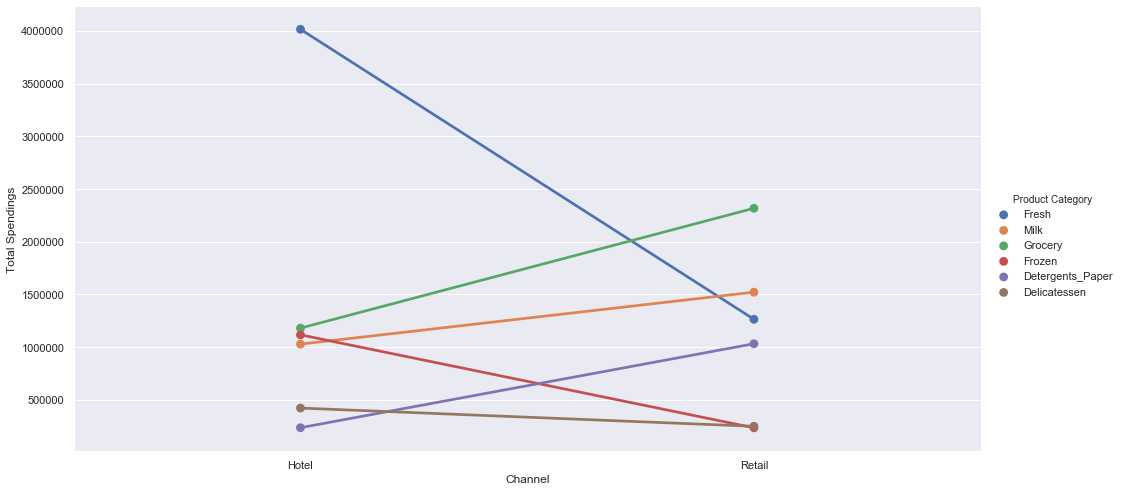

In [302]:
# hue = product, x = region, row = channel
temp = wholesale.drop('Buyer/Spender', axis =1).groupby('Channel').sum().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Total Spendings'})
sns.catplot(data = temp, y = 'Total Spendings', x = 'Channel' , hue ='Product Category', kind ='point',aspect=2, height =7)
printmd('**Total Spendings for all the product categories through the channels :**')

## Inferences:
- There is no particular trend for total spendings of the product categories through the two channels.

## Mean Spendings for all the product categories through the channels:

**Mean Spendings for all the product categories through the channels :**

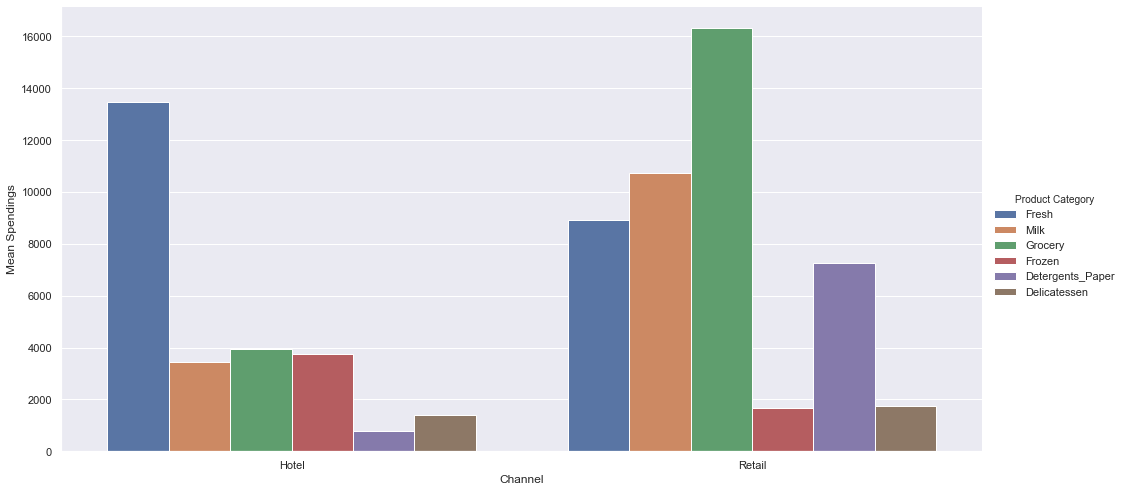

In [303]:
# hue = product, x = region, row = channel
temp_mean = wholesale.drop('Buyer/Spender', axis =1).groupby('Channel').mean().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Mean Spendings'})
sns.catplot(data = temp_mean, y = 'Mean Spendings', x = 'Channel' , hue ='Product Category', kind ='bar',aspect=2, height =7)
printmd('**Mean Spendings for all the product categories through the channels :**')

**Mean Spendings for all the product categories through the channels :**

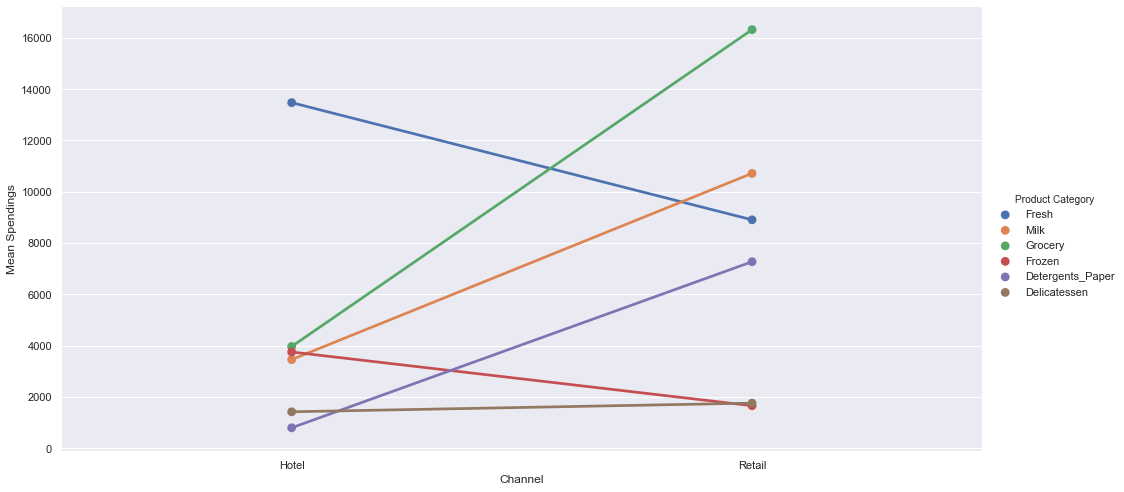

In [304]:
# hue = product, x = region, row = channel
temp_mean = wholesale.drop('Buyer/Spender', axis =1).groupby('Channel').mean().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Mean Spendings'})
printmd('**Mean Spendings for all the product categories through the channels :**')
sns.catplot(data = temp_mean, y = 'Mean Spendings', x = 'Channel' , hue ='Product Category', kind ='point',aspect=2, height =7)

## Inferences:
- There is no particular trend for mean spendings of the product categories through the two channels.

## Total Spendings for all the product categories across the three regions individually through each of the channels:

**Total Spendings for all the product categories across the three regions individually through each of the channels :**

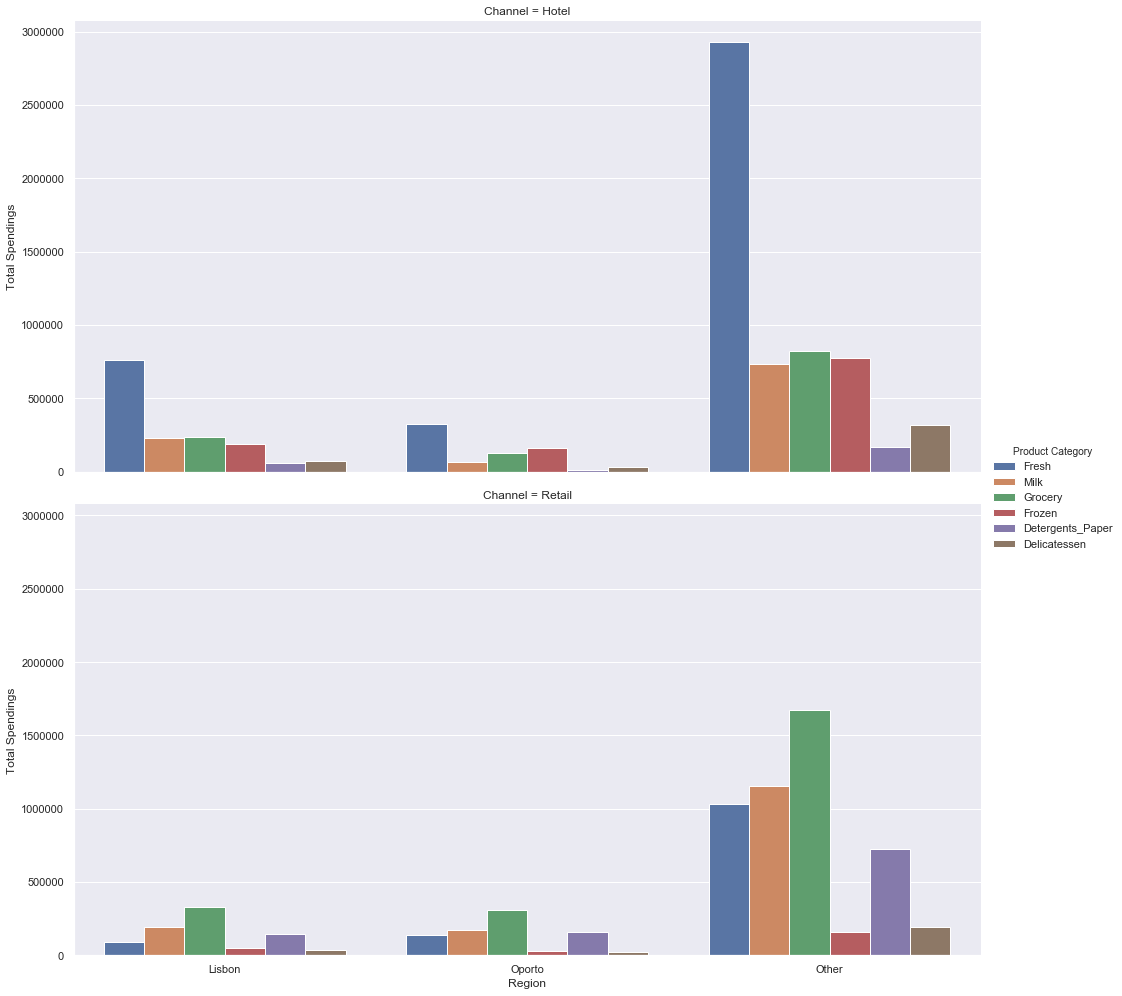

In [305]:
# hue = product, x = region, row = channel
temp = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).sum().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Total Spendings'})
sns.catplot(data = temp, y = 'Total Spendings', x = 'Region' , hue ='Product Category', row = 'Channel', kind ='bar',aspect=2, height =7)
printmd('**Total Spendings for all the product categories across the three regions individually through each of the channels :**')


**Total Spendings for all the product categories across the three regions individually through each of the channels :**

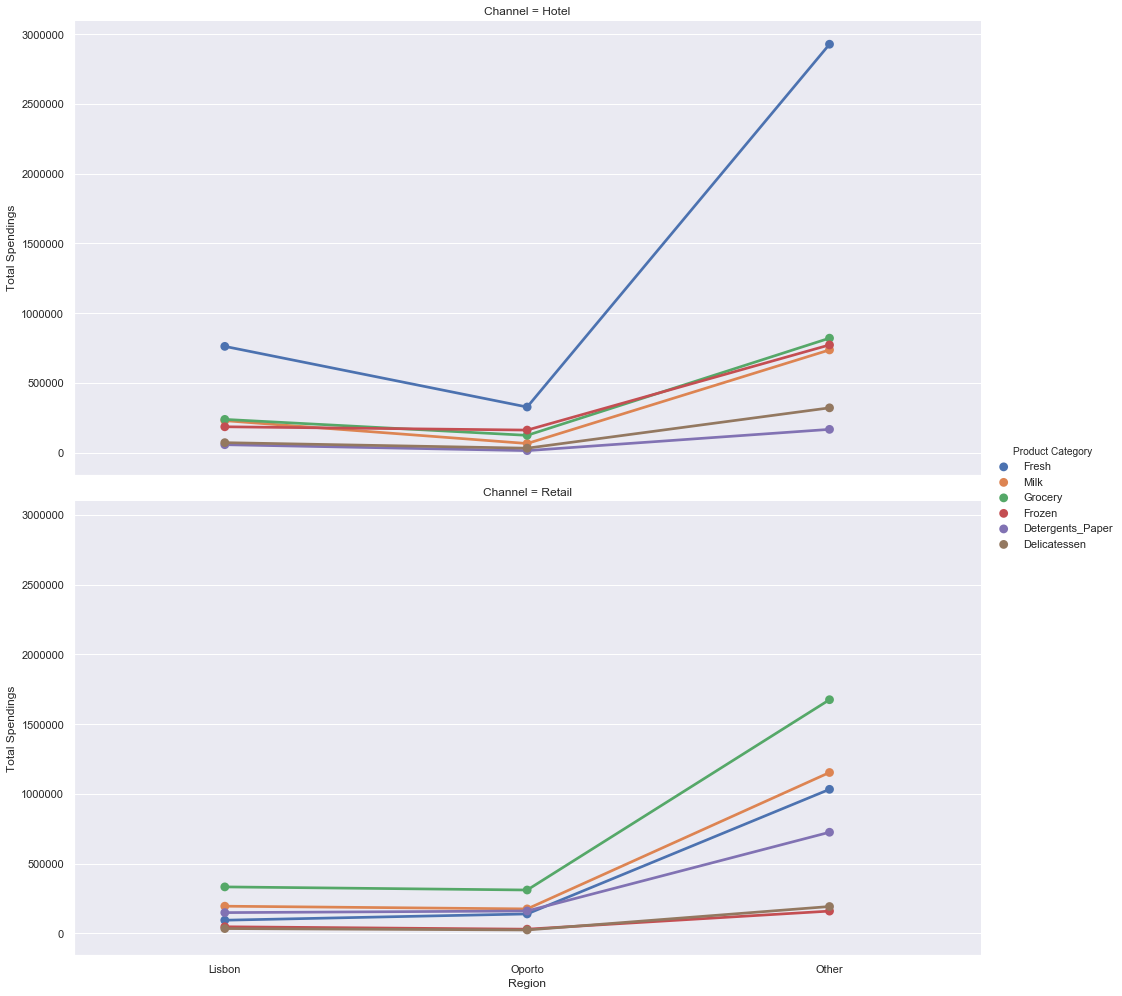

In [306]:
# hue = product, x = region, row = channel
temp = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).sum().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Total Spendings'})
printmd('**Total Spendings for all the product categories across the three regions individually through each of the channels :**')
sns.catplot(data = temp, y = 'Total Spendings', x = 'Region' , hue ='Product Category', row = 'Channel', kind ='point',aspect=2, height =7)

## Inferences:
- We can observe the trends in total spendings for the product categories across the three regions 'Lisbon', 'Oporto' and 'Other' through each of the channels as follows:
    1. Through the 'Hotel' Channel, the 'Fresh' product category is always the one with highest total spendings in all the three regions. The second, third and fourth position in total spendings is always taken interchangebly among themselves by 'Milk', 'Grocery' and 'Frozen' food category. The fifth and the last position in total spendings is interchangebly taken by 'Detergents_Paper' and 'Delicatessen' product category.
    2. Through the 'Retail' Channel, the trend of the total spendings in product categories is nearly the same in all the three regions with 'Grocery' product category always with highest total spendings followed by 'Milk product category'. The 'Fresh' and 'Detergents_Paper' product categories exchange positions in the third and fourth place and with 'Frozen' and 'Delicatessen' product categories exchanging positions in the fifth and last position.

## Mean Spendings for all the product categories across the three regions individually through each of the channels:

**Mean Spendings for all the product categories across the three regions individually through each of the channels :**

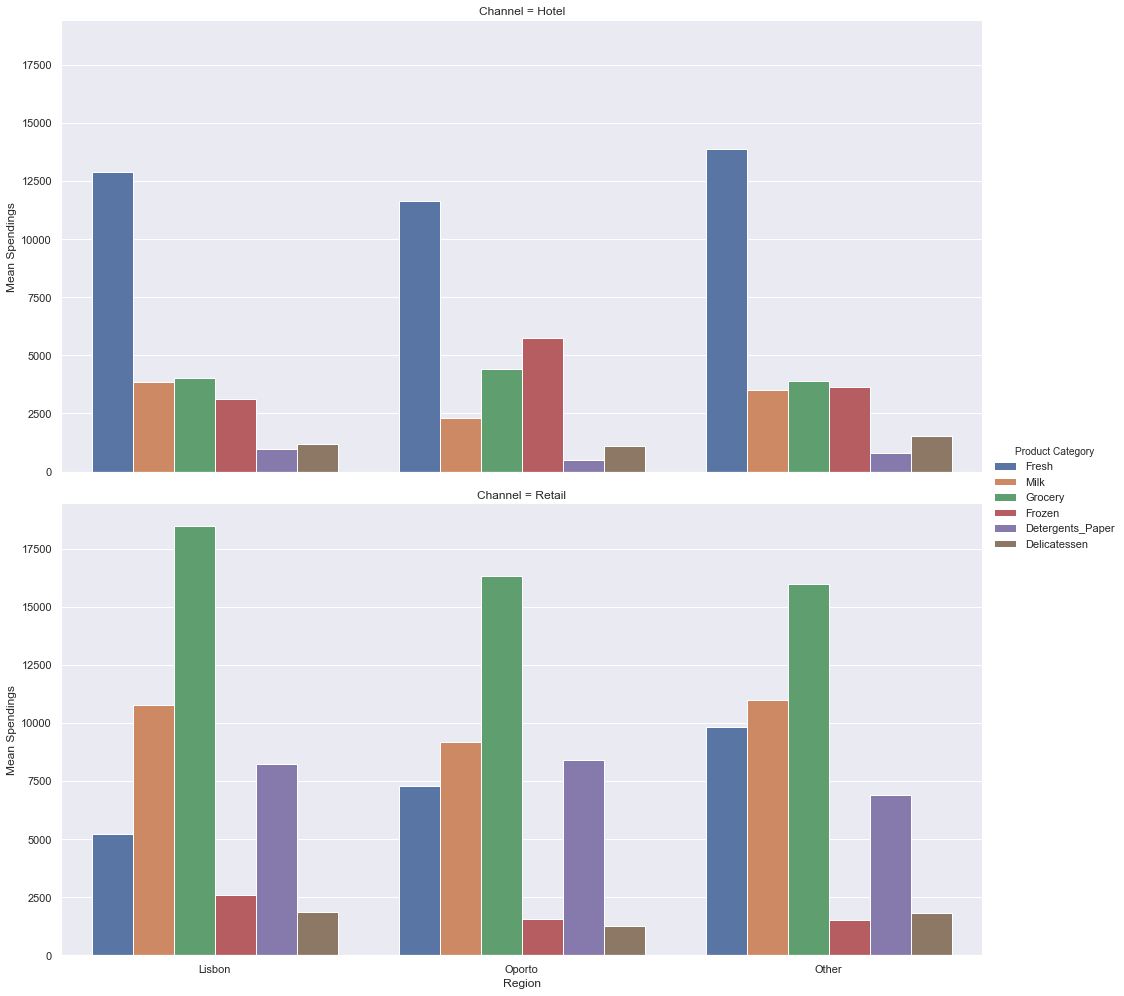

In [307]:
# hue = product, x = region, row = channel
temp_mean = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).mean().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Mean Spendings'})
sns.catplot(data = temp_mean, y = 'Mean Spendings', x = 'Region' , hue ='Product Category', row = 'Channel', kind ='bar',aspect=2, height =7)
printmd('**Mean Spendings for all the product categories across the three regions individually through each of the channels :**')

**Mean Spendings for all the product categories across the three regions individually through each of the channels :**

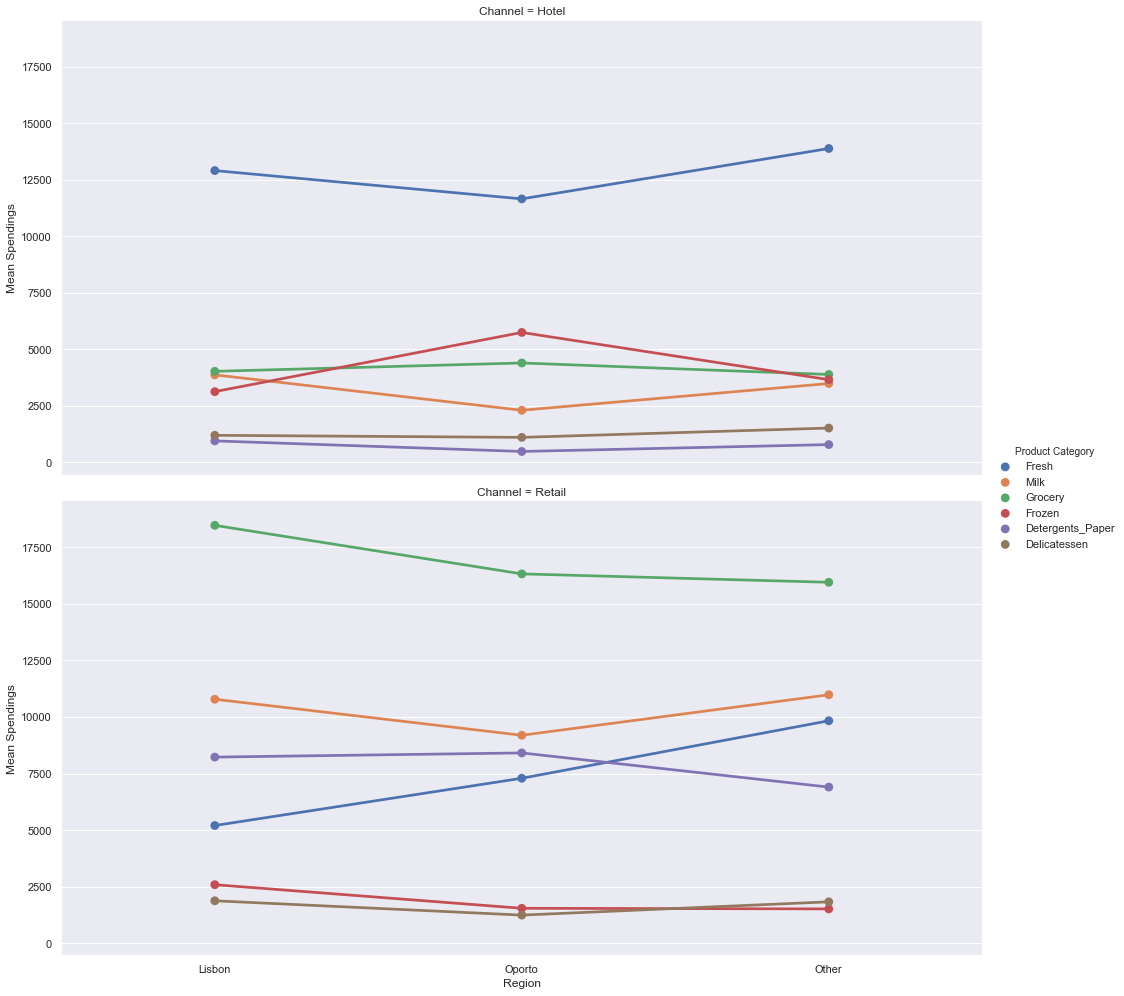

In [308]:
# hue = product, x = region, row = channel
temp_mean = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).mean().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Mean Spendings'})
printmd('**Mean Spendings for all the product categories across the three regions individually through each of the channels :**')
sns.catplot(data = temp_mean, y = 'Mean Spendings', x = 'Region' , hue ='Product Category', row = 'Channel', kind ='point',aspect=2, height =7)

## Inferences:
- We can observe the trends in mean spendings for the product categories across the three regions 'Lisbon', 'Oporto' and 'Other' through each of the channels as follows:
    1. Through the 'Hotel' Channel, the 'Fresh' product category is always the one with highest mean spendings in all the three regions. 'Delicatessen' and 'Detergents_Paper' product categories always have the fifth and last mean spendings respectively in all the three regions. But 'Milk', 'Grocery' and 'Frozen' have no particular trend in the three regions.
    2. Through the 'Retail' Channel, the 'Grocery' product category always has the highest mean spendings in all the three regions. But the other product categories have no particular trend across the three regions.

## Total spendings for all the product categories through the two channels individually in each of the three regions:

**Total spendings for all the product categories through the two channels individually in each of the three regions.**

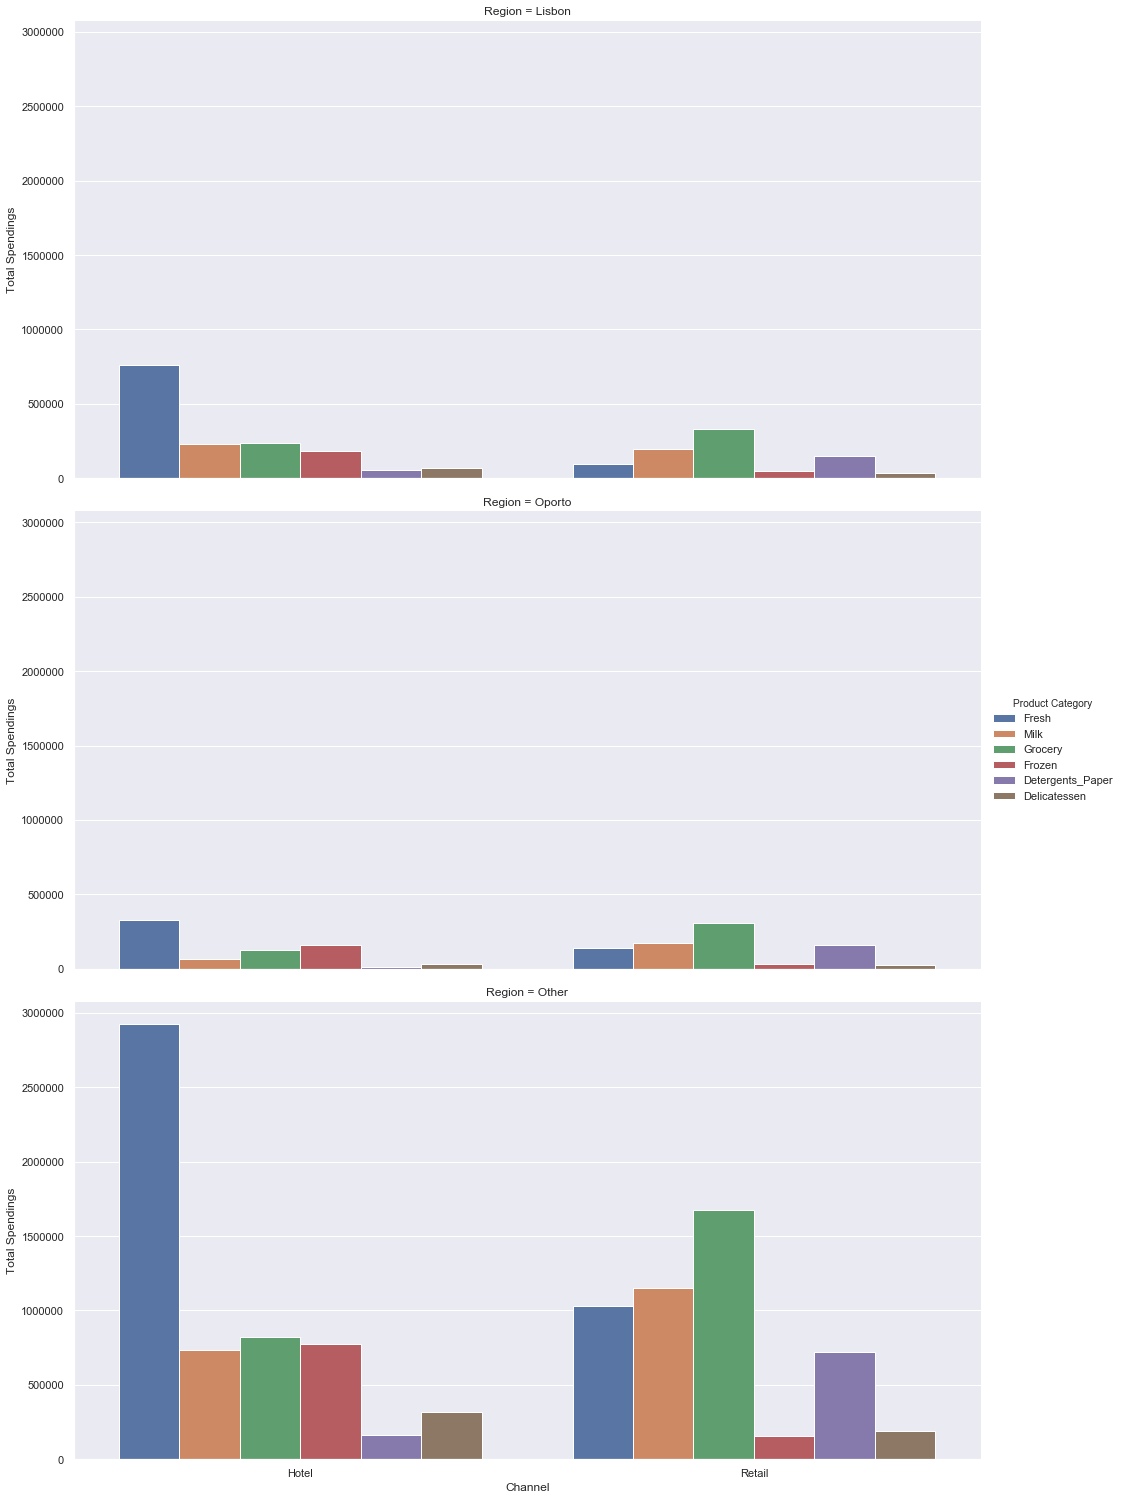

In [309]:
# hue = product, x = channel, row = region
temp = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).sum().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Total Spendings'})
sns.catplot(data = temp, y = 'Total Spendings', x = 'Channel' , hue ='Product Category', row = 'Region', kind ='bar',aspect=2, height =7)
printmd('**Total spendings for all the product categories through the two channels individually in each of the three regions.**')

**Total spendings for all the product categories through the two channels individually in each of the three regions :**

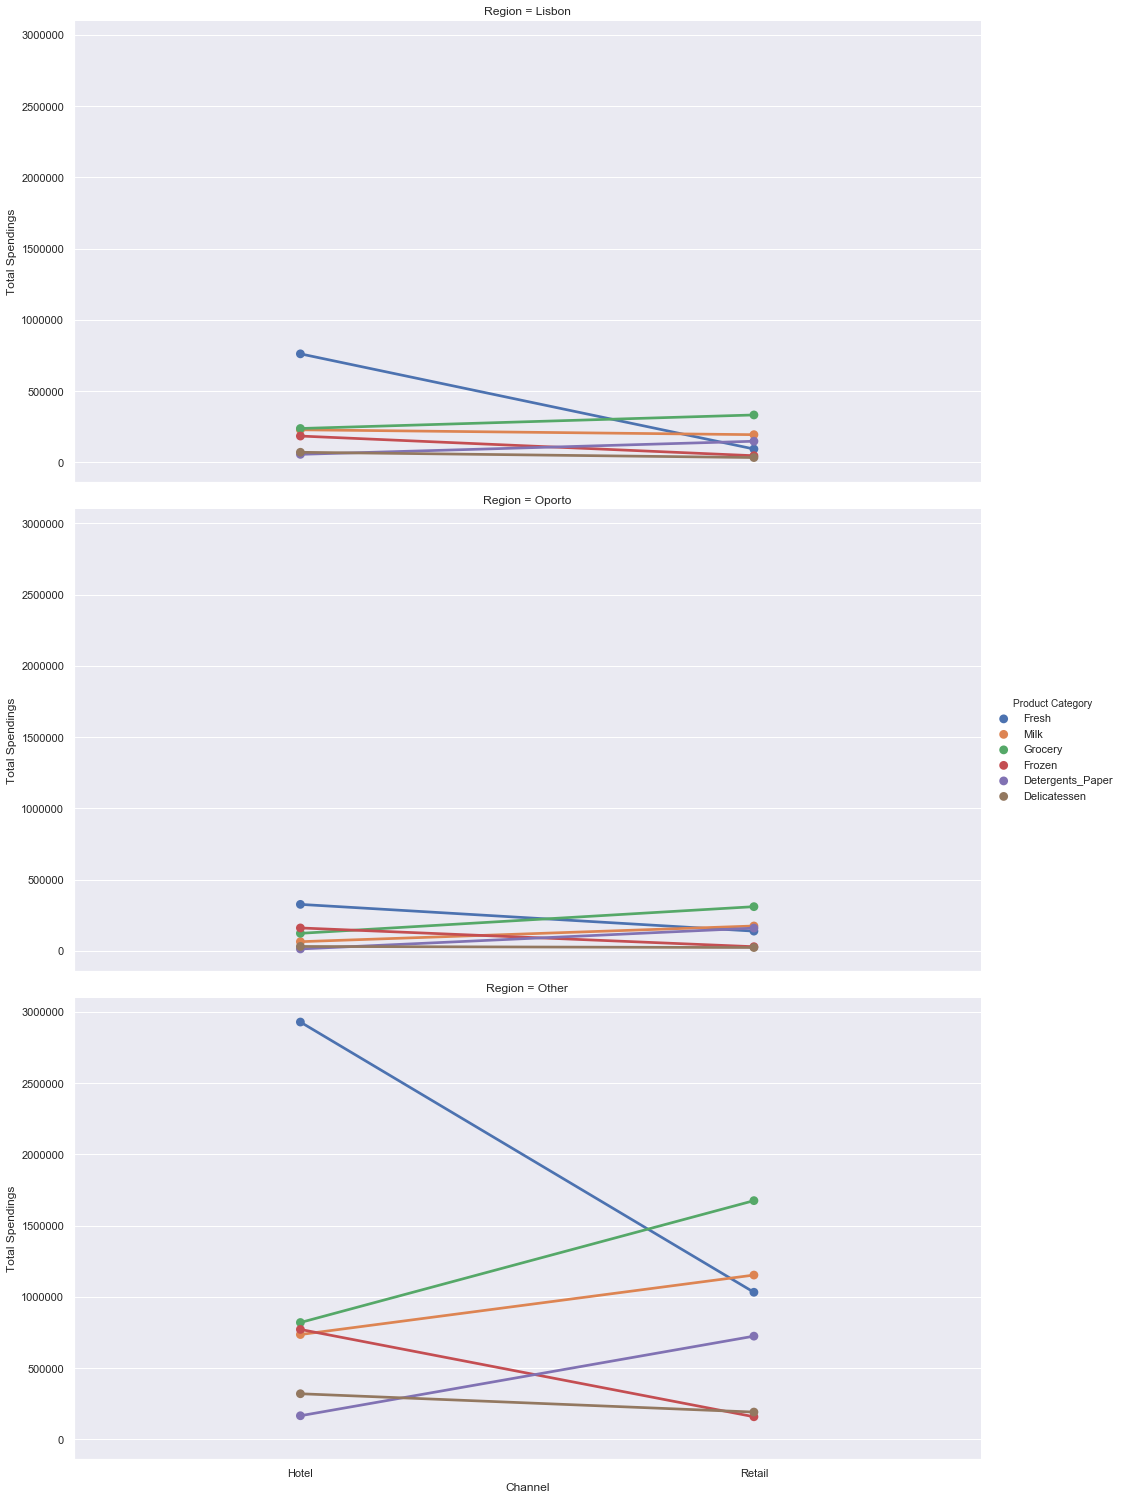

In [310]:
# hue = product, x = channel, row = region
temp = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).sum().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Total Spendings'})
printmd('**Total spendings for all the product categories through the two channels individually in each of the three regions :**')
sns.catplot(data = temp, y = 'Total Spendings', x = 'Channel' , hue ='Product Category', row = 'Region', kind ='point',aspect=2, height = 7)

## Inferences:
- We can observe the trends in total spendings for the product categories across 'Hotel' and 'Retail' Channel in each of the three regions as follows:
    - In all the regions 'Lisbon', 'Oporto' and 'Other', no particular trend in total spendings is observed among the product categories across the two channels.

## Mean spendings for all the product categories through the two channels individually in each of the three regions:

**Mean spendings for all the product categories through the two channels individually in each of the three regions :**

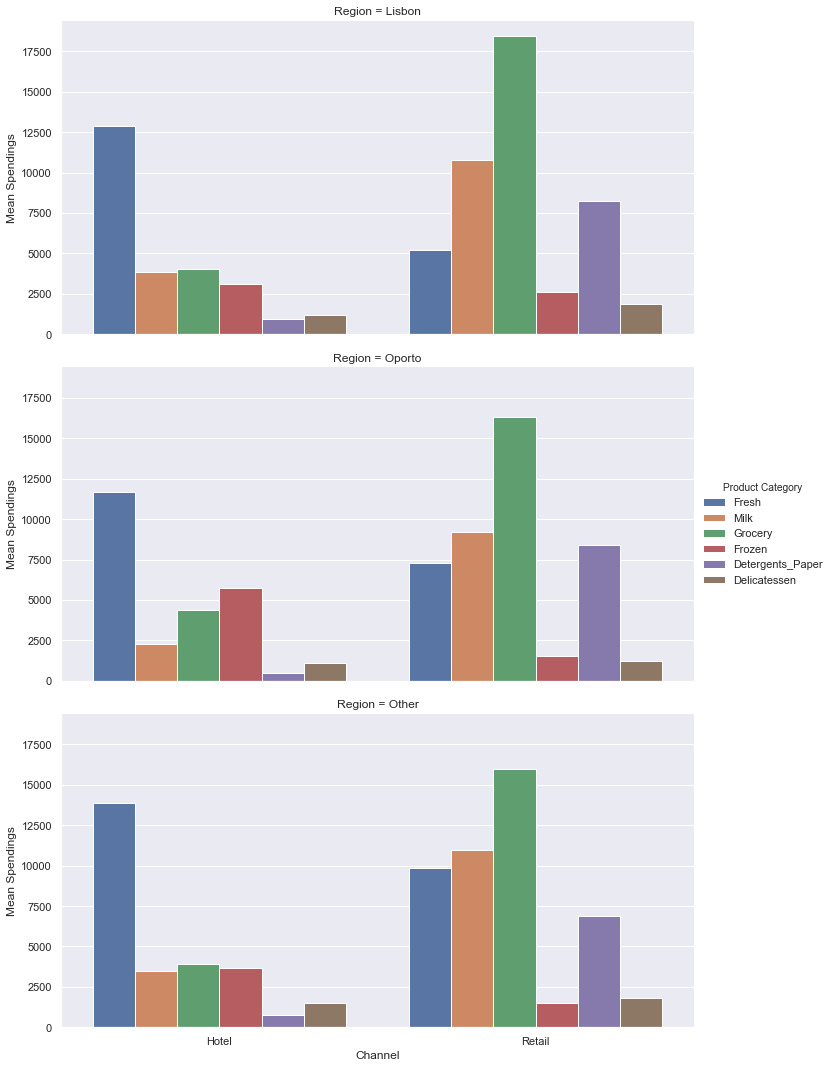

In [311]:
# hue = product, x = channel, row = region
temp_mean = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).mean().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Mean Spendings'})
sns.catplot(data = temp_mean, y = 'Mean Spendings', x = 'Channel' , hue ='Product Category', row = 'Region', kind ='bar',aspect=2, height =5)
printmd('**Mean spendings for all the product categories through the two channels individually in each of the three regions :**')

**Mean spendings for all the product categories through the two channels individually in each of the three regions :**

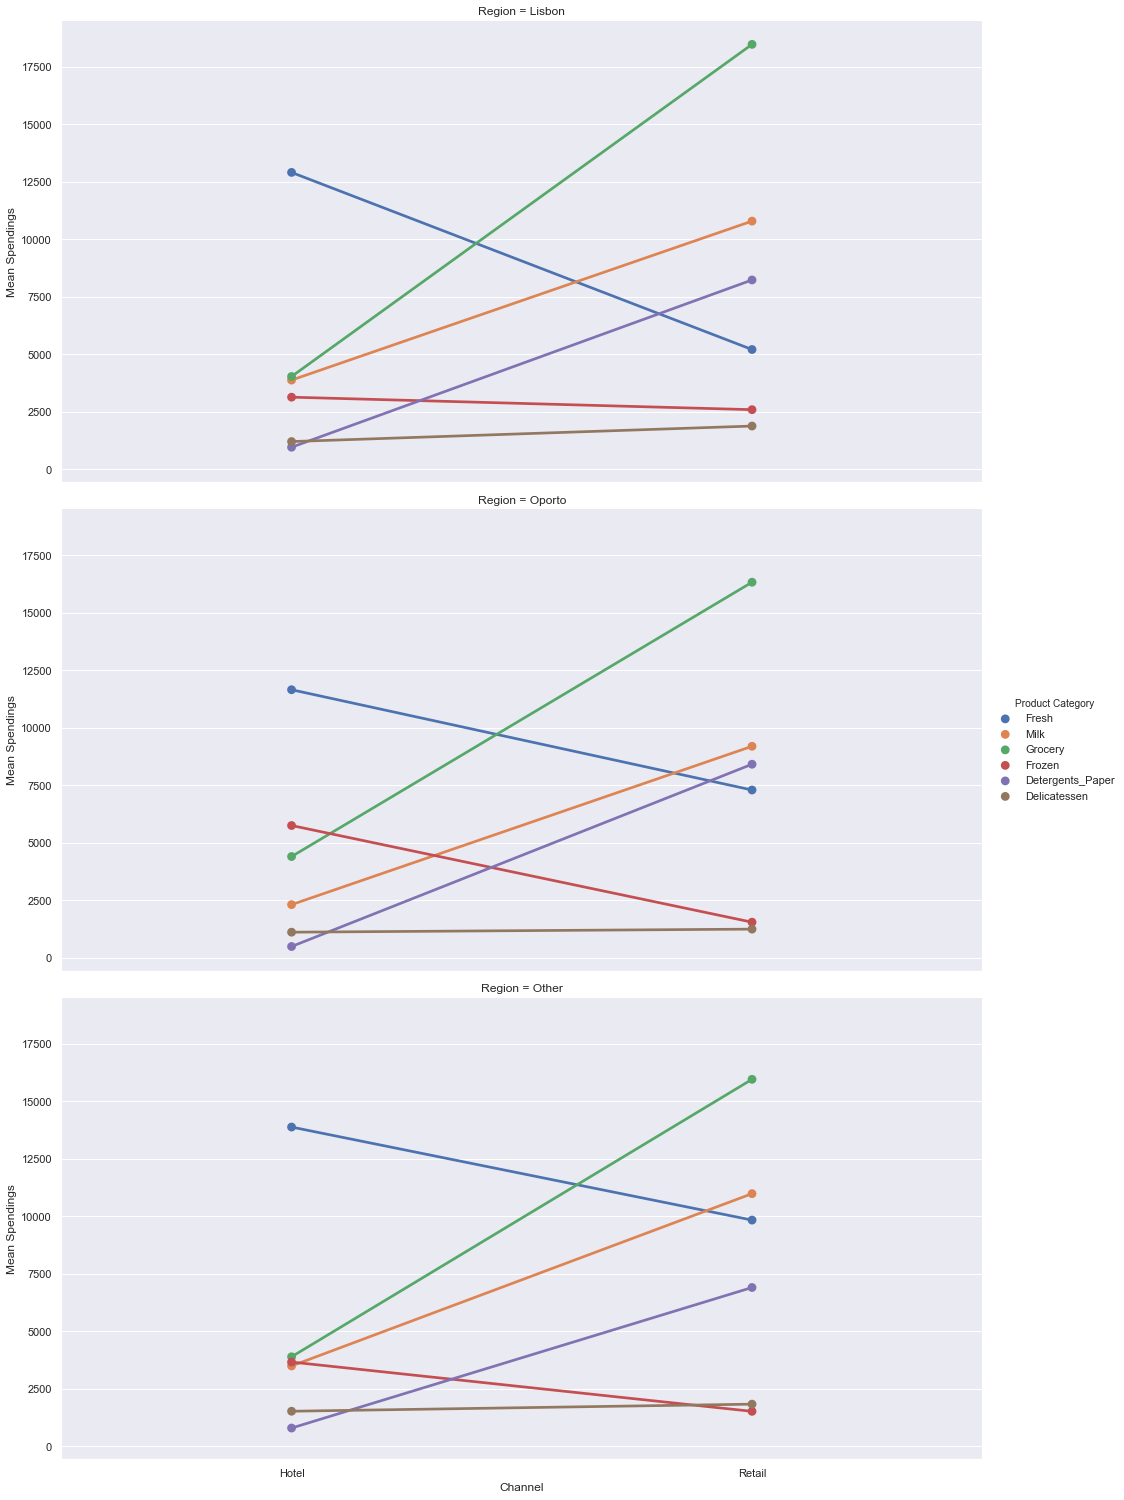

In [312]:
# hue = product, x = channel, row = region
temp_mean = wholesale.drop('Buyer/Spender', axis =1).groupby(['Channel','Region']).mean().unstack().unstack().reset_index().rename(columns = {'level_0':'Product Category', 0: 'Mean Spendings'})
printmd('**Mean spendings for all the product categories through the two channels individually in each of the three regions :**')
sns.catplot(data = temp_mean, y = 'Mean Spendings', x = 'Channel' , hue ='Product Category', row = 'Region', kind ='point',aspect=2, height =7)

## Inferences:
- We can observe the trends in mean spendings for the product categories across 'Hotel' and 'Retail' Channel in each of the three regions as follows:
    - In all the regions 'Lisbon', 'Oporto' and 'Other', no particular trend in mean spendings is observed among the product categories across the two channels.

## On the basis of the descriptive measure of variability observing the items with most and least inconsistent behaviour:
### We use 'Coefficient of Variation' as the descriptive measure of variability.
- **Reason for using the metric :** The coefficient of Variation, which shows the extent of variability of data in a sample in relation to the mean of the sample is the standard method to compare the variability of two or more samples. **Standard Deviation or Variance of different samples provide absolute values which depend on the scale of data and does not give a Normalised value. Hence the comparision of variability of two or more samples using these metrics is flawed. So we go for Coefficient of Variation to compare the variability.**

In [313]:
printmd('**Coefficient of Variation for the differnt product categories:**')
temp=[]
for i in wholesale_description.index:
    temp.append(wholesale_description.loc[i,'std']/wholesale_description.loc[i,'mean'])
coefficient_of_variation = pd.DataFrame(wholesale_description.index, columns=['Products'])
coefficient_of_variation['Coefficient of Variation'] = temp
round(coefficient_of_variation.sort_values('Coefficient of Variation',ascending = False),3)

**Coefficient of Variation for the differnt product categories:**

,Products,Coefficient of Variation
5,Delicatessen,1.849
4,Detergents_Paper,1.655
3,Frozen,1.580
2,Milk,1.273
1,Grocery,1.195
0,Fresh,1.054


## Inferences:
1. The coefficient of variation for 'Delicatessen' is 1.849, which is the maximum , hence it shows the most inconsistent behaviour among all types of products  from retailers' spendings point of view. It means there is 184.9% variation in retailers'spendings for the product category 'Delicatessen'
2. The coefficient of variation for 'Fresh' is 1.054, which is the minimum , hence it shows the least inconsistent behaviour among all types of products from retailers' spendings point of view. It means there is 105.4% variation in retailers' spendings for the product category 'Fresh'.

## Outliers:
- Assumption:
    - While calculating the outliers it is assumed that the data we have follows a Normal Distribution. In case it is not a Normal Distribution then outliers are in fact not outliers but part of the data.

## Histograms and Skewness Calculation:

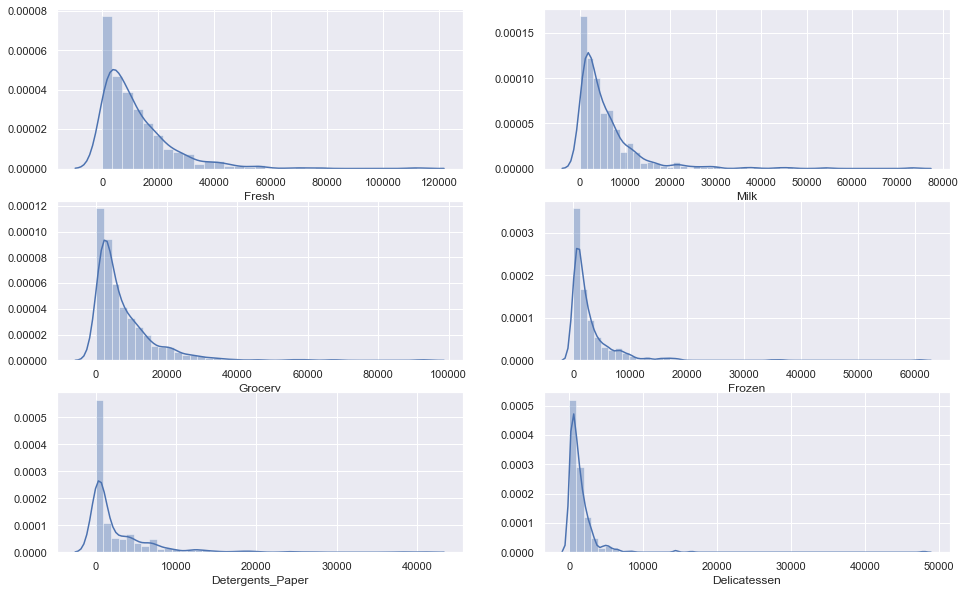

In [314]:
column_names = np.array(wholesale.columns.tolist())
plt.figure(figsize=(16,10))
for i in range(3,9):
    plt.subplot(3,2,i-2)
    sns.distplot(wholesale[column_names[i]])

In [315]:
wholesale.drop(['Buyer/Spender'],axis =1).skew().sort_values(ascending = False)

Delicatessen        11.151586
Frozen               5.907986
Milk                 4.053755
Detergents_Paper     3.631851
Grocery              3.587429
Fresh                2.561323
dtype: float64

## Inferences:
1. We can observe that the histogram of spendings of all product categories look right skewed to different extents.
2. The skewness values support the visual analysis. As the spendings of all the product categories have a skewness value greater than 1, it suggests right skewness. The 'Delicatessen' product type shows the maximum skewness and 'Fresh' product type shows the minimum skewness. We may expect outliers on the upper side from all these product categories.
3. **The reason for such right skewness may be inferred to be higher spendings by certain retailers compared to the spendings by most of the other retailers.**

# Calculation of Outliers

##  Using the Inter Quartile Range (IQR) Method to observe the Outliers for the product spendings
1. **It is to be noted that this method is based on the position of data points.**

##  Boxplots

**Boxplot for the product categories :**

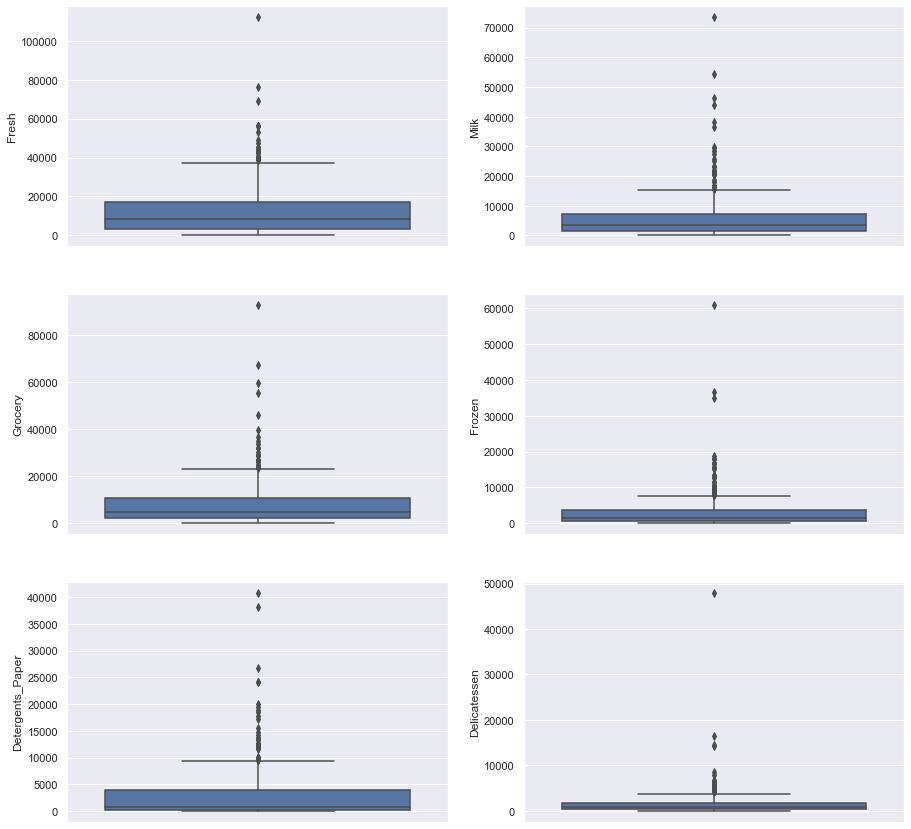

In [316]:
column_names = np.array(wholesale.columns.tolist())
plt.figure(figsize=(15,15))
for i in range(3,9):
    plt.subplot(3,2,i-2)
    sns.boxplot(y = wholesale[column_names[i]])
printmd('**Boxplot for the product categories :**')

## Inference:
1. From the boxplots it is observed that all the spendings of all the six product categories contain outliers and look skewed to the right.
2. **It is observed that among the outliers in the boxplot of all the categories there is at least one retailer who has very high spendings even compared to other retailers who are outliers.** 

### Observing if the outlier is a particular retailer always:

In [317]:
for i in wholesale.columns[3:]:
    print('The retailer with highest spending in ' + str(i) + ' category is : ' + 
          str(wholesale[wholesale[i] == wholesale[i].max()]['Buyer/Spender'].values.item()) )

The retailer with highest spending in Fresh category is : 182
The retailer with highest spending in Milk category is : 87
The retailer with highest spending in Grocery category is : 86
The retailer with highest spending in Frozen category is : 326
The retailer with highest spending in Detergents_Paper category is : 86
The retailer with highest spending in Delicatessen category is : 184


## Inference:
1. All the retailers with highest spendings in each category is found and it is observed that for 'Grocery' and 'Detergents_Paper' we have the same retailer with Id '86' with the maximum spendings. For all other categories the retailer with highest spendings is different.

## Outlier Counts and Percentage Counts

In [318]:
Lower_outlier = []
Upper_outlier = []
for i in range(3,9):
    Q1 = wholesale[column_names[i]].quantile(0.25)
    Q3 = wholesale[column_names[i]].quantile(0.75)
    IQR = Q3 - Q1
    Lower_outlier.append(wholesale[wholesale[column_names[i]] < (Q1 - 1.5*IQR)].count()[0])
    Upper_outlier.append(wholesale[wholesale[column_names[i]] > (Q3 + 1.5*IQR)].count()[0])

outliers = pd.DataFrame(data = Lower_outlier, columns =['Lower Outliers Count'], index = column_names[3:])
outliers['Lower Outliers Percentage'] = outliers['Lower Outliers Count'].apply(lambda x: x*100/440)
outliers['Upper Outliers Count'] = Upper_outlier
outliers['Upper outliers Percentage'] = round(outliers['Upper Outliers Count'].apply(lambda x: x*100/440),2)
printmd('**Outliers using IQR :**')
outliers.sort_values(by = 'Upper outliers Percentage', ascending = False)

**Outliers using IQR :**

,Lower Outliers Count,Lower Outliers Percentage,Upper Outliers Count,Upper outliers Percentage
Frozen,0,0.0,43,9.77
Detergents_Paper,0,0.0,30,6.82
Milk,0,0.0,28,6.36
Delicatessen,0,0.0,27,6.14
Grocery,0,0.0,24,5.45
Fresh,0,0.0,20,4.55


## Inference:
### Calculated according to Inter Quartile Range:
- For all product types there are no outliers present on the lower spendings side, they are only present on the higher spendings side. 
- The highest number of outliers are present in 'Frozen' product category and the lowest number of outliers are present in 'Fresh' product category.
- Although 'Delicatessen' has a much higher skewness than any other product categories, the number of outliers is lesser than others, this suggestive of a long thin right tail in the probability distribution of 'Delicatessen', which can be observed in the histogram as well. **This leads to the inference that 'Delicatessen' category has certain retailers who have considerably higher spendings in it than most of the other retailers.** 

##  Using the  Z Score Method to find outliers.
1. **It is to be noted that this method is dependent on the mean and standard deviation.**
2. **We consider  + 3 SD and -3 SD as the cut off  for calculating outliers.**

In [319]:
temp_less = []
temp_greater = []
temp = [] 
z_score_df = pd.DataFrame(np.arange(len(wholesale)), columns= ['Temp'])
for i in wholesale.columns[3:]:
    for j in range(len(wholesale)):
        z = (wholesale[i][j] - np.mean(wholesale[i])) / np.std(wholesale[i])
        temp.append(z)
    z_score_df[i] = temp
    temp = []
z_score_df.drop('Temp', axis=1, inplace =True)
for i in z_score_df:
    temp_less.append(z_score_df[ (z_score_df[i] <= -3)][i].count())
    temp_greater.append(z_score_df[ (z_score_df[i] >= 3)][i].count())
z_score_count = pd.DataFrame(temp_less, columns= ['Lower Outlier Count'],  index = z_score_df.columns)
z_score_count['Higher Outlier Count'] = temp_greater
printmd('**Outliers using Z scores :**')
z_score_count.sort_values('Higher Outlier Count', ascending = False)

**Outliers using Z scores :**

,Lower Outlier Count,Higher Outlier Count
Detergents_Paper,0,10
Milk,0,9
Fresh,0,7
Grocery,0,7
Frozen,0,6
Delicatessen,0,4


## Inference:
1. We can observe that that there are no lower outliers, this is consistent with all our previous observation of outliers.
2. For the Higher oulier count, here we observe that it is highest for 'Detergents_Paper' and lowest for 'Delicatessen' product category.

# Recommendations based on the EDA:
- All the products look right skewed, which suggests that there are certain Retailers who earn much more than the average earning retailers.
- Although there are higher number of Retailers doing business through ‘Hotel’ nearly 67.8% of total, the average spendings of Retailers doing business through ‘Retail’ is 173.67% of that of Retailers doing business through ‘Hotel’.
- For ‘Hotel’ channel, the mean spendings for ‘Fresh’ product is considerably higher for all the regions as compared to other products.
- For ‘Retail’ Channel, ‘Grocery’ product is the least inconsistent product as well as has the highest mean and total spendings. 
- For ‘Retail’ Channel, ‘Milk’, ‘Grocery’ and ‘Detergents_Paper’ have considerably high mean spendings in all the three regions as compared to ‘Hotel’ Channel.
- For ‘Oporto’ and ‘Other’ region, ‘Fresh’ has the maximum Total and mean spendings and it is also the least inconsistent product in these regions.

# Problem 2- University Survey:

## The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey.csv file).
### Part I
- 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)
    - 2.1.1. Gender and Major
    - 2.1.2. Gender and Grad Intention
    - 2.1.3. Gender and Employment
    - 2.1.4. Gender and Computer
- 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:
    - 2.2.1. What is the probability that a randomly selected CMSU student will be male?
         - What is the probability that a randomly selected CMSU student will be female?

    - 2.2.2. Find the conditional probability of different majors among the male students in CMSU.
        - Find the conditional probability of different majors among the female students of CMSU.

    - 2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.
        - Find the conditional probability of intent to graduate, given that the student is a female.

    - 2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

    - 2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.
- 2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender? Justify your comment in each case.

### Part II
- 2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
    - Write a note summarizing your conclusions.
    - [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]

## Data Ingestion:

In [3]:
survey = pd.read_csv('University_Survey.csv')

In [4]:
printmd('**Information about the Dataset:**')
survey.info()

**Information about the Dataset:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
ID                   62 non-null int64
Gender               62 non-null object
Age                  62 non-null int64
Class                62 non-null object
Major                62 non-null object
Grad Intention       62 non-null object
GPA                  62 non-null float64
Employment           62 non-null object
Salary               62 non-null float64
Social Networking    62 non-null int64
Satisfaction         62 non-null int64
Spending             62 non-null int64
Computer             62 non-null object
Text Messages        62 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


## Inference:
- There are no null values and 62 rows of data with default index.
- There are 14 variables:
    - 6 are object type
    - 6 are integer type(int64)
    - 2 are float type

In [322]:
survey.sample(5)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
26,27,Male,20,Junior,Economics/Finance,Yes,3.1,Full-Time,65.0,1,5,375,Laptop,300
32,33,Male,20,Junior,Accounting,Yes,3.6,Part-Time,35.0,1,4,200,Laptop,70
30,31,Male,20,Junior,Accounting,Undecided,3.4,Part-Time,55.0,2,3,500,Laptop,750
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
20,21,Female,22,Junior,Retailing/Marketing,Undecided,3.2,Part-Time,55.0,1,3,690,Laptop,50


In [323]:
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [324]:
survey.tail()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


# Dataset understanding
- The dataset is a Survey questionnaire, where each row corresponds to a student of Clear Mountain State University (CMSU).  
    - Each student is identified by an 'ID' variable. 
    - Each student is described by their 'Gender', 'Age', 'Class' and 'Major' columns. 
    - In the Survey the students are asked about their intention to pursue Graduation, which is provided in the 'Grad Intention' column. 
    - They are further enquired about their present GPA, given by the 'GPA' column. 
    - The students are asked about their employment status and salary, which are provided in the columns 'Employment' and 'Salary' respectively. 
    - 'Social Networking' column gives the number of social networking websites they are registered to/currently using. 
    - The satisfaction level in pursuing the course in CMSU is provided in 'Satisfaction' column. 
    - The estimated spending limit of the student for the month is provided in 'Spending' column. 
    - The kind of Computer a student desires or has is provided in the 'Computer' column. 
    - The 'Text Messages' column provides information the average/total message send by a student.

In [325]:
printmd('**Decription of the Object type Variables:**')
survey.describe(include = np.object).T

**Decription of the Object type Variables:**

,count,unique,top,freq
Gender,62,2,Female,33
Class,62,3,Senior,31
Major,62,8,Retailing/Marketing,14
Grad Intention,62,3,Yes,28
Employment,62,3,Part-Time,43
Computer,62,3,Laptop,55


In [326]:
for i in survey.describe(include = np.object).columns:
    with pd.option_context('expand_frame_repr', False):
        print('For ' + str(i) + ' unique values are : ')
        print(str(survey[i].unique()))
        print('')

For Gender unique values are : 
['Female' 'Male']

For Class unique values are : 
['Junior' 'Senior' 'Sophomore']

For Major unique values are : 
['Other' 'Management' 'CIS' 'Economics/Finance' 'Undecided'
 'International Business' 'Retailing/Marketing' 'Accounting']

For Grad Intention unique values are : 
['Yes' 'Undecided' 'No']

For Employment unique values are : 
['Full-Time' 'Part-Time' 'Unemployed']

For Computer unique values are : 
['Laptop' 'Tablet' 'Desktop']



In [327]:
for i in survey.describe(include = np.object).columns:
    with pd.option_context('expand_frame_repr', False):
        print('For ' + str(i) + ' number of unique values are : ') 
        print(str(survey[i].value_counts()))
        print('')

For Gender number of unique values are : 
Female    33
Male      29
Name: Gender, dtype: int64

For Class number of unique values are : 
Senior       31
Junior       25
Sophomore     6
Name: Class, dtype: int64

For Major number of unique values are : 
Retailing/Marketing       14
Economics/Finance         11
Management                10
Other                      7
Accounting                 7
International Business     6
CIS                        4
Undecided                  3
Name: Major, dtype: int64

For Grad Intention number of unique values are : 
Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

For Employment number of unique values are : 
Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

For Computer number of unique values are : 
Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64



In [328]:
printmd('**Description of all the Numerical Variables in the Dataset:**')
survey.describe().T

**Description of all the Numerical Variables in the Dataset:**

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


# PART I

# Question 2.1
- For this data, construct the following contingency tables (Keep Gender as row variable)
    - 2.1.1. Gender and Major
    - 2.1.2. Gender and Grad Intention
    - 2.1.3. Gender and Employment
    - 2.1.4. Gender and Computer

In [329]:
# Defining a function to call contingency tables
def contingency(index, columns):
    contingency_table = pd.crosstab(index = index, columns = columns)
    
    temp1 = []
    for i in contingency_table.T :
        temp1.append(contingency_table.T[i].sum())
    contingency_table['Total'] = temp1
    
    temp2 = []
    for i in contingency_table :
        temp2.append(contingency_table[i].sum())
    temp_df = pd.DataFrame(temp2, columns = ['Total'], index = contingency_table.columns).T
    
    contingency_table = contingency_table.append(temp_df)
    
    return(contingency_table)

In [330]:
printmd('**ANSWER 2.1.1  Contingency table for Gender and Major**')
contingency(survey.Gender, survey['Major'])

**ANSWER 2.1.1  Contingency table for Gender and Major**

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [331]:
printmd('**ANSWER 2.1.2  Contingency table for Gender and Grad Intention**')
contingency(survey.Gender, survey['Grad Intention'])

**ANSWER 2.1.2  Contingency table for Gender and Grad Intention**

Grad Intention,No,Undecided,Yes,Total
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [332]:
printmd('**ANSWER 2.1.3  Contingency table for Gender and Employment**')
contingency(survey.Gender, survey['Employment'])

**ANSWER 2.1.3  Contingency table for Gender and Employment**

Employment,Full-Time,Part-Time,Unemployed,Total
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [333]:
printmd('**ANSWER 2.1.4  Contingency table for Gender and Computer**')
contingency(survey.Gender, survey['Computer'])

**ANSWER 2.1.4  Contingency table for Gender and Computer**

Computer,Desktop,Laptop,Tablet,Total
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


# Question 2.2
- Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:
    - 2.2.1. What is the probability that a randomly selected CMSU student will be male?
         - What is the probability that a randomly selected CMSU student will be female?

    - 2.2.2. Find the conditional probability of different majors among the male students in CMSU.
        - Find the conditional probability of different majors among the female students of CMSU.

    - 2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.
        - Find the conditional probability of intent to graduate, given that the student is a female.

    - 2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

    - 2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.

# Answer 2.2.1

In [334]:
printmd('**ANSWER 2.2.1.(a) The probability that a randomly selected CMSU student will be male :**')
round(survey[survey['Gender'] == 'Male']['Gender'].count()/len(survey),4)

**ANSWER 2.2.1.(a) The probability that a randomly selected CMSU student will be male :**

0.4677

In [335]:
printmd('**ANSWER 2.2.1.(b) The probability that a randomly selected CMSU student will be female :**')
round(survey[survey['Gender'] == 'Female']['Gender'].count()/len(survey),4)

**ANSWER 2.2.1.(b) The probability that a randomly selected CMSU student will be female :**

0.5323

# Answer 2.2.2

In [336]:
printmd('**ANSWER 2.2.2.(a) The conditional probability of different majors among the male students in CMSU are as follows**')
temp = contingency(survey.Gender, survey['Major'])
count = 1
for i in temp.columns:
    if count <= len(temp.columns)-1 :
        temp_value = round(temp.loc['Male',i]/temp.loc['Male','Total'],4)
        print('The conditional probability of \'' + str(i) + '\' among the male students in CMSU: ' + str(temp_value) )
    count = count + 1

**ANSWER 2.2.2.(a) The conditional probability of different majors among the male students in CMSU are as follows**

The conditional probability of 'Accounting' among the male students in CMSU: 0.1379
The conditional probability of 'CIS' among the male students in CMSU: 0.0345
The conditional probability of 'Economics/Finance' among the male students in CMSU: 0.1379
The conditional probability of 'International Business' among the male students in CMSU: 0.069
The conditional probability of 'Management' among the male students in CMSU: 0.2069
The conditional probability of 'Other' among the male students in CMSU: 0.1379
The conditional probability of 'Retailing/Marketing' among the male students in CMSU: 0.1724
The conditional probability of 'Undecided' among the male students in CMSU: 0.1034


In [337]:
printmd('**ANSWER 2.2.2.(b) The conditional probability of different majors among the female students in CMSU are as follows**')
temp = contingency(survey.Gender, survey['Major'])
count = 1
for i in temp.columns:
    if count <= len(temp.columns)-1 :
        temp_value = round(temp.loc['Female',i]/temp.loc['Female','Total'],4)
        print('The conditional probability of \'' + str(i) + '\' among the female students in CMSU: ' + str(temp_value) )
    count = count + 1

**ANSWER 2.2.2.(b) The conditional probability of different majors among the female students in CMSU are as follows**

The conditional probability of 'Accounting' among the female students in CMSU: 0.0909
The conditional probability of 'CIS' among the female students in CMSU: 0.0909
The conditional probability of 'Economics/Finance' among the female students in CMSU: 0.2121
The conditional probability of 'International Business' among the female students in CMSU: 0.1212
The conditional probability of 'Management' among the female students in CMSU: 0.1212
The conditional probability of 'Other' among the female students in CMSU: 0.0909
The conditional probability of 'Retailing/Marketing' among the female students in CMSU: 0.2727
The conditional probability of 'Undecided' among the female students in CMSU: 0.0



# Answer 2.2.3

In [338]:
printmd('**ANSWER 2.2.3.(a) The conditional probability of Grad Intention, given that the student is a male**')
temp = contingency(survey.Gender, survey['Grad Intention'])
count = 1
for i in temp.columns:
    if count <= len(temp.columns)-1 :
        temp_value = round(temp.loc['Male',i]/temp.loc['Male','Total'],4)
        print('The conditional probability of \'' + str(i) + '\' among the male students in CMSU: ' + str(temp_value) )
    count = count + 1

**ANSWER 2.2.3.(a) The conditional probability of Grad Intention, given that the student is a male**

The conditional probability of 'No' among the male students in CMSU: 0.1034
The conditional probability of 'Undecided' among the male students in CMSU: 0.3103
The conditional probability of 'Yes' among the male students in CMSU: 0.5862


In [339]:
printmd('**ANSWER 2.2.3.(b) The conditional probability of Grad Intention, given that the student is a female**')
temp = contingency(survey.Gender, survey['Grad Intention'])
count = 1
for i in temp.columns:
    if count <= len(temp.columns)-1 :
        temp_value = round(temp.loc['Female',i]/temp.loc['Female','Total'],4)
        print('The conditional probability of \'' + str(i) + '\' among the female students in CMSU: ' + str(temp_value) )
    count = count + 1

**ANSWER 2.2.3.(b) The conditional probability of Grad Intention, given that the student is a female**

The conditional probability of 'No' among the female students in CMSU: 0.2727
The conditional probability of 'Undecided' among the female students in CMSU: 0.3939
The conditional probability of 'Yes' among the female students in CMSU: 0.3333


# Answer 2.2.4

In [340]:
printmd('**ANSWER 2.2.4.(a) The conditional probability of employment status for the male students in CMSU are as follows**')
temp = contingency(survey.Gender, survey['Employment'])
count = 1
for i in temp.columns:
    if count <= len(temp.columns)-1 :
        temp_value = round(temp.loc['Male',i]/temp.loc['Male','Total'],4)
        print('The conditional probability of \'' + str(i) + '\' among the male students in CMSU: ' + str(temp_value) )
    count = count + 1

**ANSWER 2.2.4.(a) The conditional probability of employment status for the male students in CMSU are as follows**

The conditional probability of 'Full-Time' among the male students in CMSU: 0.2414
The conditional probability of 'Part-Time' among the male students in CMSU: 0.6552
The conditional probability of 'Unemployed' among the male students in CMSU: 0.1034


In [341]:
printmd('**ANSWER 2.2.4.(b) The conditional probability of employment status for the female students in CMSU are as follows**')
temp = contingency(survey.Gender, survey['Employment'])
count = 1
for i in temp.columns:
    if count <= len(temp.columns)-1 :
        temp_value = round(temp.loc['Female',i]/temp.loc['Female','Total'],4)
        print('The conditional probability of \'' + str(i) + '\' among the female students in CMSU: ' + str(temp_value) )
    count = count + 1

**ANSWER 2.2.4.(b) The conditional probability of employment status for the female students in CMSU are as follows**

The conditional probability of 'Full-Time' among the female students in CMSU: 0.0909
The conditional probability of 'Part-Time' among the female students in CMSU: 0.7273
The conditional probability of 'Unemployed' among the female students in CMSU: 0.1818


# Answer 2.2.5

In [342]:
printmd('**ANSWER 2.2.5.(a) The conditional probability of laptop preference for the male students in CMSU are as follows**')
temp = contingency(survey.Gender, survey['Computer'])
count = 1
for i in temp.columns:
    if count <= len(temp.columns)-1 :
        temp_value = round(temp.loc['Male',i]/temp.loc['Male','Total'],4)
        print('The conditional probability of \'' + str(i) + '\' among the male students in CMSU: ' + str(temp_value) )
    count = count + 1

**ANSWER 2.2.5.(a) The conditional probability of laptop preference for the male students in CMSU are as follows**

The conditional probability of 'Desktop' among the male students in CMSU: 0.1034
The conditional probability of 'Laptop' among the male students in CMSU: 0.8966
The conditional probability of 'Tablet' among the male students in CMSU: 0.0


In [343]:
printmd('**ANSWER 2.2.5.(b) The conditional probability of employment status for the female students in CMSU are as follows**')
temp = contingency(survey.Gender, survey['Computer'])
count = 1
for i in temp.columns:
    if count <= len(temp.columns)-1 :
        temp_value = round(temp.loc['Female',i]/temp.loc['Female','Total'],4)
        print('The conditional probability of \'' + str(i) + '\' among the female students in CMSU: ' + str(temp_value) )
    count = count + 1

**ANSWER 2.2.5.(b) The conditional probability of employment status for the female students in CMSU are as follows**

The conditional probability of 'Desktop' among the female students in CMSU: 0.0606
The conditional probability of 'Laptop' among the female students in CMSU: 0.8788
The conditional probability of 'Tablet' among the female students in CMSU: 0.0606


# Question 2.3
- Based on the above probabilities, do you think that the column variable in each case is independent of Gender? 
    - Justify your comment in each case.

## Ways to check independency 
- Multiplication Rules
    - For indpendent events A and B: P(A and B) = P(A) * P(B)
    - For non independent events A and B: P(A and B) = P(A) * P(B|A)
    - **Thus for independent events  P(B|A) = P(B)**
- For example in our case if we want to check dependency of 'Female' Gender and  'CIS' Major
    - They are independent events if **P(CIS|Female) = P(CIS)**
    - While checking these values for all the given conditions, **but we need to consider precision while comparing the probabilities. So let us compare probabilities upto 2 decimal places.**
- We can also observe the trend in male, female and overall via line charts.

Table 2.3.1 : To compare the probability of different Major given male or female:

                        Female  Male  Overall  Abs Diff Female & Overall  Abs Diff Male & Overall
Major                                                                                            
Accounting                0.09  0.14     0.11                       0.02                     0.03
CIS                       0.09  0.03     0.06                       0.03                     0.03
Economics/Finance         0.21  0.14     0.18                       0.03                     0.04
International Business    0.12  0.07     0.10                       0.02                     0.03
Management                0.12  0.21     0.16                       0.04                     0.05
Other                     0.09  0.14     0.11                       0.02                     0.03
Retailing/Marketing       0.27  0.17     0.23                       0.04                     0.06
Undecided                 0.00  0.1

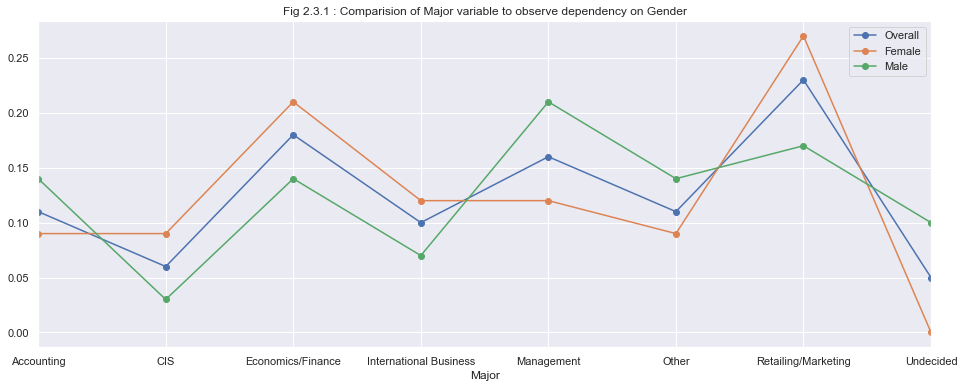

Table 2.3.2 : To compare the probability of different Grad Intention given male or female:

                Female  Male  Overall  Abs Diff Female & Overall  Abs Diff Male & Overall
Grad Intention                                                                           
No                0.27  0.10     0.19                       0.08                     0.09
Undecided         0.39  0.31     0.35                       0.04                     0.04
Yes               0.33  0.59     0.45                       0.12                     0.14



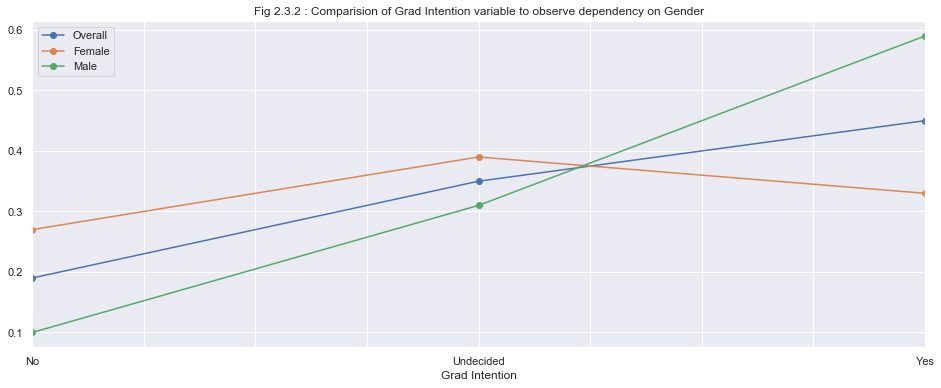

Table 2.3.3 : To compare the probability of different Employment given male or female:

            Female  Male  Overall  Abs Diff Female & Overall  Abs Diff Male & Overall
Employment                                                                           
Full-Time     0.09  0.24     0.16                       0.07                     0.08
Part-Time     0.73  0.66     0.69                       0.04                     0.03
Unemployed    0.18  0.10     0.15                       0.03                     0.05



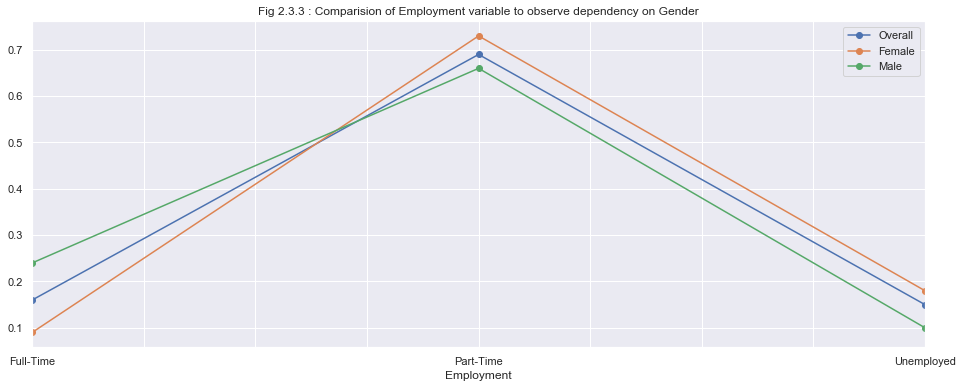

Table 2.3.4 : To compare the probability of different Computer given male or female:

          Female  Male  Overall  Abs Diff Female & Overall  Abs Diff Male & Overall
Computer                                                                           
Desktop     0.06   0.1     0.08                       0.02                     0.02
Laptop      0.88   0.9     0.89                       0.01                     0.01
Tablet      0.06   0.0     0.03                       0.03                     0.03



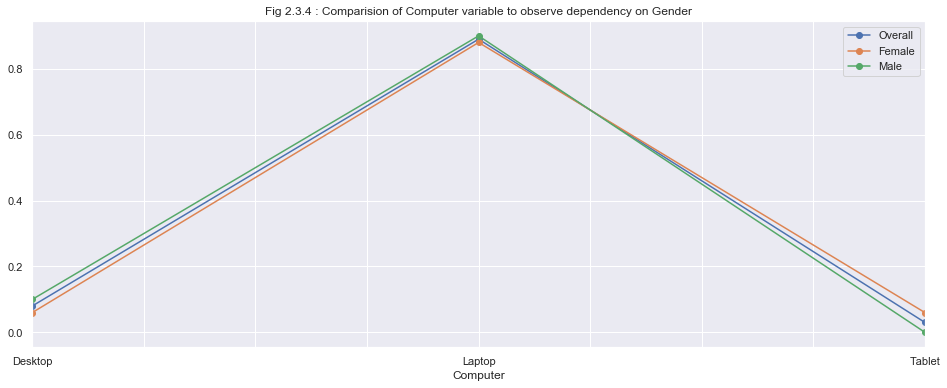

In [344]:
sample_variables = ['Major', 'Grad Intention', 'Employment', 'Computer']
count_print = 0
for j in sample_variables:
    temp = contingency(survey.Gender, survey[j])
    count_print = count_print + 1
    count = 1
    temp_list_male = []
    temp_list_female = []
    temp_list_overall = []
    for i in temp.columns:
        if count <= len(temp.columns)-1 :
            
            temp_list_male.append(round(temp.loc['Male',i]/temp.loc['Male','Total'],2))
        
        if count <= len(temp.columns)-1 :
            
            temp_list_female.append(round(temp.loc['Female',i]/temp.loc['Female','Total'],2))
        
        if count <= len(temp.columns)-1 :
            
            temp_list_overall.append(round( (temp.loc['Female',i] + temp.loc['Male',i]) / temp.loc['Total','Total'] , 2))
        
        count = count + 1 
    
    compare_prob_df = pd.DataFrame(temp_list_female, columns=['Female'], index = temp.columns[:-1])
    compare_prob_df['Male'] = temp_list_male
    compare_prob_df['Overall'] = temp_list_overall
    compare_prob_df['Abs Diff Female & Overall'] = abs(np.array(temp_list_overall) - np.array(temp_list_female))
    compare_prob_df['Abs Diff Male & Overall'] = abs(np.array(temp_list_overall) - np.array(temp_list_male))
    compare_prob_plot_df = compare_prob_df.copy()
    compare_prob_plot_df.reset_index(inplace=True)
    plt.show()
    compare_prob_plot_df.plot(x = j , y =['Overall','Female','Male'], figsize=(16,6), marker='o')
    plt.title('Fig 2.3.' + str(count_print) + ' : ' +'Comparision of ' + str(j) + ' variable to observe dependency on Gender')
    with pd.option_context('expand_frame_repr', False):
        print('Table 2.3.' + str(count_print)  +' : To compare the probability of different ' + str(j) +' given male or female:')
        print('')
        print(compare_prob_df)
        print('')

## Decreasing the Precision to one decimal place and checking independency:

Table 2.3.1 : To compare the probability of different Major given male or female:

                        Female  Male  Overall  Abs Diff Female & Overall  Abs Diff Male & Overall
Major                                                                                            
Accounting                 0.1   0.1      0.1                        0.0                      0.0
CIS                        0.1   0.0      0.1                        0.0                      0.1
Economics/Finance          0.2   0.1      0.2                        0.0                      0.1
International Business     0.1   0.1      0.1                        0.0                      0.0
Management                 0.1   0.2      0.2                        0.1                      0.0
Other                      0.1   0.1      0.1                        0.0                      0.0
Retailing/Marketing        0.3   0.2      0.2                        0.1                      0.0
Undecided                  0.0   0.

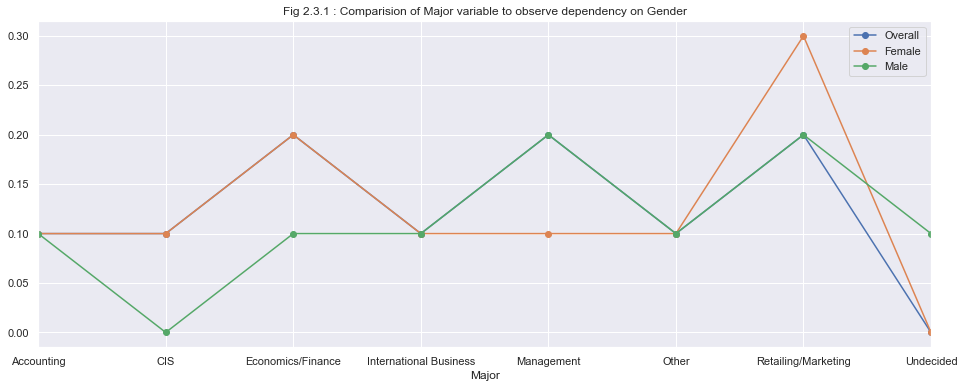

Table 2.3.2 : To compare the probability of different Grad Intention given male or female:

                Female  Male  Overall  Abs Diff Female & Overall  Abs Diff Male & Overall
Grad Intention                                                                           
No                 0.3   0.1      0.2                        0.1                      0.1
Undecided          0.4   0.3      0.4                        0.0                      0.1
Yes                0.3   0.6      0.5                        0.2                      0.1



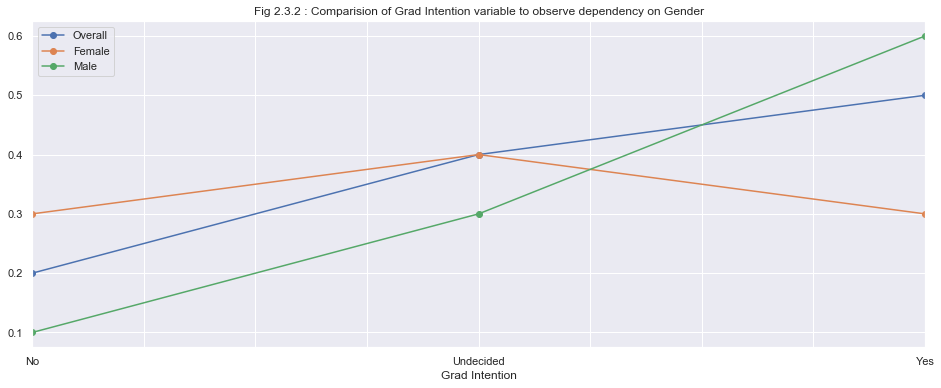

Table 2.3.3 : To compare the probability of different Employment given male or female:

            Female  Male  Overall  Abs Diff Female & Overall  Abs Diff Male & Overall
Employment                                                                           
Full-Time      0.1   0.2      0.2                        0.1                      0.0
Part-Time      0.7   0.7      0.7                        0.0                      0.0
Unemployed     0.2   0.1      0.1                        0.1                      0.0



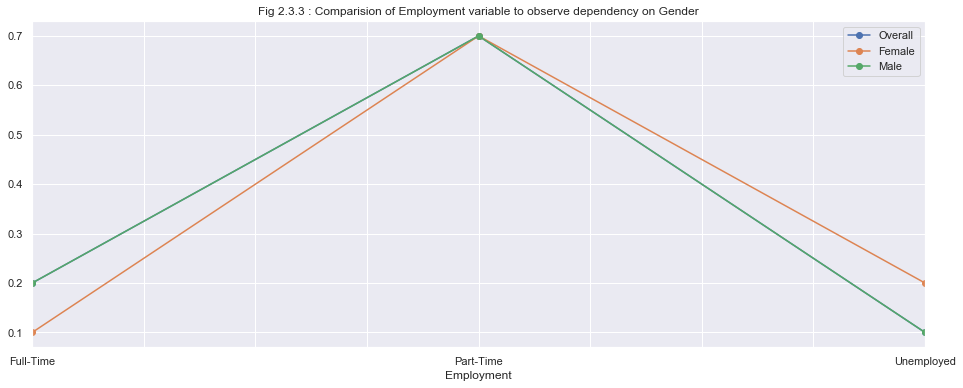

Table 2.3.4 : To compare the probability of different Computer given male or female:

          Female  Male  Overall  Abs Diff Female & Overall  Abs Diff Male & Overall
Computer                                                                           
Desktop      0.1   0.1      0.1                        0.0                      0.0
Laptop       0.9   0.9      0.9                        0.0                      0.0
Tablet       0.1   0.0      0.0                        0.1                      0.0



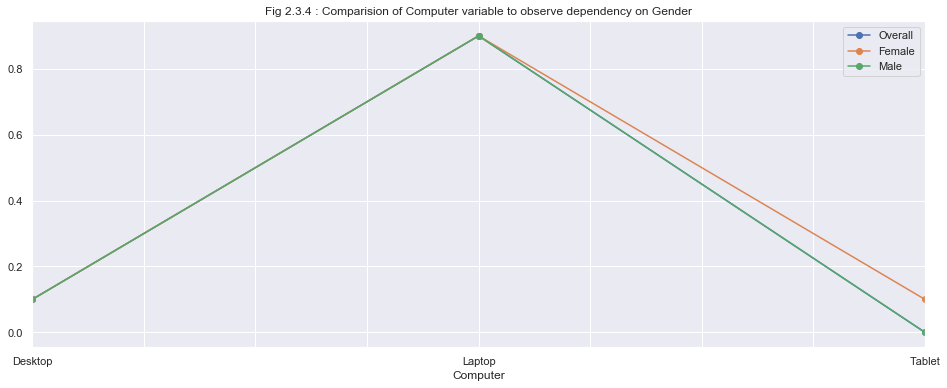

In [345]:
sample_variables = ['Major', 'Grad Intention', 'Employment', 'Computer']
count_print = 0
for j in sample_variables:
    temp = contingency(survey.Gender, survey[j])
    count_print = count_print + 1
    count = 1
    temp_list_male = []
    temp_list_female = []
    temp_list_overall = []
    for i in temp.columns:
        if count <= len(temp.columns)-1 :
            
            temp_list_male.append(round(temp.loc['Male',i]/temp.loc['Male','Total'],1))
        
        if count <= len(temp.columns)-1 :
            
            temp_list_female.append(round(temp.loc['Female',i]/temp.loc['Female','Total'],1))
        
        if count <= len(temp.columns)-1 :
            
            temp_list_overall.append(round( (temp.loc['Female',i] + temp.loc['Male',i]) / temp.loc['Total','Total'] , 1))
        
        count = count + 1 
    
    compare_prob_df = pd.DataFrame(temp_list_female, columns=['Female'], index = temp.columns[:-1])
    compare_prob_df['Male'] = temp_list_male
    compare_prob_df['Overall'] = temp_list_overall
    compare_prob_df['Abs Diff Female & Overall'] = abs(np.array(temp_list_overall) - np.array(temp_list_female))
    compare_prob_df['Abs Diff Male & Overall'] = abs(np.array(temp_list_overall) - np.array(temp_list_male))
    compare_prob_plot_df = compare_prob_df.copy()
    compare_prob_plot_df.reset_index(inplace=True)
    plt.show()
    compare_prob_plot_df.plot(x = j , y =['Overall','Female','Male'], figsize=(16,6), marker='o')
    plt.title('Fig 2.3.' + str(count_print) + ' : ' +'Comparision of ' + str(j) + ' variable to observe dependency on Gender')
    with pd.option_context('expand_frame_repr', False):
        print('Table 2.3.' + str(count_print)  +' : To compare the probability of different ' + str(j) +' given male or female:')
        print('')
        print(compare_prob_df)
        print('')

# Answer 2.3
- To answer this question we need to observe first if there is an equal level of representation of female and male in the dataset. As the number of females surveyed is 33 and the number of males surveyed is 29, may be considered to be an equal representation, we can go forward with the analysis.
- **For a column variable to be independent of Gender the probabilities for each category in the the column variable when the gender is not considered must follow a similar trend as the probabilities for each category in the the column variable for a given gender.**    
- **Assumption :** To observe the difference in probabilities, we consider precision of two decimal places.
- **Based on the above probabilities, the dependency of each column variable on Gender is discussed below:**
    1. **'Major' variable :** For all the different categories of 'Major', there is difference in probabilities calculated when gender is not specified and when gender is specified (male or female). Thus it may be concluded that the **'Major' column variable is dependent on 'Gender'.**  The plot shown in Fig 2.3.1 also shows that the probabilities of different categories of 'Major' for gender neutral(overall), male and female do not have same values.
    2. **'Grad Intention' variable :**  For all the different categories of 'Grad Intention', there is difference in probabilities calculated when gender is not specified and when gender is specified (male or female). Thus it may be concluded that the **'Grad Intention' column variable is dependent on 'Gender'.**  The plot shown in Fig 2.3.2 also shows that the probabilities of different categories of 'Grad Intention' for gender neutral(overall), male and female do not have same values.
    3. **'Employment' variable :**  For all the different categories of 'Employment', there is difference in probabilities calculated when gender is not specified and when gender is specified (male or female). Thus it may be concluded that the **'Employment' column variable is dependent on 'Gender'.**  The plot shown in Fig 2.3.3 also shows that the probabilities of different categories of 'Employment' for gender neutral(overall), male and female do not have same values.
    4. **'Computer' variable :**  For all the different categories of 'Computer', there is difference in probabilities calculated when gender is not specified and when gender is specified (male or female). Thus it may be concluded that the **'Computer' column variable is dependent on 'Gender'.**  The plot shown in Fig 2.3.4 also shows that the probabilities of different categories of 'Computer' for gender neutral(overall), male and female do not have same values.
- **NOTE :** Even when the precison is decreased to one decimal place then also for all column variables it is observed that there is some dependency on gender(either for male or female).
- **Therefore, based on the above inferences we can conclude that the gender of a student and outcome of the column intervals : 'Major', 'Grad Intention', 'Employment' and 'Computer' are dependent events.**

# PART II

# Question 2.4
- Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
    - Write a note summarizing your conclusions.
    - [Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]

## Numerical Analysis
- **We will perform Shapiro-Wilk test to check Normality of the underlying population for the given samples (our level of significance to take the decision will be 5%)**  
- **We will calculate skewness**

In [346]:

for i in [ 'Salary' , 'Spending' , 'Text Messages']:
    t_stat,p_value = shapiro(survey[i])
    print('The Shapiro-Wilk Test for the sample ' + str(i) + ' gives a p value of ' + str(p_value))
    print('Skewness for ' + str(i) + ' is ' + str(stats.skew(survey[i])) )  
    print('')

The Shapiro-Wilk Test for the sample Salary gives a p value of 0.028000956401228905
Skewness for Salary is 0.5216766008645851

The Shapiro-Wilk Test for the sample Spending gives a p value of 1.6854661225806922e-05
Skewness for Spending is 1.5472850312929523

The Shapiro-Wilk Test for the sample Text Messages gives a p value of 4.324040673964191e-06
Skewness for Text Messages is 1.2642446834439687



## Inference:
1. **For the Shapiro-Wilk Test, the Null Hypothesis states that the sample comes from a normal distribution.** After performing the test we get the following results:
    - For 'Salary' the p value is 0.028 approximately which is less than 0.05 (i.e. p value < 0.05), hence we Reject the Null Hypothesis. **Thus the underlying population distribution of 'Salary' sample is inferred not to be Normally distributed according to Shapiro-Wilk Test.**
    - For 'Spending' the p value is 1.68 x 10^-5  approximately which is less than 0.05 (i.e. p value < 0.05), hence we Reject the Null Hypothesis. **Thus the underlying population distribution 'Spending' sample is inferred not to be Normally distributed according to Shapiro-Wilk Test.**
    - For 'Text Messages' the p value is 4.32 x 10^-6  approximately which is less than 0.05 (i.e. p value < 0.05), hence we Reject the Null Hypothesis. **Thus the underlying population distribution 'Text Messages' sample is inferred not to be Normally distributed according to Shapiro-Wilk Test.**
    - **Note :** The p value of 'Salary' sample is highest among the three which suggests that it is least deviated from Normality.
2. The Skewness values of the three column variables as follows:
    - Skewness for 'Salary' is 0.522 approximately, which suggests right skewness.
    - Skewness for 'Spending' is 1.547 approximately, which suggests right skewness.
    - Skewness for 'Text Messages' is 1.264 approximately, which suggests right skewness.

## Plots
### A randomly selected sample from a population which is Normally Distributed should show the following visualizations ideally: 

1. **Histogram :** A Histogram plot of a randomly selected sample from a population which is Normally Distributed should appear symmetric about the mean.It should be unimodal, with the mode, mean and median coinciding.  

2. **Quantile-Quantile plot :** A qqplot compares the sample data to a theoritically ideal normal distribution. A qqplot of a randomly selected sample from a population which is Normally Distributed should have the scatter plot which lie on a line with zero intercepts and slope of +1. And the scatter plot should concentrate near the centre of the line and the concentration should decrease as it moves towards to the two extremes of the line (as per the empirical rule of Normal distribution).

3. **Combination of Swarmplot and Boxplot :** The Boxplot shows the 5 summary points and the outliers (based on IQR) but it does not show the distribution of the data points in between these 5 summary points, so a swarmplot overlapped on the boxplot is used to plot the data points in between these 5 summary points. An ideal plot of a randomly selected sample from a population which is Normally Distributed should show a symmetrical boxplot along with the swarmplot showing the data points concentrated near the median and the number of data points should decrease as per the empirical rule of Normal distribution as they move towards the whiskers. 

#### These are ideal situations and exact visualizations from the samples are not expected but how much they match the ideal situations is to be observed.

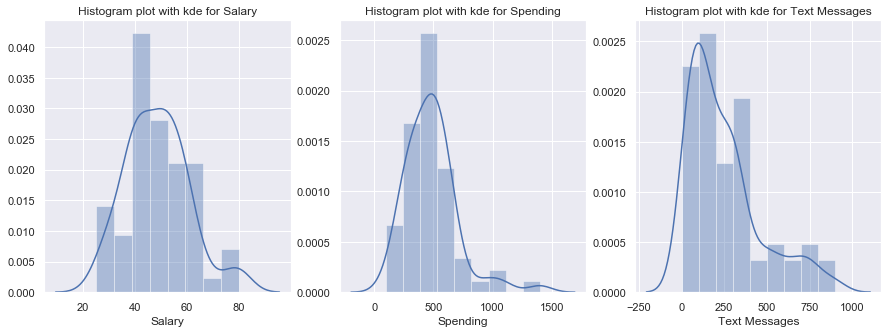

In [347]:
plt.figure(figsize=(15,5))
c=1
for i in [ 'Salary' , 'Spending' , 'Text Messages']:
    plt.subplot(1,3,c)
    sns.distplot(survey[i])
    plt.title('Histogram plot with kde for ' + str(i))
    c=c+1

<Figure size 1080x360 with 0 Axes>

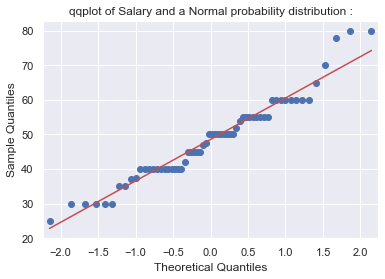

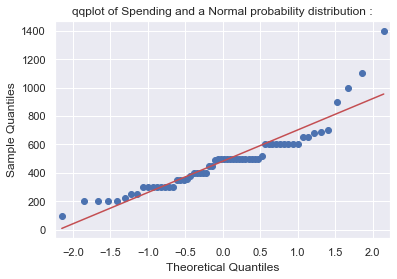

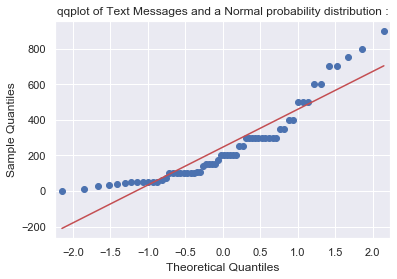

In [348]:
plt.figure(figsize=(15,5))
c=1
for i in [ 'Salary' , 'Spending' , 'Text Messages']:
#     plt.subplot(1,3,c)
    a = sm.qqplot(survey[i], line = 's')
    plt.title('qqplot of ' + str(i) + ' and a Normal probability distribution :')
    c=c+1

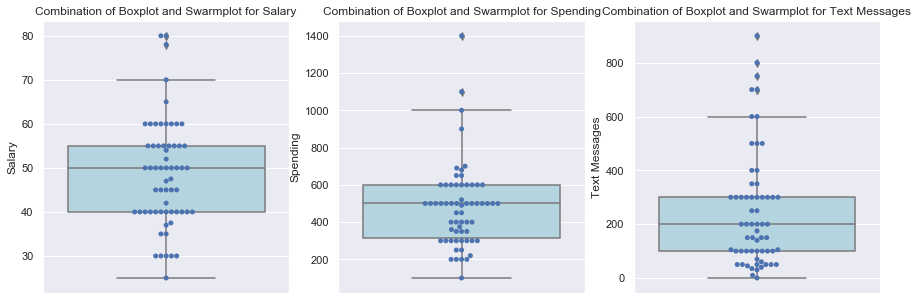

In [349]:
plt.figure(figsize=(15,5))
c=1
for i in [ 'Salary' , 'Spending' , 'Text Messages']:
    plt.subplot(1,3,c)
    sns.boxplot(y= survey[i],color = 'lightblue')
    sns.swarmplot(y= survey[i])
    plt.title('Combination of Boxplot and Swarmplot for ' + str(i) )
    c=c+1


## Inference:
1. **Histogram :** The Histogram with kde is observed for the three column variables:
    - The 'Salary' variable histogram plot although looks symmetrical shows two local peaks at extremes, which is not normal distribution. Thus we can say that the 'Salary' sample is not Normally distributed.
    - The 'Spending' variable histogram plot shows a long thin right tail, which suggests that it is right skewed and hence not Normally distributed.
    - The  'Text Messages'variable histogram plot shows a fat right tail, which suggests that it is right skewed and hence not Normally distributed.
2. **Quantile-Quantile plot :** The qqplot is observed for the three column variables:
    - The 'Salary' variable qqplot shows that the quantile cross-section points are not concentrated at the centre, hence it may be inferred that the sample is not Normally distributed.
    - The 'Spending' variable qqplot shows that the quantile cross-section points are not on the straight line, hence it may be inferred that the sample is not Normally distributed.
    - The  'Text Messages'variable qqplot shows that the quantile cross-section points are not on the straight line, hence it may be inferred that the sample is not Normally distributed.
3. **Combination of Boxplot and swarmplot :** 
    - The 'Salary' variable combination plot shows that the data points do not spread according to the empirical rule, there is higher concentration of data points on the lower quartile and also in the upper and lower whiskers, this is suggestive of multiple local peaks and hence we can say that the sample is not Normally distributed.
    - The 'Spending' variable combination plot shows the concentration of data points is more near the lower quartile and a longer upper whisker, hence it suggests  asymmetrical nature of data, thus we can infer that the sample is not Normally distributed.
    - The 'Text Messages'variable combination plot shows that the distribution of data points is not according to the empirical rule of Normal distribution, a longer upper whisker and higher concentration of data points near the lower quartile. All these suggest that the sample is not Normally distributed.

# Answer 2.4
- The three numerical (continuous) variables in the data set, 'Salary', 'Spending' and 'Text Messages' are studied by numerical and visual analysis and the following observations are be made about each one:
    1. **'Salary' :** The sample does not seem to be Normally distributed. The supporting points are as follows:
        - From the Shapiro-Wilk Test the p value calculated is 0.028 approximately which is less than our level of significance(0.05) and hence according to the test we infer that the underlying population distribution of the sample is not Normally distributed.
        - The skewness value is 0.522 approximately, which suggests right skewness.
        - Although Histogram looks symmetrical two local peaks are observed at the extremes.This suggests that the sample is not normally distributed.
        - In the qqplot, the quantile cross-section points are not concentrated at the centre, hence it suggests that the sample is not normally distributed. 
        - In the combination plot of boxplot and swarmplot, there is higher concentration of data points on the lower quartile and the data points are not spreaded according to the empirical rule. Hence it suggests that the sample is not normally distributed. 
    2. **'Spending' :** The sample does not seem to be Normally distributed. The supporting points are as follows:
        - From the Shapiro-Wilk Test the p value calculated is 1.68 x 10^-5 approximately which is less than our level of significance(0.05) and hence according to the test we infer that the underlying population distribution of the sample is not Normally distributed.
        - The skewness value is 1.547 approximately, which suggests right skewness.
        - The histogram plot shows a long thin right tail, this suggests right skewness and hence not normally distributed.
        - In the qqplot, the quantile cross-section points are not on the straight line, hence it suggests that the sample is not normally distributed. 
        - In the combination plot of boxplot and swarmplot, the concentration of data points is more near the lower quartile and a longer upper whisker. Hence it suggests that the sample is not normally distributed. 
    3. **'Text Messages' :** The sample does not seem to be Normally distributed. The supporting points are as follows:
        - From the Shapiro-Wilk Test the p value calculated is  4.32 x 10^-6  approximately which is less than our level of significance(0.05) and hence according to the test we infer that the underlying population distribution of the sample is not Normally distributed.
        - The skewness value is 1.264 approximately, which suggests right skewness.
        - The histogram plot shows a fat right tail, this suggests right skewness and hence not normally distributed.
        - In the qqplot, the quantile cross-section points are not on the straight line, hence it suggests that the sample is not normally distributed.
        - In the combination plot of boxplot and swarmplot, the distribution of data points is not according to the empirical rule of Normal distribution, a longer upper whisker and higher concentration of data points near the lower quartile. Hence it suggests that the sample is not normally distributed.

# Problem 3-  Manufacturers Data:
## An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company claims that the mean moisture content cannot be greater than 0.35 pound per 100 square feet. 

- The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

- 3.1. For the A shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

- 3.2. For the B shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

- 3.3. Do you think that the population means for shingles A and B are equal?
    - Form the hypothesis and conduct the test of the hypothesis.
    - What assumption do you need to check before the test for equality of means is performed?

- 3.4. What assumption about the population distribution is needed in order to conduct the hypothesis tests above?

## Data Ingestion:

In [7]:
shingles = pd.read_csv('A & B shingles.csv')

In [351]:
printmd('**Information about the Dataset:**')
shingles.info()

**Information about the Dataset:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
A    36 non-null float64
B    31 non-null float64
dtypes: float64(2)
memory usage: 704.0 bytes


## Inference:
- There are no null values for column 'A'. But there are 5 null values for column 'B'. The reason there are Null values in B is because the sample size for 'B' shingles  is 31 whereas for 'A' shingles the sample size is 36.
- Both the variables 'A' and 'B' are float type (float64).

In [352]:
shingles.sample(5)

,A,B
18,0.39,0.11
25,0.21,0.43
9,0.20,0.41
29,0.29,0.22
6,0.16,0.42


In [353]:
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [354]:
shingles.tail()

,A,B
31,0.40,NaN
32,0.29,NaN
33,0.43,NaN
34,0.34,NaN
35,0.37,NaN


# Dataset understanding
- The dataset contains sample of two types of Ashphalt shingles 'A' and 'B'. Sample 'A' has a sample size of 36 and Sample 'B' has a sample size of 31. Both the samples contain measurements of moisture content given in units 'pound per 100 square feet'

In [355]:
shingles.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


## Inference
- The Sample mean and sample standard deviation for Sample 'A' is 0.3167 and 0.1357.
- The Sample mean and sample standard deviation for Sample 'B' is 0.2735 and 0.1373.

# Question 3.1
- For the A shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

## Steps in Hypothesis Testing

## 1. Research Problem Definition:
- **For the A shingles, test whether the population mean moisture content is less than 0.35 pound per 100 square feet.**

## 2. Hypothesis Formulation:
- **Since according to our research problem we want to prove that the population mean moisture content for A shingles is less than 0.35 pound per 100 square feet, this will become our Alternate Hypothesis. Thus our Alternate and Null Hypothesis for A Shingles are as follows:**
    - **Let µA be the expected population mean for A shingles.**
    - **Alternate Hypothesis Ha : µA < 0.35 pound per 100 square feet (i.e. the Alternate Hypothesis states that "the Population mean for type A shingles is less than 0.35 pound per 100 square feet" )**
    - **Null Hypothesis Ho: μA >= 0.35 pound per 100 square feet (i.e. the Null Hypothesis states that "the Population mean for type A shingles is greater than or equal to 0.35 pound per 100 square feet" )**

## 3. Appropriate Statistical Test and Assumptions associated with it:
- **In the given question it has been explicitly mentioned that "for the B shingles, test whether the population mean moisture content is less than 0.35 pound per 100 square feet" and so we will perform parametric tests as it can compare the mean. In nonparametric tests, the hypotheses are not about population parameters such as mean.** 
- Now we need to decide which parametric test to use, we choose either the single sample z test of mean or the single sample t test of mean. **Since the population variance is unknown we choose the single sample t test of mean as our statistical test.** 
- For using the t test for statistical inference, the following assumptions are made:
    1. **The dependent variable should be measured on a continuous scale (interval or ratio data).**
    2. **The observations in the sample are independent of one another, i.e. sample is a simple random sample from its population.**
    3. **The dependent variable should be approximately normally distributed.** 
    4. **The sample data does not contain any significant outliers.**
- **Note :** Later on we will validate the assumptions.

## 4. Decision Rule:
- **Assuming the level of significance to be 0.05 we will make our decisions as follows:**
    - **p_value < 0.05 : Reject the Null Hypothesis**
    - **p_value >= 0.05 :  Fail to Reject the Null Hypothesis**

## 5. Test

In [356]:
t_stat, p_value = ttest_1samp(shingles.A, 0.35)
print('t statistic is ' + str(t_stat) + ' and the two-tailed p value is ' + str(p_value) )
printmd('**This is a left tailed test and as the t statistic is negative hence p value is half of the two-sided p value calculated using \'ttest_1samp\' above.**')
print('Thus the p value is', p_value/2)

t statistic is -1.4735046253382782 and the two-tailed p value is 0.14955266289815025


**This is a left tailed test and as the t statistic is negative hence p value is half of the two-sided p value calculated using 'ttest_1samp' above.**

Thus the p value is 0.07477633144907513


## 6. Inference from the test:
- **As the calculated p value of approximately  0.0748 is greater than 0.05 (set level of significance), we 'Fail to Reject' the Null Hypothesis.**
- This means from the type A shingles sample we **do not have enough statistically significant evidence to reject the Null Hypothesis.** 
- Thus we **cannot infer** from the type A shingles sample, that **the population mean moisture content is less than 0.35 pound per 100 square feet.**

# Question 3.2
- For the B shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

## Steps in Hypothesis Testing

## 1. Research Problem Definition:
- **For the B shingles, test whether the population mean moisture content is less than 0.35 pound per 100 square feet.**

## 2. Hypothesis Formulation:
- **Since according to our research problem we want to prove that the population mean moisture content for B shingles is less than 0.35 pound per 100 square feet, this will become our Alternate Hypothesis. Thus our Alternate and Null Hypothesis for B Shingles are as follows:**
    - **Let µB be the expected population mean for B shingles.**
    - **Alternate Hypothesis Ha : µB < 0.35 pound per 100 square feet (i.e. the Alternate Hypothesis states that "the Population mean for type B shingles is less than 0.35 pound per 100 square feet" )**
    - **Null Hypothesis Ho: μB >= 0.35 pound per 100 square feet (i.e. the Null Hypothesis states that "the Population mean for type B shingles is greater than or equal to 0.35 pound per 100 square feet" )**

## 3. Appropriate Statistical Test and Assumptions associated with it:
- **In the given question it has been explicitly mentioned that "for the B shingles, test whether the population mean moisture content is less than 0.35 pound per 100 square feet" and so we will perform parametric tests as it can compare the mean. In nonparametric tests, the hypotheses are not about population parameters such as mean.** 
- Now we need to decide which parametric test to use, we choose either the single sample z test of mean or the single sample t test of mean. **Since the population variance is unknown we choose the single sample t test of mean as our statistical test.** 
- For using the t test for statistical inference, the following assumptions are made:
    1. **The dependent variable should be measured on a continuous scale (interval or ratio data).**
    2. **The observations in the sample are independent of one another, i.e. sample is a simple random sample from its population.**
    3. **The dependent variable should be approximately normally distributed.** 
    4. **The sample data does not contain any significant outliers.**
- **Note :** Later on we will validate the assumptions.

## 4. Decision Rule:
- **Assuming the level of significance to be 0.05 we will make our decisions.**
    - **p_value < 0.05 : Reject the Null Hypothesis**
    - **p_value >= 0.05 :  Fail to Reject the Null Hypothesis**

## 5. Test

In [357]:
t_stat, p_value = ttest_1samp(shingles.B.dropna(), 0.35)
print('t statistic is ' + str(t_stat) + ' and the two-tailed p value is ' + str(p_value) )
printmd('**This is a left tailed test and as the t statistic is negative hence p value is half of the two-sided p value calculated using \'ttest_1samp\' above.**')
print('Thus the p value is', p_value/2)

t statistic is -3.1003313069986995 and the two-tailed p value is 0.004180954800638363


**This is a left tailed test and as the t statistic is negative hence p value is half of the two-sided p value calculated using 'ttest_1samp' above.**

Thus the p value is 0.0020904774003191813


## 6. Inference from the test:
- **As the calculated p value of approximately  0.0021 is less than 0.05 (set level of significance), we have a statistically significant result and hence we 'Reject' the Null Hypothesis.**
- This means from the type B shingles sample we have enough **statistically significant evidence to "Reject" the Null Hypothesis.**
- Thus we **can infer** from the type B shingles sample, that **the population mean moisture content is less than 0.35 pound per 100 square feet.**

# QUESTIONS 3.3
- Do you think that the population means for shingles A and B are equal?
    - Form the hypothesis and conduct the test of the hypothesis.
    - What assumption do you need to check before the test for equality of means is performed?

## Steps in Hypothesis Testing

## 1. Research Problem Definition:
- To check whether the population means for shingles A and B are equal.

## 2. Hypothesis Formulation:
- Let µA be the population mean for A shingles and µB be the population mean for B shingles.
- **Null Hypothesis Ho : µA = µB (i.e. the population means for shingles A and B are equal)**
- **Alternate Hypothesis Ha : µA ≠ µB (i.e. the population means for shingles A and B are not equal)**

## 3. Appropriate Statistical Test and Assumptions associated with it:
- Firstly while comparing the two samples, we need to choose between either independent or paired(dependent) test. **As the given problem suggest that the samples are not pre - post, right- left etc. type situations. Hence the two samples are considered to be independent. Moreover for performing paired tests, the size of the two samples must be same. Thus we go for independent tests.**
- **In the given question it has been explicitly mentioned that to check wheteher the population means for shingles A and B are equal. So we will perform parametric tests as it can compare the mean. The common nonparametric alternative for independent t test is Wilcoxon-Mann-Whitney test which does not compare the population means.** 
- Based on the above two points, we will choose independent t test as our statistical inference test. 
- But before performing the independent t test we need to **check the homogeneity of variance i.e. if the population variances of the two samples are equal.** For this we need to perform tests to compare the population variances of the two samples
    - **For this purpose we choose the Levene's test over Bartlett’s test as the former is more robust for samples from significantly non-normal populations.** 
    - According to the result obtained from this test we will perform either **standard two sample t test** (when population variances are inferred to be equal) or **welch’s t-test** (when population variances cannot be inferred to be equal).
- The underlying assumptions for **standard two sample t test** i.e. when population variances are inferred to be equal:
    1. **The dependent variables should be measured on a continuous scale (interval or ratio data).**
    2. **The observations in the samples are independent of one another, i.e. sample is a simple random sample from its population.**
    3. **The dependent variables should be approximately normally distributed.** 
    4. **The samples do not contain any significant outliers.**
    5. **Homogeneity of population variances for the two samples.**
- The underlying assumptions for **welch’s t-test** (i.e. when population variances cannot be inferred to be equal) is the same as above only **Homogeneity of population variances assumption is not required.**

## 4. Decision Rule:
- **Assuming the level of significance to be 0.05 we will make our decisions.**
    - **p_value < 0.05 : Reject the Null Hypothesis**
    - **p_value >= 0.05 :  Fail to Reject the Null Hypothesis**

## 5. Tests

## 5(a) Levene's Test to check Homogeneity of population variances for the two samples.
- **Null Hypothesis : Input samples are from populations with equal variances.**
- **Alternate Hypothesis : Input samples are not from populations with equal variances.**
- **Note: We need to check skewness of the samples before performing the Levene test, so that we choose the option of Normal or Non Normal distribution available for the Levene test.**

## Checking Skewness

In [358]:
print('The skewness of A shingles is ', stats.skew(shingles.A))
print('The skewness of B shingles is ', stats.skew(shingles.B.dropna()))

The skewness of A shingles is  0.9105419082301917
The skewness of B shingles is  0.48823921123383685


## Inference:
- Since the skewness is greater than 0, we will consider the Non Normal distribution option (which is also the default option for the test).

In [359]:
stat,p_value = levene(shingles.A, shingles.B.dropna(), center = 'median')
print('The p value for the test is ' + str(p_value))

The p value for the test is 0.6272312061867605


## Inference from Levene Test:
- A p value of approximately  0.6272 is obtained which is greater than 0.05 (level of significance). Hence we **Fail to Reject the Null Hypothesis.** 
- **Thus we can infer that we will consider equal variance for the populations and perform the standard two sample t test.** 

## 5(b) Independent t test

In [360]:
t_stat,p_value = ttest_ind(shingles.A, shingles.B, equal_var=True, nan_policy = 'omit' )
print('The p value for the test is ' + str(p_value))

The p value for the test is 0.2017496571835306


## 6. Inference from the Independent t test:
- A p value of approximately 0.2017 is obtained which is greater than 0.05 (level of significance). Hence we **Fail to Reject the Null Hypothesis.**
- Thus we do not have enough evidence to infer that the population means for shingles A and B are not equal. **Hence we maintain our Null Hypothesis that the population means for shingles A and B are equal.**

## Question 3.4: What assumption about the population distribution is needed in order to conduct the hypothesis tests above?
- We have made four common assumptions in t single sample t tests and two sample independent t tests. In case of two sample independent t tests we have an extra assumption on equal variance which has already been evaluated. **Now we check for the validity of the other four assumptions.** They are listed below:
    1. The dependent variables should be measured on a continuous scale (interval or ratio data).
    2. The observations in the samples are independent of one another, i.e. sample is a simple random sample from its population.
    3. The dependent variables should be approximately normally distributed. 
    4. The samples do not contain any significant outliers.
- **The first two assumptions is based on data collection method and hence we cannot check their validity, we can just assume they are valid.**
- We will consider the validity of the third and fourth asuumptions
    - **In third assumption we have assumed that the dependent variable should be approximately Normally distributed, which relates to in our case that the "Sample Means" should come from a sampling distribution which is Normally distributed. According to Central Limit  Theorem if the sample size is large enough (generally assumed to be greater than 30) then the sample means follow an approximately Normal distribution irrespective of the Normality of the underlying population distribution.** 
        - But we will check the Normality of our samples by using visual methods like Histogram, qqplot and a combination of Boxplot and swarmplot. In case of our visual methods we assume that if the sample is Normally distributed, hence the population is also Normally distributed. We will also perform inference tests like Shapiro-Wilk test on the samples to check if the underlying population distribution is Normal.
    - In the fourth assumption we need to check if there is significant outliers in the sample. For the calculation of significant outliers we will use z score method as it assumes the data follows Normal distribution. Hence outliers calculated will be more significant using this method. The following points are also to be noted: 
        - It is to be noted that this method is dependent on the mean and standard deviation .
        - We consider  + 3 SD and -3 SD as the cut off  for calculating outliers.        

## Visual Analysis to observe Normality

### A randomly selected sample from a population which is Normally Distributed should show the following visualizations ideally: 

1. **Histogram :** A Histogram plot of a randomly selected sample from a population which is Normally Distributed should appear symmetric about the mean.It should be unimodal, with the mode, mean and median coinciding.  

2. **Quantile-Quantile plot :** A qqplot compares the sample data to a theoritically ideal normal distribution. A qqplot of a randomly selected sample from a population which is Normally Distributed should have the scatter plot which lie on a line with zero intercepts and slope of +1. And the scatter plot should concentrate near the centre of the line and the concentration should decrease as it moves towards to the two extremes of the line (as per the empirical rule of Normal distribution).

3. **Combination of Swarmplot and Boxplot :** The Boxplot shows the 5 summary points and the outliers (based on IQR) but it does not show the distribution of the data points in between these 5 summary points, so a swarmplot overlapped on the boxplot is used to plot the data points in between these 5 summary points. An ideal plot of a randomly selected sample from a population which is Normally Distributed should show a symmetrical boxplot along with the swarmplot showing the data points concentrated near the median and the number of data points should decrease as per the empirical rule of Normal distribution as  they move towards the whiskers. 

#### These are ideal situations and exact visualizations from the samples are not expected but how much they match the ideal situations is to be observed.

## Visual analysis for A shingles sample:

**A Shingles**

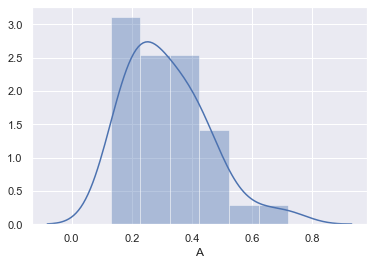

In [361]:
sns.distplot(shingles.A)
printmd('**A Shingles**')

**A Shingles**

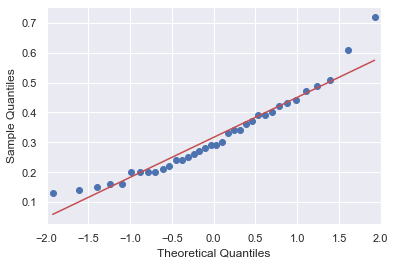

In [362]:
# Because of some issue in package if we don't assign it to a variable then it shows the same plot twice.
a = sm.qqplot(shingles.A, line = 's') 
printmd('**A Shingles**')

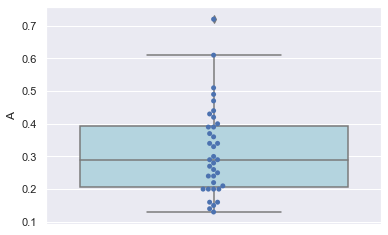

In [363]:
sns.boxplot(y=shingles.A,color = 'lightblue')
sns.swarmplot(y= shingles.A)

## Inference :
1. **From Histogram :**
    - It is not symmetric, it seems to be skewed to the right and hence the chances of the sample coming from a population with Normal distribution is less.
2. **From qqplot:**
    - The quantile cross-section points are not on a Straight line, thus the sample may be coming from a population with Normal distribution.
3. **From Combination of Swarmplot and Boxplot :**
    - The boxplot has a longer upper whisker and an outlier of the upper side as well. The swarmplot shows that the distribution of data points is not concentrated near the median, and rather nearly linearly distributed between the lower quartile and upper quartile, with a concentration seen near the lower quartile.
<br>        

#### These observations suggest that the sample does not look normally distributed.

## Visual analysis for B shingles sample :

**B Shingles**

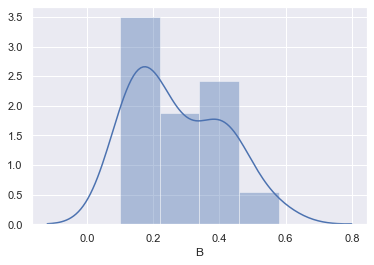

In [364]:
sns.distplot(shingles.B.dropna())
printmd('**B Shingles**')

**B Shingles**

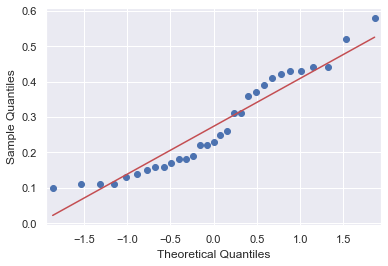

In [365]:
# Because of some issue in package if we don't assign it to a variable then it shows the same plot twice.
a = sm.qqplot(shingles.B.dropna(), line = 's') 
printmd('**B Shingles**')

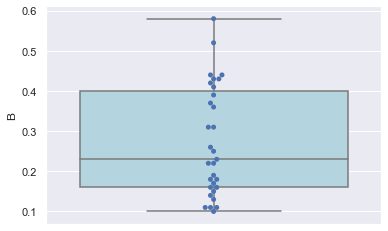

In [366]:
sns.boxplot(y=shingles.B.dropna(),color = 'lightblue')
sns.swarmplot(y= shingles.B.dropna())

## Inference:
1. **From Histogram :**
    - The sample looks to be concentrated in two areas. It is not symmetric and hence the sample coming from a population with Normal distribution is less.
2. **From qqplot:**
    - The quantile cross-section points are not on a Straight line, thus the chances of the sample coming from a population with Normal distribution is less.
3. **From Combination of Swarmplot and Boxplot :**
    - The boxplot shows that there is no symmetry above and below median. From the swarmplot, the distribution of data points is observed to be less concentrated near median and more concentrated on upper and lower quartiles.
    
####  These observations suggest that the sample does not look normally distributed.

## Numerical Analysis of  Normality

## Reason for using Shapiro-Wilk Test:

- It has high power compared to other tests and is least affected by the type of distribution the sample originally has hence in Normality tests it finds a wide usage.

- Further it is affected by Sample size. 
    - For very small sample size( < 20), the power of the test is less but it is true for all other tests as well. 
    - Again it does not work well for higher sample sizes because when sample size gets large, even the smallest deviation from perfect normality will lead to a significant result. And as every dataset has some degree of randomness, no single dataset will be a perfectly normally distributed sample. Practically it is suggested to not go for sample sizes above 5000. 
    - **In our case the sample sizes are 36 for sample A shingles and 31 for sample B shingles which is acceptable and we can use the Shapiro-Wilk test here.**
- Hypothesis Statements for the Shapiro Tests:
    - **Null Hypothesis: The sample was drawn from a Normal population distribution.**
    - **Alternate Hypothesis: The sample was not drawn from a Normal population distribution.**

In [367]:
statitic, p_value = shapiro(shingles.A)
print('p value for A shingles is ' + str(p_value))

statitic, p_value = shapiro(shingles.B.dropna())
print('p value for B shingles is ' + str(p_value))

p value for A shingles is 0.042670514434576035
p value for B shingles is 0.02002784051001072


## Inference
1. For A shingles the p value is 0.043 approximately which is less than 0.05 (i.e. p value < 0.05), hence we **Reject the Null Hypothesis. Thus the underlying population distribution of A shingles sample is inferred not to be Normally distributed according to Shapiro-Wilk Test.**
2. For B shingles the p value is 0.02 approximately which is less than 0.05 (i.e. p value < 0.05), hence we **Reject the Null Hypothesis. Thus the underlying population distribution of B shingles sample is inferred not to be Normally distributed according to Shapiro-Wilk Test.**

## Z score for significant outlier calculation :

In [368]:
temp_less = []
temp_greater = []
temp = [] 
z_score_df = pd.DataFrame(np.arange(len(shingles['A'])), columns= ['Temp'])

for j in range(len(shingles.A)):
    z = (shingles['A'][j] - np.mean(shingles['A'])) / np.std(shingles['A'])
    temp.append(z)
z_score_df['A'] = temp
z_score_df.drop('Temp', axis=1, inplace =True)
printmd('**First five Z scores Shingles A:**')
print(z_score_df.head())
for i in z_score_df:
    temp_less.append(z_score_df[ (z_score_df[i] <= -3)][i].count())
    temp_greater.append(z_score_df[ (z_score_df[i] >= 3)][i].count())
z_score_count = pd.DataFrame(temp_less, columns= ['Lower Outlier Count'],  index = z_score_df.columns)
z_score_count['Higher Outlier Count'] = temp_greater
print('')
printmd('**Outlier Counts Shingles A:**')
z_score_count

**First five Z scores Shingles A:**

          A
0  0.921551
1  2.191796
2  1.145712
3 -0.124534
4 -1.245339



**Outlier Counts Shingles A:**

,Lower Outlier Count,Higher Outlier Count
A,0,1


In [369]:
temp_less = []
temp_greater = []
temp = [] 

shingles_B = shingles.B.dropna()
z_score_df = pd.DataFrame(np.arange(len(shingles_B)), columns= ['Temp'])

for j in range(len(shingles_B)):
    z = (shingles_B[j] - np.mean(shingles_B)) / np.std(shingles_B)
    temp.append(z)
z_score_df['B'] = temp
z_score_df.drop('Temp', axis=1, inplace =True)
printmd('**First five Z scores Shingles B:**')
print(z_score_df.head())

for i in z_score_df:
    temp_less.append(z_score_df[ (z_score_df[i] <= -3)][i].count())
    temp_greater.append(z_score_df[ (z_score_df[i] >= 3)][i].count())
z_score_count = pd.DataFrame(temp_less, columns= ['Lower Outlier Count'],  index = z_score_df.columns)
z_score_count['Higher Outlier Count'] = temp_greater
print('')
printmd('**Outlier Counts Shingles B:**')
z_score_count

**First five Z scores Shingles B:**

          B
0 -0.988780
1 -0.914740
2  0.269884
3 -0.840701
4  0.714119



**Outlier Counts Shingles B:**

,Lower Outlier Count,Higher Outlier Count
B,0,0


## Inference:
1. **Shingles A :** We have considered +/- 3 SD as the limit, which means beyond this only 0.03% of the data can lie for a Normal Population. In case of Shingles A, there is one data point which lies beyond this point which is going to be greater than 0.03% of the sample size (as sample size of A shingles is only 36). **This means there is one significant outlier present in Shingles A as calculated from Z score method.**
2. **Shingles A : There are no significant outliers in case of Shingles B as calculated from Z score method.**

## Validity of Normality and Significant Outlier:
1. It is observed from the visual methods of Histogram, Q-Q plot and Combination of Box and swarmplot that both Shingles A and Shingles B do not seem to follow a Normal Distribution. Also according to Shapiro-Wilk Normality Test the underlying population of both Shingles A and Shingles B do not seem to follow a Normal Distribution. **Thus Normality assumptions is not valid according to the above analysis.**
2. According to Z score test, there is significant outlier present in Shingles A and no significant outliers in Shingles B. **Thus Significant outlier assumption is not valid for Shingles A but it is valid for Shingles B.**